<a href="https://colab.research.google.com/github/bushurumark/EUROPE-MULTI-LEAGUE-FOOTBALL-PREDICTION-APP/blob/main/ML_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Let's start by importing necessary libraries

In [ ]:
#!pip install xgboost
#!pip install openpyxl
#import sklearn
#print(sklearn.__version__)
#!pip install --upgrade scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
#import openpyxl

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#!pip install xlrd

### Read the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Football analysis/football_data1.csv')
df = data.copy()


### View the first and last 5 rows of the dataset.

In [ ]:
df.head()

Date       HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR    HS  \
0  45513      Groningen   NAC Breda     4     1   H   3.0   0.0   H  17.0   
1  45514      Feyenoord   Willem II     1     1   D   1.0   0.0   H  21.0   
2  45514       Nijmegen      Twente     1     2   A   1.0   1.0   D  12.0   
3  45514    Almere City  AZ Alkmaar     0     1   A   0.0   1.0   A   7.0   
4  45514  PSV Eindhoven    Waalwijk     5     1   H   3.0   0.0   H  19.0   

   ...  MaxCA  AvgCH  B365C<2.5  MaxC>2.5  MaxC<2.5  AvgC<2.5  B365CAHH  \
0  ...   5.54   1.65       2.05      1.90      2.27      2.10      1.87   
1  ...  23.00   1.11       3.40      1.36      3.41      3.25      2.03   
2  ...   2.34   3.16       2.10      1.73      2.26      2.16      1.90   
3  ...   1.93   4.84       2.00      1.99      2.07      1.97      1.93   
4  ...  31.00   1.07       5.50      1.18      6.51      5.36      1.91   

   B365CAHA  MaxCAHH  MaxCAHA  
0      2.03     1.90     2.06  
1      1.87     2.08     1.94  
2      2.00     2.00     2.00  
3      1.97     2.00     1.97  
4      1.99     1.97     2.00  

[5 rows x 47 columns]

In [ ]:
df.tail()

Date        HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
60884  44043         Livorno      Empoli     0     2   A   0.0   1.0   A   
60885  44043     Salernitana      Spezia     1     2   A   1.0   1.0   D   
60886  44043         Trapani     Crotone     2     0   H   0.0   0.0   D   
60887  44043         Venezia     Perugia     3     1   H   1.0   0.0   H   
60888  44043  Virtus Entella  Cittadella     2     3   A   2.0   2.0   D   

         HS  ...  MaxCA  AvgCH  B365C<2.5  MaxC>2.5  MaxC<2.5  AvgC<2.5  \
60884  14.0  ...    NaN    NaN        NaN       NaN       NaN       NaN   
60885  13.0  ...   5.08   1.69       2.05      1.86      2.13      2.02   
60886  11.0  ...   4.20   1.77       2.40      1.60      2.55      2.41   
60887  20.0  ...   2.97   2.83       1.61      2.38      1.67      1.60   
60888  14.0  ...   2.53   2.97       2.25      1.69      2.36      2.23   

       B365CAHH  B365CAHA  MaxCAHH  MaxCAHA  
60884       NaN       NaN      NaN      NaN  
60885      1.90      1.95     1.95     1.99  
60886      2.02      1.83     2.08     1.87  
60887      1.95      1.90     2.01     1.98  
60888      1.77      2.10     1.85     2.18  

[5 rows x 47 columns]

In [ ]:
df.sample(10)

Date    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR    HS  \
42996  45200  AZ Alkmaar  For Sittard     4     0   H   1.0   0.0   H  12.0   
30987  44542     Burnley     West Ham     0     0   D   0.0   0.0   D   9.0   
14179  44202    Atalanta        Parma     3     0   H   1.0   0.0   H  17.0   
8691   44975    Brighton       Fulham     0     1   A   0.0   0.0   D  21.0   
24858  44507   Cartagena       Malaga     3     1   H   1.0   0.0   H  13.0   
15452  44934     Almeria     Sociedad     0     2   A   0.0   0.0   D   6.0   
37899  45667   Vallecano        Celta     2     1   H   1.0   1.0   D   8.0   
55824  44604     Apollon  Panetolikos     0     0   D   0.0   0.0   D   8.0   
12387  44275     FC Koln     Dortmund     2     2   D   1.0   1.0   D  10.0   
13421  44930    Sassuolo    Sampdoria     1     2   A   0.0   2.0   A  16.0   

       ...  MaxCA  AvgCH  B365C<2.5  MaxC>2.5  MaxC<2.5  AvgC<2.5  B365CAHH  \
42996  ...   9.37   1.36       2.35      1.68      2.45      2.34      2.08   
30987  ...   2.23   3.44       1.97      1.94      2.05      1.94      2.02   
14179  ...  13.00   1.23       3.20      1.43      3.44      3.15      2.08   
8691   ...   6.60   1.54       2.10      1.76      2.26      2.17      1.89   
24858  ...   3.86   2.21       1.61      2.38      1.66      1.61      1.83   
15452  ...   1.99   4.31       1.73      2.19      1.81      1.74      1.95   
37899  ...   2.79   2.85       1.67      2.25      1.76      1.69      2.00   
55824  ...   2.78   2.94       1.44      2.88      1.48      1.44      2.15   
12387  ...   1.52   6.52       2.30      1.67      2.50      2.31      1.82   
13421  ...   5.05   1.73       2.00      2.12      2.03      1.93      1.97   

       B365CAHA  MaxCAHH  MaxCAHA  
42996      1.73     2.17     1.90  
30987      1.88     2.14     1.94  
14179      1.85     2.26     1.90  
8691       2.01     2.10     2.05  
24858      2.02     2.02     2.05  
15452      1.98     1.97     2.02  
37899      1.81     2.08     1.89  
55824      1.68     2.25     1.88  
12387      2.11     1.92     2.18  
13421      1.96     1.99     2.00  

[10 rows x 47 columns]

## Understand the shape of the dataset.

In [ ]:
df.shape

(60889, 47)

- The dataset has got 60889 rows and 47 columns

### Check the data types of the columns for the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60889 entries, 0 to 60888
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       60889 non-null  int64  
 1   HomeTeam   60889 non-null  object 
 2   AwayTeam   60889 non-null  object 
 3   FTHG       60889 non-null  int64  
 4   FTAG       60889 non-null  int64  
 5   FTR        60889 non-null  object 
 6   HTHG       60811 non-null  float64
 7   HTAG       60811 non-null  float64
 8   HTR        60811 non-null  object 
 9   HS         60809 non-null  float64
 10  AS         60809 non-null  float64
 11  HST        60809 non-null  float64
 12  AST        60809 non-null  float64
 13  HF         60809 non-null  float64
 14  AF         60809 non-null  float64
 15  HC         60809 non-null  float64
 16  AC         60809 non-null  float64
 17  HY         60811 non-null  float64
 18  AY         60811 non-null  float64
 19  HR         60811 non-null  float64
 20  AR    

- The dataset is of type integer, float and object which occupies 365.8KB

#### Fixing the data types

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'HTR'], dtype='object')

In [ ]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60889 entries, 0 to 60888
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Date       60889 non-null  int64   
 1   HomeTeam   60889 non-null  category
 2   AwayTeam   60889 non-null  category
 3   FTHG       60889 non-null  int64   
 4   FTAG       60889 non-null  int64   
 5   FTR        60889 non-null  category
 6   HTHG       60811 non-null  float64 
 7   HTAG       60811 non-null  float64 
 8   HTR        60811 non-null  category
 9   HS         60809 non-null  float64 
 10  AS         60809 non-null  float64 
 11  HST        60809 non-null  float64 
 12  AST        60809 non-null  float64 
 13  HF         60809 non-null  float64 
 14  AF         60809 non-null  float64 
 15  HC         60809 non-null  float64 
 16  AC         60809 non-null  float64 
 17  HY         60811 non-null  float64 
 18  AY         60811 non-null  float64 
 19  HR         60811 non-null

### Summary of the dataset.

In [ ]:
df.describe().T

count          mean         std       min       25%       50%  \
Date       60889.0  44731.414837  597.306263  43672.00  44226.00  44692.00   
FTHG       60889.0      1.479890    1.266305      0.00      1.00      1.00   
FTAG       60889.0      1.197277    1.142175      0.00      0.00      1.00   
HTHG       60811.0      0.660719    0.820154      0.00      0.00      0.00   
HTAG       60811.0      0.530249    0.738972      0.00      0.00      0.00   
HS         60809.0     13.175714    5.253984      0.00      9.00     13.00   
AS         60809.0     10.996316    4.725885      0.00      8.00     11.00   
HST        60809.0      4.664030    2.547148      0.00      3.00      4.00   
AST        60809.0      3.876400    2.301375      0.00      2.00      4.00   
HF         60809.0     12.591656    4.164391      0.00     10.00     12.00   
AF         60809.0     12.768488    4.192369      0.00     10.00     12.00   
HC         60809.0      5.319509    2.907719      0.00      3.00      5.00   
AC         60809.0      4.425874    2.620482      0.00      3.00      4.00   
HY         60811.0      2.006265    1.406066      0.00      1.00      2.00   
AY         60811.0      2.235730    1.456003      0.00      1.00      2.00   
HR         60811.0      0.095262    0.311991      0.00      0.00      0.00   
AR         60811.0      0.115884    0.345344      0.00      0.00      0.00   
B365H      60696.0      2.676395    1.702959      1.03      1.75      2.20   
B365D      60696.0      3.836910    1.103719      1.91      3.25      3.50   
B365A      60696.0      4.114782    3.030870      1.05      2.45      3.25   
MaxD       60814.0      4.081237    1.324021      2.02      3.40      3.69   
MaxA       60814.0      4.537747    4.045437      1.08      2.56      3.45   
AvgH       60814.0      2.681247    1.688709      1.03      1.79      2.25   
B365<2.5   60682.0      1.974468    0.435778      1.22      1.66      1.90   
Max>2.5    60812.0      2.026431    0.371109      1.11      1.75      2.00   
Max<2.5    60812.0      2.059203    0.470074      1.28      1.74      1.95   
B365AHH    60428.0      1.941955    0.100587      1.55      1.87      1.95   
B365AHA    60426.0      1.937357    0.097296      1.19      1.86      1.94   
MaxAHH     60810.0      1.988079    0.099196      1.69      1.91      1.99   
MaxAHA     60810.0      1.981535    0.095885      1.20      1.90      1.98   
B365CD     60820.0      3.853668    1.175519      1.53      3.25      3.50   
B365CA     60820.0      4.145269    3.103807      1.05      2.40      3.30   
MaxCD      60827.0      4.105918    1.466197      1.75      3.38      3.67   
MaxCA      60827.0      4.688711    4.319228      0.00      2.59      3.55   
AvgCH      60827.0      2.720626    1.789721      1.03      1.78      2.25   
B365C<2.5  60815.0      1.982611    0.486181      0.00      1.66      1.90   
MaxC>2.5   60827.0      2.067685    0.416878      1.10      1.75      2.03   
MaxC<2.5   60827.0      2.093323    0.534445      1.24      1.73      1.97   
AvgC<2.5   60827.0      1.983782    0.474798      1.21      1.66      1.87   
B365CAHH   60786.0      1.935630    0.104628      1.50      1.86      1.94   
B365CAHA   60786.0      1.943946    0.100496      1.18      1.87      1.95   
MaxCAHH    60825.0      2.002864    0.105454      1.68      1.92      2.00   
MaxCAHA    60825.0      2.008953    0.106289      1.20      1.93      2.00   

                75%       max  
Date       45263.00  45778.00  
FTHG           2.00      9.00  
FTAG           2.00     13.00  
HTHG           1.00      7.00  
HTAG           1.00      7.00  
HS            16.00     46.00  
AS            14.00     45.00  
HST            6.00     31.00  
AST            5.00     23.00  
HF            15.00     40.00  
AF            15.00     36.00  
HC             7.00     23.00  
AC             6.00     23.00  
HY             3.00     10.00  
AY             3.00      9.00  
HR             0.00      3.00  
AR             0.00      9.00  
B365

In [ ]:
df.describe(include=['category']).T

count unique      top   freq
HomeTeam  60889    400      QPR    272
AwayTeam  60889    400  Swansea    272
FTR       60889      3        H  26242
HTR       60811      3        D  25214

### **Feature Engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Encode the 'Res' column (converts H, D, A to numbers)
df['FTR'] = le.fit_transform(df['FTR'])
df['HTR'] = le.fit_transform(df['HTR'])

In [ ]:
# Show the mapping
print("Encoding mapping:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {original} → {encoded}")

Encoding mapping:
  A → 0
  D → 1
  H → 2
  nan → 3


In [ ]:
# Verify encoding worked
print("\nValue counts after encoding:")
print(df['FTR'].value_counts().sort_index())
print(df['HTR'].value_counts().sort_index())


Value counts after encoding:
FTR
0    18609
1    16038
2    26242
Name: count, dtype: int64
HTR
0    15261
1    25214
2    20336
3       78
Name: count, dtype: int64


In [ ]:
#label encoding for teams
all_teams = pd.concat([df['HomeTeam'], df['AwayTeam']]).unique()
le.fit(all_teams)
df['HomeTeam'] = le.transform(df['HomeTeam'])
df['AwayTeam'] = le.transform(df['AwayTeam'])

In [ ]:
# Home Team Goal expectation vs reality
df['Home_GoalDifference'] = df['FTHG'] - df['FTAG']
df['Home_ShotEfficiency'] = df['FTHG'] / df['HS'].replace(0, 0.1)
df['Home_ShotOnTargetEfficiency'] = df['FTHG'] / df['HST'].replace(0, 0.1)


In [ ]:
# 1. Halftime Match Context Features
df['HT_Goal_Diff'] = df['HTHG'] - df['HTAG']
df['HT_Total_Goals'] = df['HTHG'] + df['HTAG']

In [ ]:
# Average Odds Context Features
df['Avg_Odds_Change'] = df['AvgCH'] - df['AvgH']
df['AvgCH_Implied_Prob'] = 1 / df['AvgCH']

In [ ]:
# Asian Handicap Context Features
df['B365_AH_Edge'] = df['B365CAHA'] - df['B365CAHH']
df['Max_AH_Edge'] = df['MaxCAHA'] - df['MaxCAHH']
df['AH_Odds_Ratio'] = df['B365CAHA'] / df['B365CAHH']

In [ ]:
#Away Team Goal expectation vs reality
df['Away_GoalDifference'] = df['FTAG'] - df['FTHG']
df['Away_ShotEfficiency'] = df['FTAG'] / df['AS'].replace(0, 0.1)
df['Away_ShotOnTargetEfficiency'] = df['FTAG'] / df['AST'].replace(0, 0.1)

In [ ]:
# Defensive strength
df['Home_DefensiveStrength'] = df['FTAG'] / df['AS'].replace(0, 0.1)
df['Away_DefensiveStrength'] = df['FTHG'] / df['HS'].replace(0, 0.1)

In [ ]:
# Additional offensive metrics
df['Home_ShotConversionRate'] = (df['HST'] / df['HS'].replace(0, 0.1)) * 100
df['Away_ShotConversionRate'] = (df['AST'] / df['AS'].replace(0, 0.1)) * 100

In [ ]:
# Corner efficiency
df['Home_CornerEfficiency'] = df['FTHG'] / df['HC'].replace(0, 0.1)
df['Away_CornerEfficiency'] = df['FTAG'] / df['AC'].replace(0, 0.1)

In [ ]:
# Match dominance indicators
df['Home_PossessionIndicator'] = (df['HS'] + df['HC']) / (df['HS'] + df['HC'] + df['AS'] + df['AC']).replace(0, 0.1)
df['Away_PossessionIndicator'] = (df['AS'] + df['AC']) / (df['HS'] + df['HC'] + df['AS'] + df['AC']).replace(0, 0.1)

In [ ]:
# Defensive pressure
df['Home_DefensivePressure'] = df['HF'] / (df['HF'] + df['AF']).replace(0, 0.1)  # Foul share as pressure indicator
df['Away_DefensivePressure'] = df['AF'] / (df['HF'] + df['AF']).replace(0, 0.1)

In [ ]:
# Discipline metrics
df['Home_Discipline'] = (df['HY'] + df['HR']) / (df['HF'].replace(0, 0.1))
df['Away_Discipline'] = (df['AY'] + df['AR']) / (df['AF'].replace(0, 0.1))

In [ ]:
# Head-to-head comparative features
df['Home_Advantage_Shots'] = df['HS'] - df['AS']
df['Home_Advantage_ShotsOnTarget'] = df['HST'] - df['AST']
df['Home_Advantage_Corners'] = df['HC'] - df['AC']
df['Home_Advantage_Fouls'] = df['HF'] - df['AF']

In [ ]:
# Efficiency differentials
df['Efficiency_Differential_Shot'] = df['Home_ShotEfficiency'] - df['Away_ShotEfficiency']
df['Efficiency_Differential_ShotOnTarget'] = df['Home_ShotOnTargetEfficiency'] - df['Away_ShotOnTargetEfficiency']
df['Defensive_Strength_Differential'] = df['Home_DefensiveStrength'] - df['Away_DefensiveStrength']

In [ ]:
# Game tempo indicators
df['TotalShots'] = df['HS'] + df['AS']
df['TotalShotsOnTarget'] = df['HST'] + df['AST']
df['TotalCorners'] = df['HC'] + df['AC']
df['ShotsPerMinute'] = df['TotalShots'] / 90
# Game openness
df['Game_Openness'] = (df['HS'] + df['AS']) / (df['HF'] + df['AF']).replace(0, 0.1)

In [ ]:
# Basic 1X2 odds (using Bet365 since MaxH is missing)
df['B365H_Prob'] = 1 / df['B365H']
df['B365D_Prob'] = 1 / df['B365D']
df['B365A_Prob'] = 1 / df['B365A']

# Use MaxD and MaxA for draw/away value
df['MaxD_Prob'] = 1 / df['MaxD']
df['MaxA_Prob'] = 1 / df['MaxA']

# Value bets for draw/away only (since no MaxH)
df['Draw_Value_Bet'] = df['MaxD_Prob'] - df['B365D_Prob']
df['Away_Value_Bet'] = df['MaxA_Prob'] - df['B365A_Prob']

In [ ]:
# Asian handicap probabilities
df['B365AHH_Prob'] = 1 / df['B365AHH']
df['B365AHA_Prob'] = 1 / df['B365AHA']
df['MaxAHH_Prob'] = 1 / df['MaxAHH']
df['MaxAHA_Prob'] = 1 / df['MaxAHA']

# Asian handicap market sentiment
df['AH_Home_Advantage'] = df['B365AHH'] - df['B365AHA']
df['AH_Market_Confidence'] = (df['MaxAHH'] - df['MaxAHA']) / (df['MaxAHH'] + df['MaxAHA'])

In [ ]:
# Goal market probabilities
df['B365_Under2.5_Prob'] = 1 / df['B365<2.5']
df['Max_Under2.5_Prob'] = 1 / df['Max<2.5']
df['Max_Over2.5_Prob'] = 1 / df['Max>2.5']

# Goal expectation from odds
df['Implied_TotalGoals'] = (1/df['B365<2.5']) * 2 + (1/df['Max>2.5']) * 3.5

In [ ]:
# Correct score odds
df['B365CD_Prob'] = 1 / df['B365CD']  # Correct draw
df['B365CA_Prob'] = 1 / df['B365CA']  # Correct away
df['MaxCD_Prob'] = 1 / df['MaxCD']
df['MaxCA_Prob'] = 1 / df['MaxCA']

In [ ]:
# Clean sheet odds (from correct score markets)
df['B365C_Under2.5_Prob'] = 1 / df['B365C<2.5']
df['MaxC_Over2.5_Prob'] = 1 / df['MaxC>2.5']
df['MaxC_Under2.5_Prob'] = 1 / df['MaxC<2.5']
df['AvgC_Under2.5_Prob'] = 1 / df['AvgC<2.5']

In [ ]:
# Save the DataFrame to a CSV file
#df.to_csv('Europe_Football_Data1.csv', index=False)

**Dropping columns which are not adding any information.**

In [ ]:
df.drop(["Date","FTHG","FTAG","HS","HST","AS","AST","HC","AC","HF","AF","HY","AY","HR","AR","B365H","B365D","B365A","MaxD","MaxA","B365AHH","B365AHA","MaxAHH","MaxAHA","B365<2.5","Max<2.5","Max>2.5","B365CD","B365CA","MaxCD","MaxCA","B365C<2.5","MaxC>2.5","MaxC<2.5","AvgC<2.5","HTHG","HTAG","HTR","AvgCH","AvgH","B365CAHA","B365CAHH","MaxCAHA","MaxCAHH"],axis=1,inplace=True)

In [ ]:
# REMOVE these leaky features from dataset
#leaky_features = ['Home_GoalDifference', 'Away_GoalDifference']
df.drop(['Home_GoalDifference', 'Away_GoalDifference'], axis=1, inplace=True, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60889 entries, 0 to 60888
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   HomeTeam                              60889 non-null  int64  
 1   AwayTeam                              60889 non-null  int64  
 2   FTR                                   60889 non-null  int64  
 3   Home_ShotEfficiency                   60809 non-null  float64
 4   Home_ShotOnTargetEfficiency           60809 non-null  float64
 5   HT_Goal_Diff                          60811 non-null  float64
 6   HT_Total_Goals                        60811 non-null  float64
 7   Avg_Odds_Change                       60814 non-null  float64
 8   AvgCH_Implied_Prob                    60827 non-null  float64
 9   B365_AH_Edge                          60786 non-null  float64
 10  Max_AH_Edge                           60825 non-null  float64
 11  AH_Odds_Ratio  

In [ ]:
df.head()

HomeTeam  AwayTeam  FTR  Home_GoalDifference  Home_ShotEfficiency  \
0       159       245    2                    3             0.235294   
1       135       391    1                    0             0.047619   
2       252       360    0                   -1             0.083333   
3        12         2    0                   -1             0.000000   
4       269       381    2                    4             0.263158   

   Home_ShotOnTargetEfficiency  HT_Goal_Diff  HT_Total_Goals  Avg_Odds_Change  \
0                     0.444444           3.0             3.0             0.04   
1                     0.142857           1.0             1.0            -0.01   
2                     0.500000           0.0             2.0            -0.47   
3                     0.000000          -1.0             1.0            -0.53   
4                     0.416667           3.0             3.0            -0.02   

   AvgCH_Implied_Prob  ...  Max_Over2.5_Prob  Implied_TotalGoals  B365CD_Prob  \
0            0.606061  ...          0.595238            2.972222     0.263158   
1            0.900901  ...          0.709220            3.127431     0.117647   
2            0.316456  ...          0.568182            2.918869     0.294118   
3            0.206612  ...          0.571429            2.952381     0.270270   
4            0.934579  ...          0.763359            3.227311     0.076923   

   B365CA_Prob  MaxCD_Prob  MaxCA_Prob  B365C_Under2.5_Prob  \
0     0.190476    0.238095    0.180505             0.487805   
1     0.047619    0.083333    0.043478             0.294118   
2     0.434783    0.270270    0.427350             0.476190   
3     0.588235    0.250000    0.518135             0.500000   
4     0.047619    0.062500    0.032258             0.181818   

   MaxC_Over2.5_Prob  MaxC_Under2.5_Prob  AvgC_Under2.5_Prob  
0           0.526316            0.440529            0.476190  
1           0.735294            0.293255            0.307692  
2           0.578035            0.442478            0.462963  
3           0.502513            0.483092            0.507614  
4           0.847458            0.153610            0.186567  

[5 rows x 65 columns]

**Let's look at the unqiue values of all the categories**

In [ ]:
cols_cat= df.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

## Exploratory Data Analysis (EDA)

### Univariate analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

### Numerical Columns

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

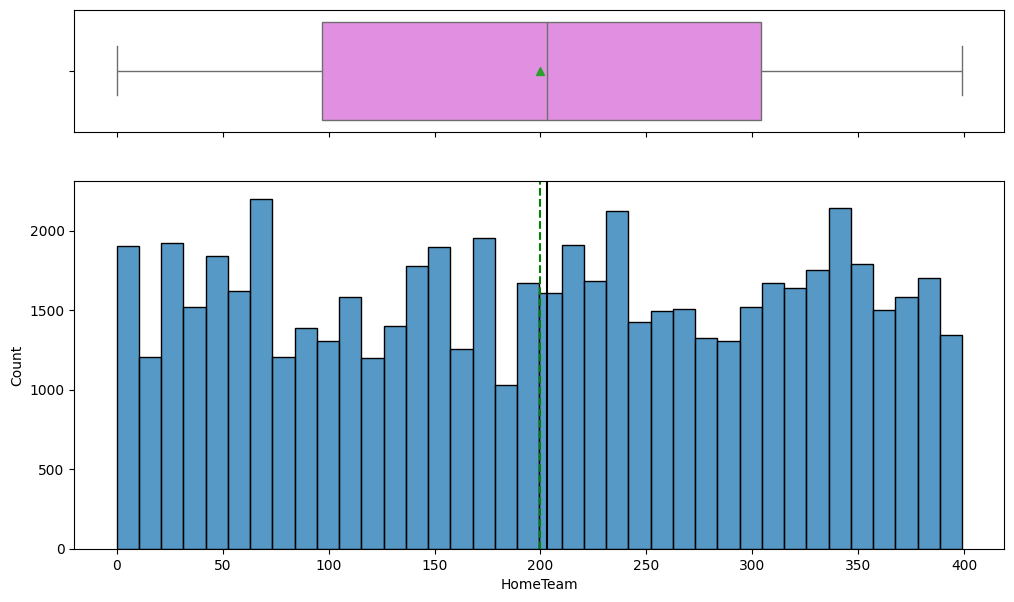

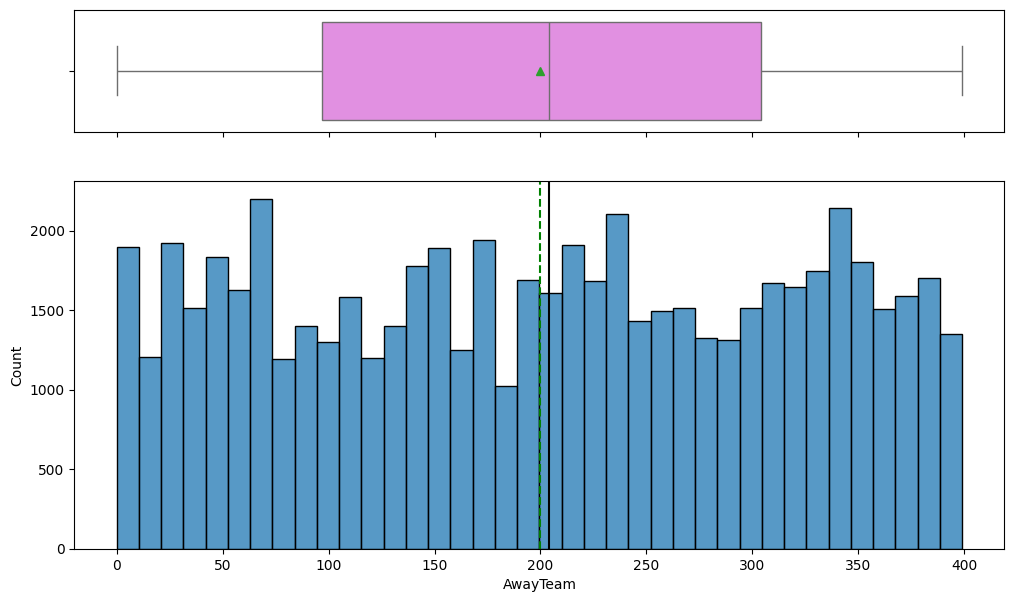

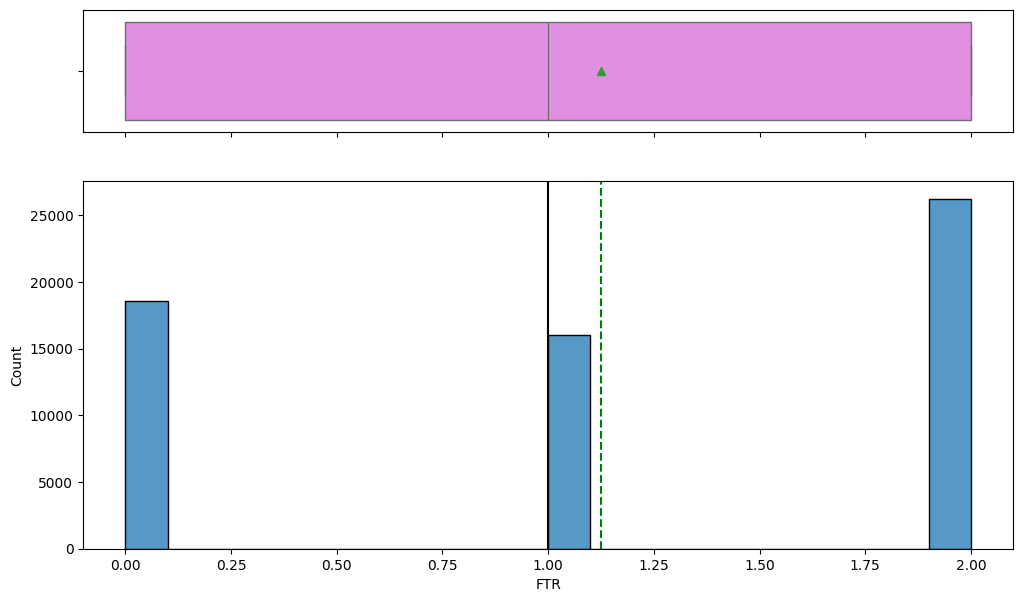

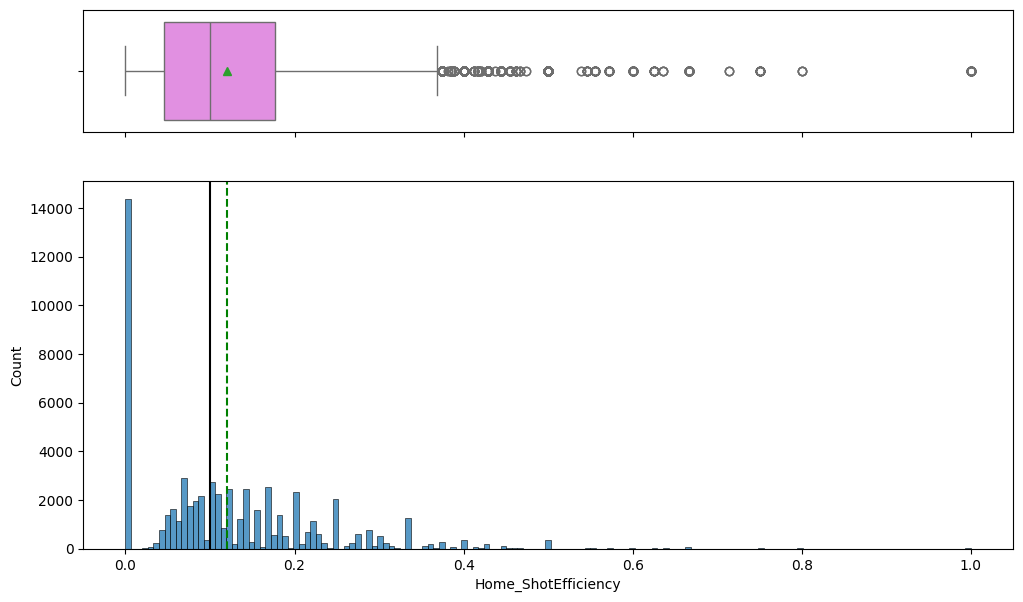

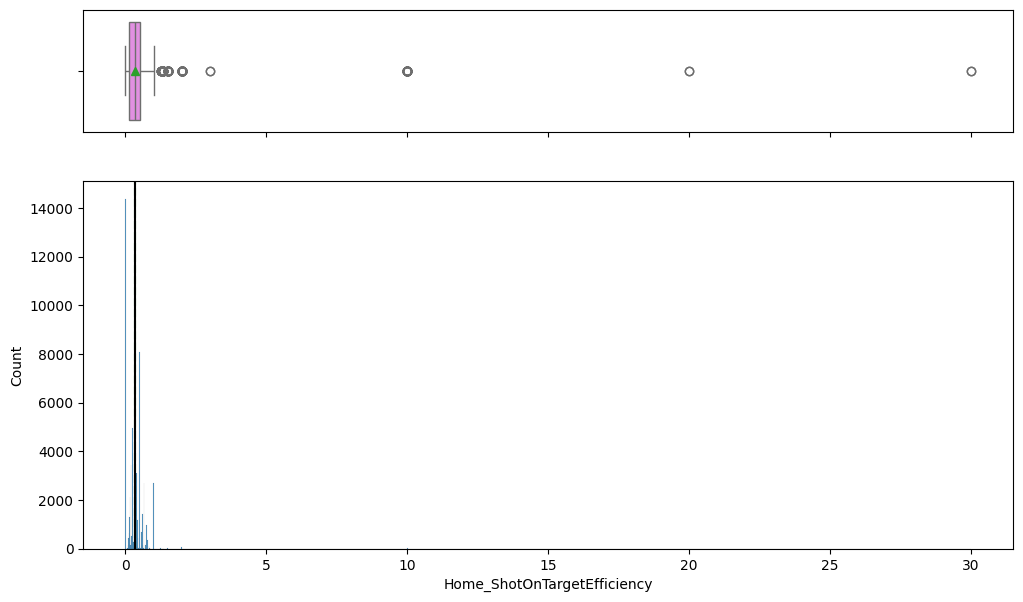

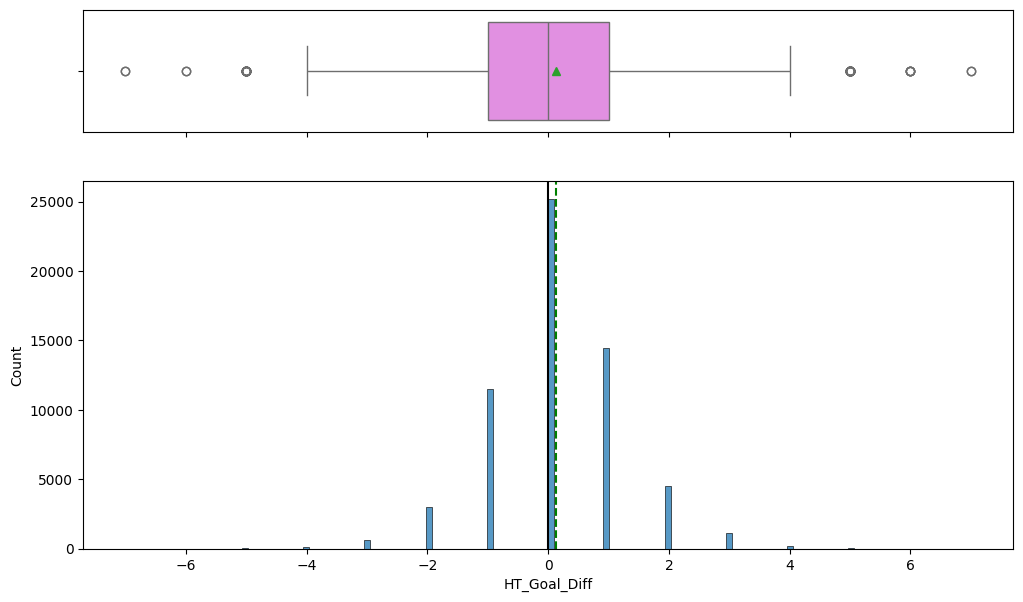

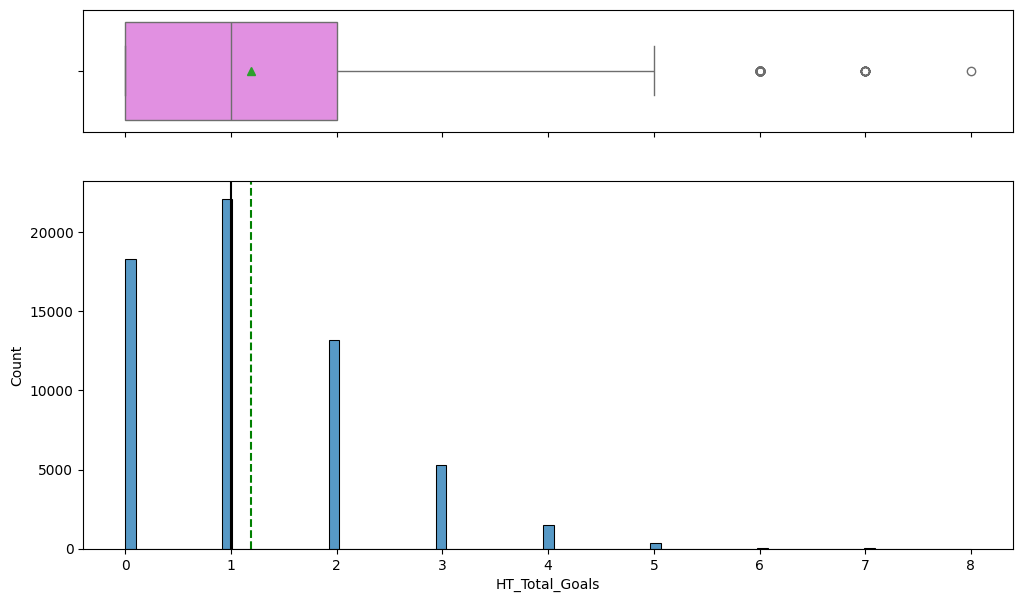

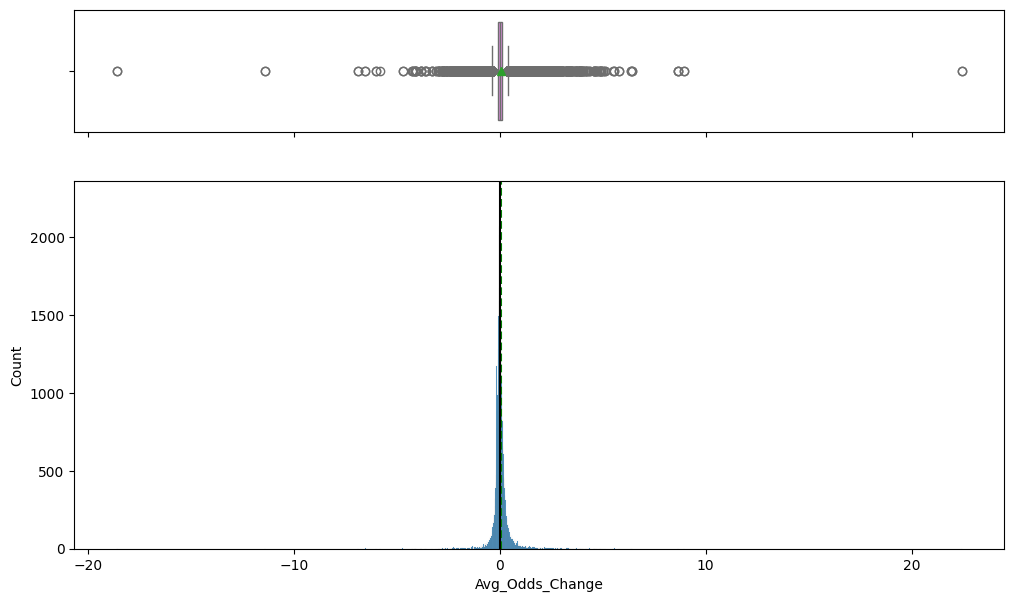

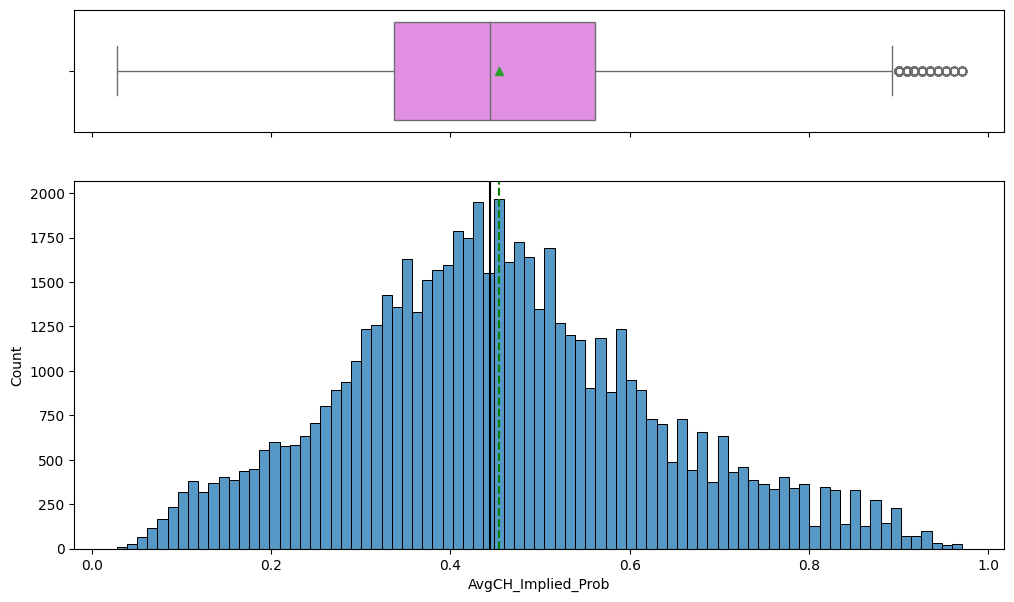

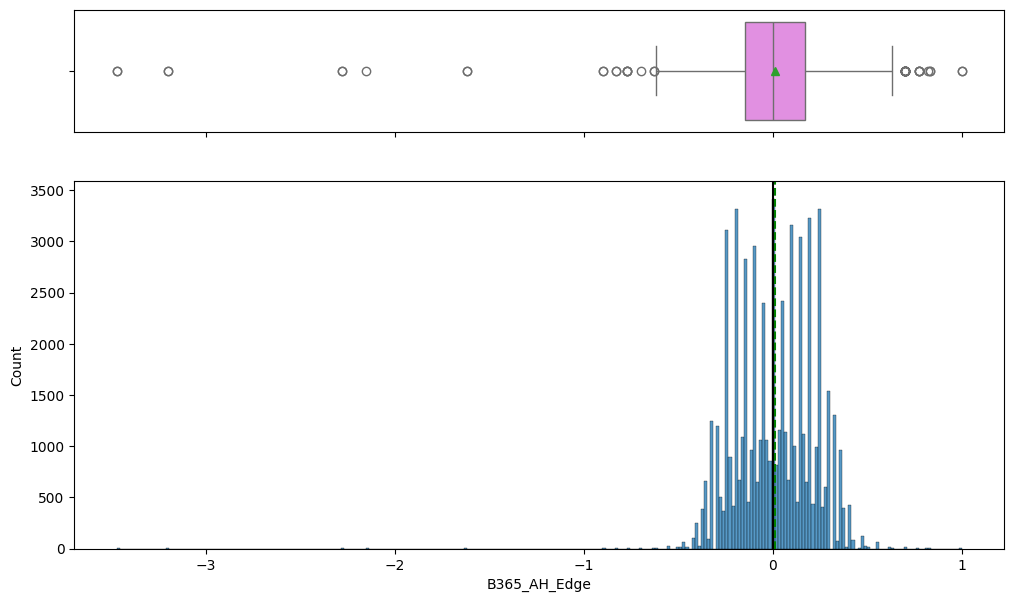

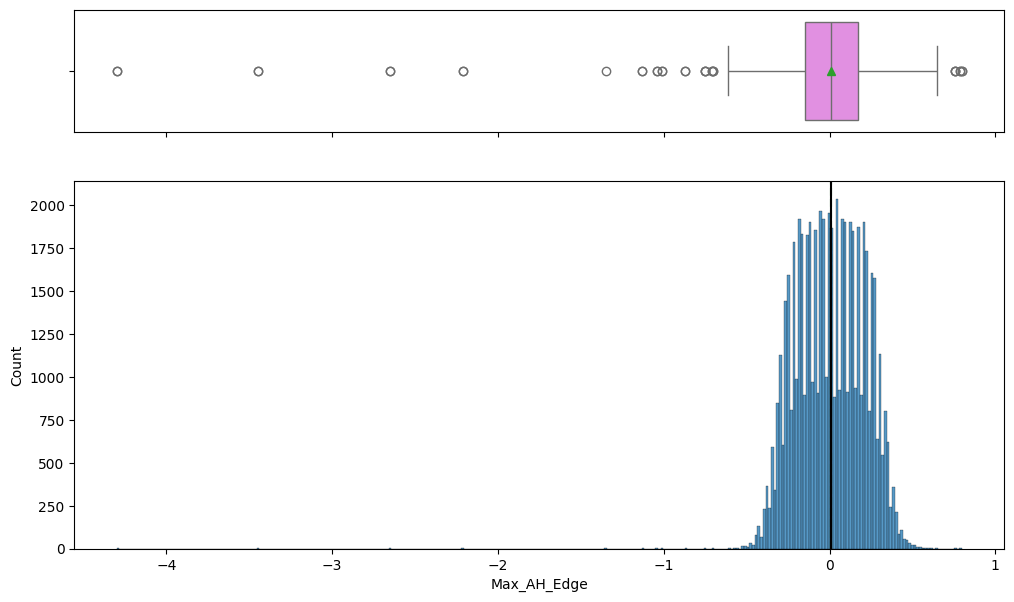

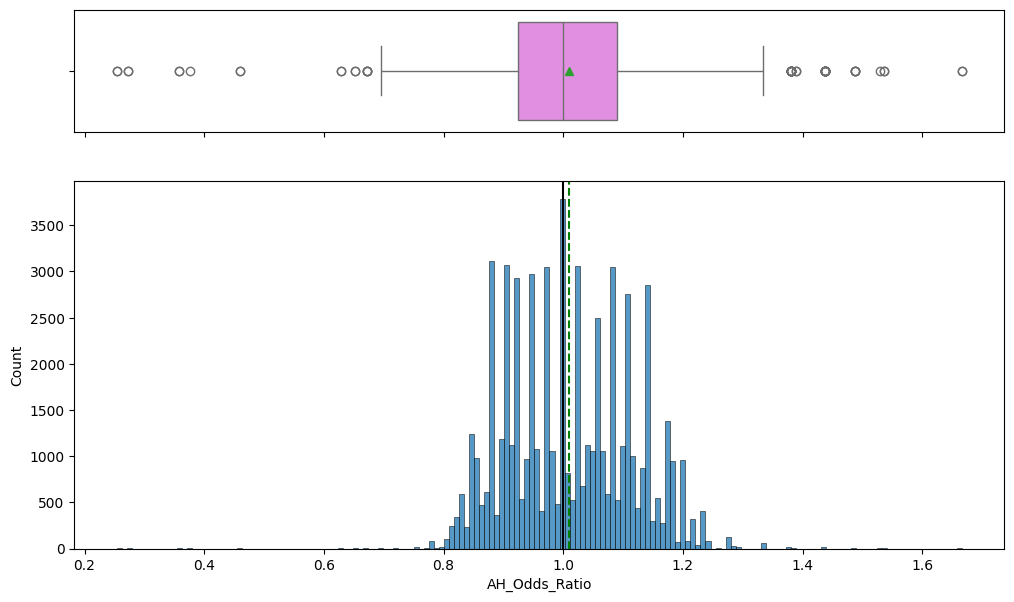

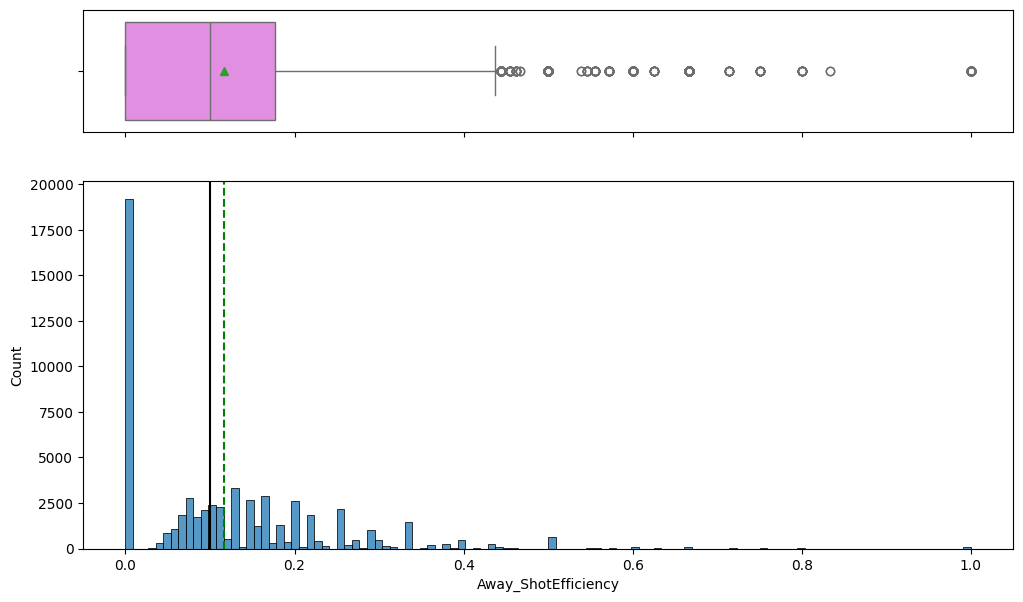

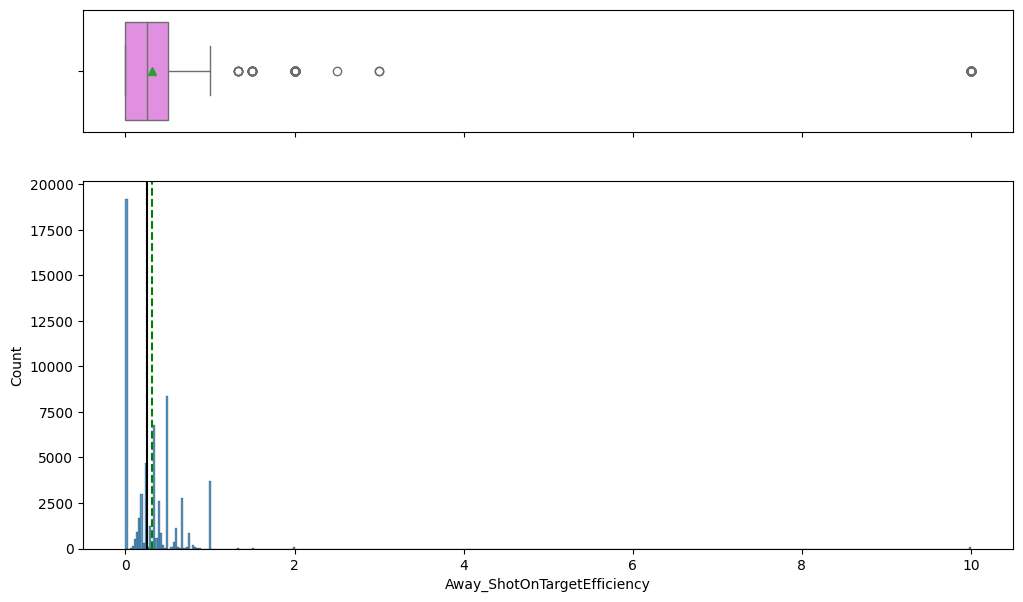

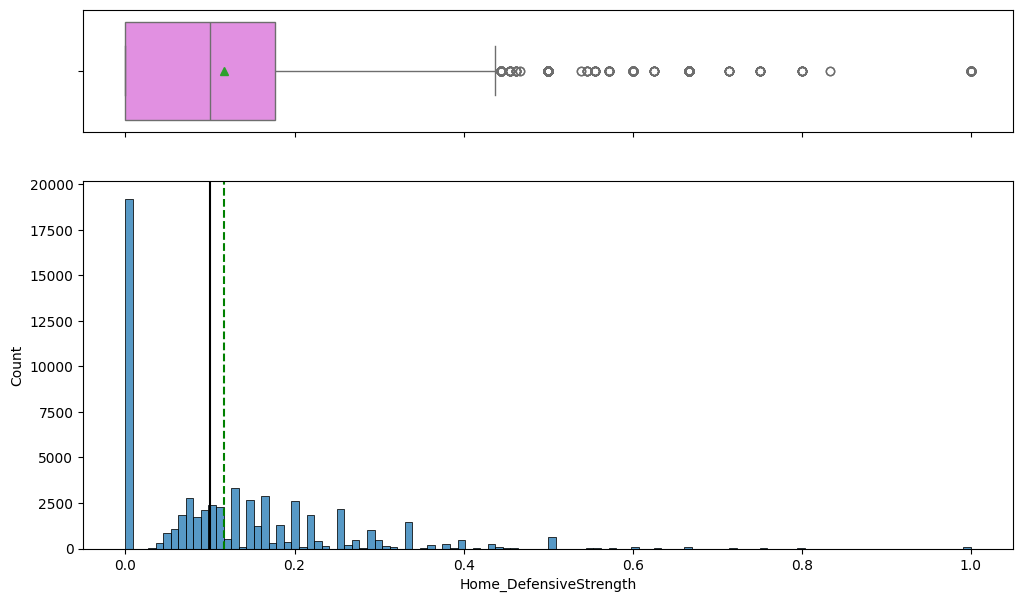

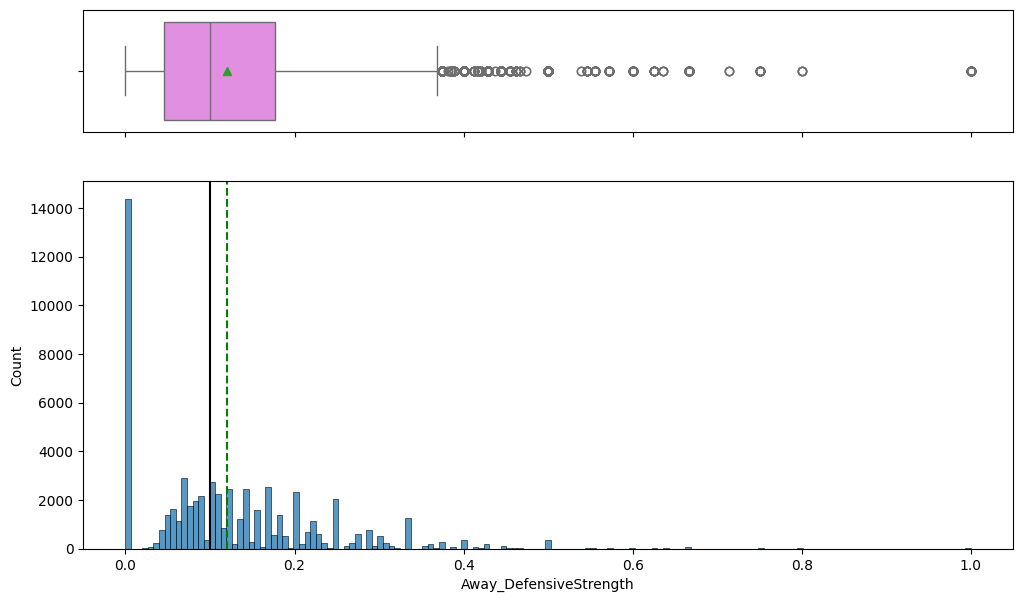

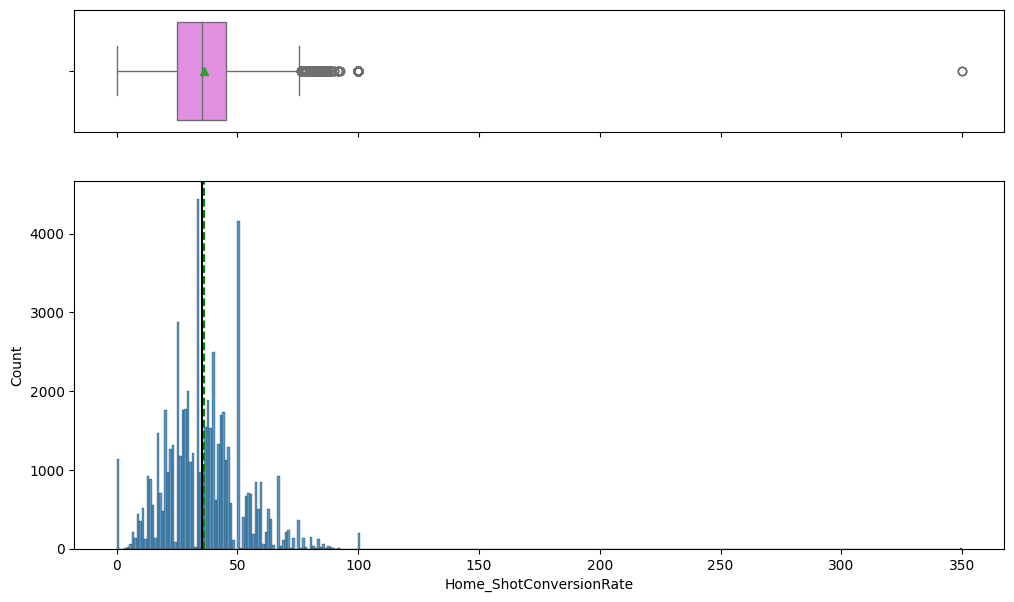

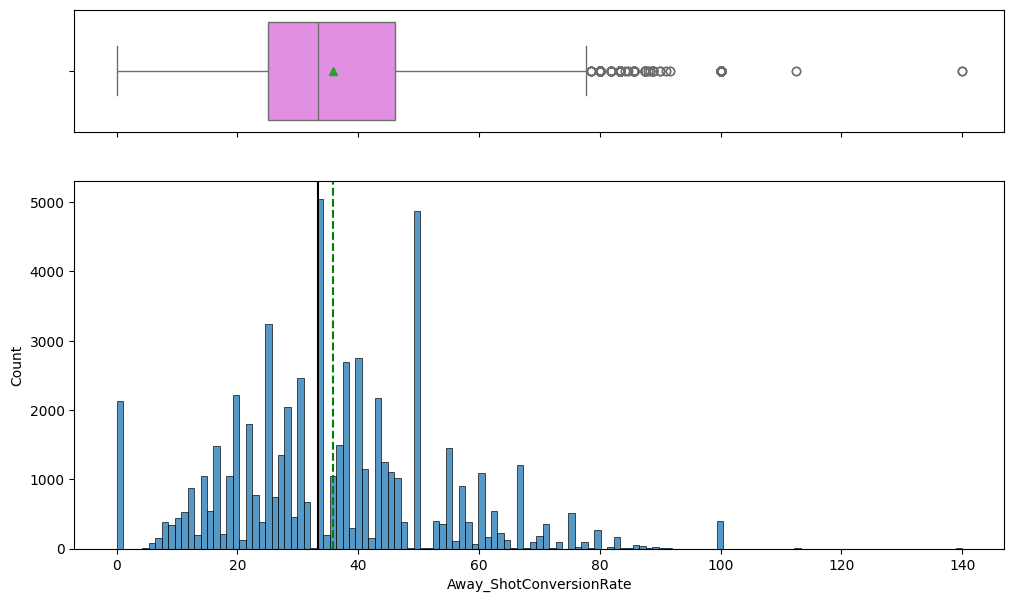

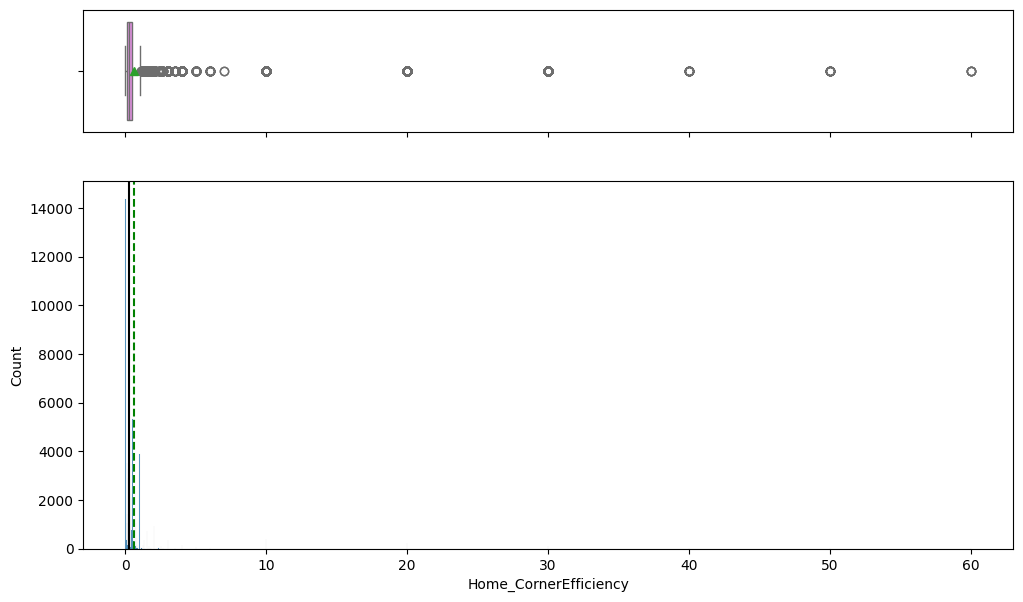

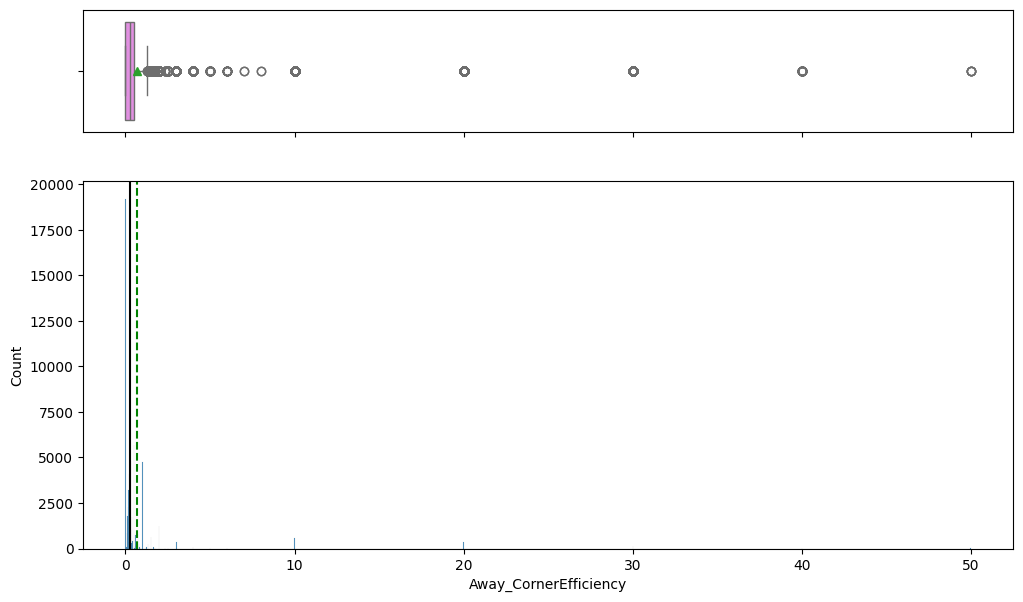

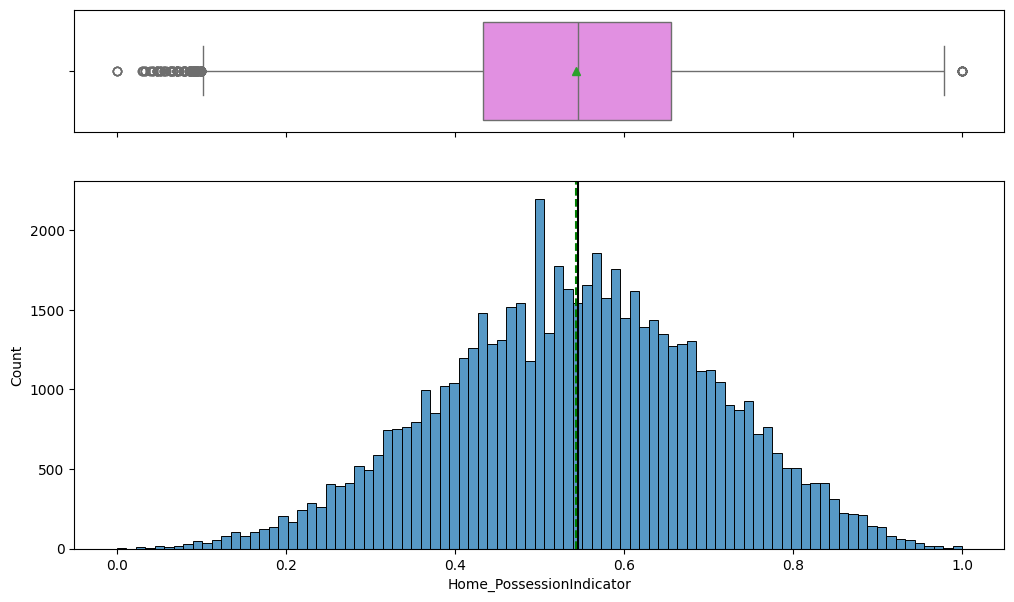

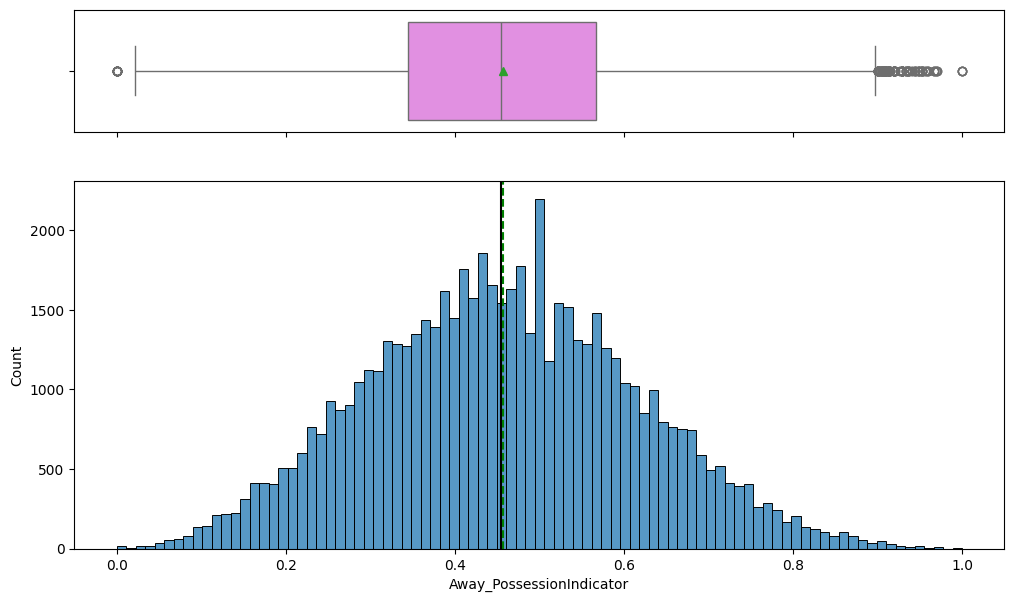

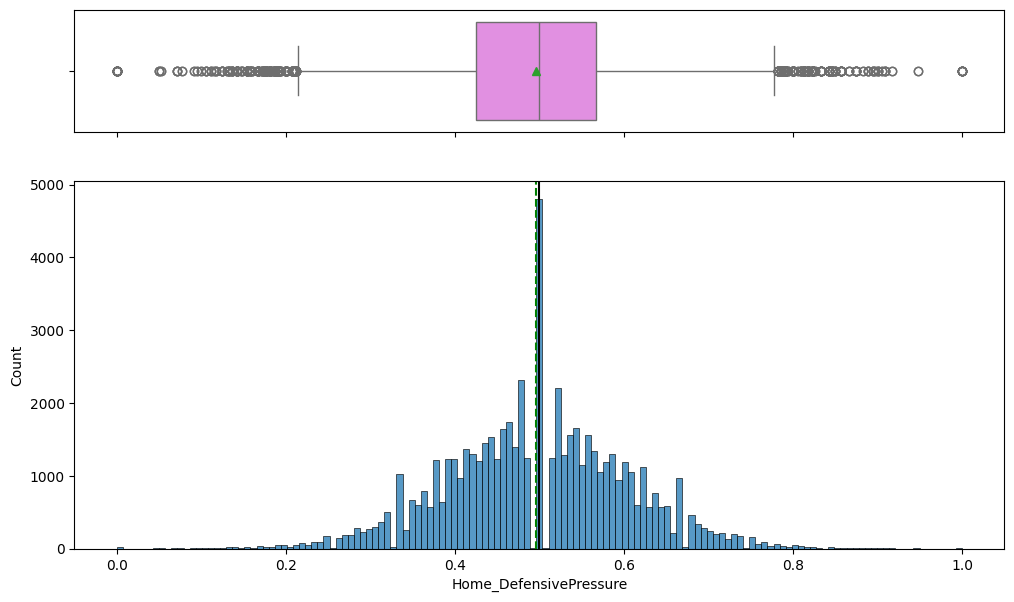

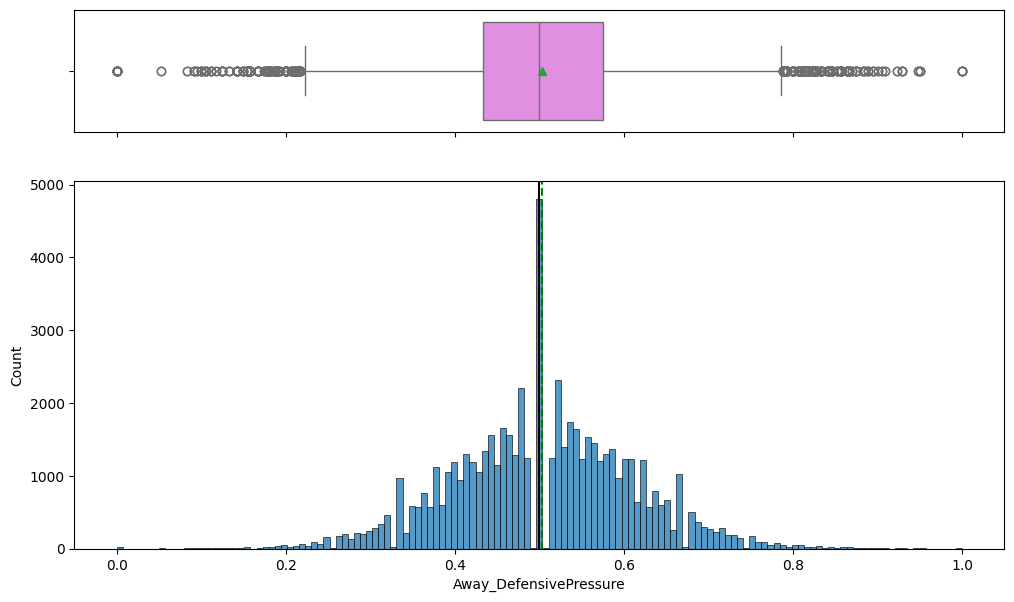

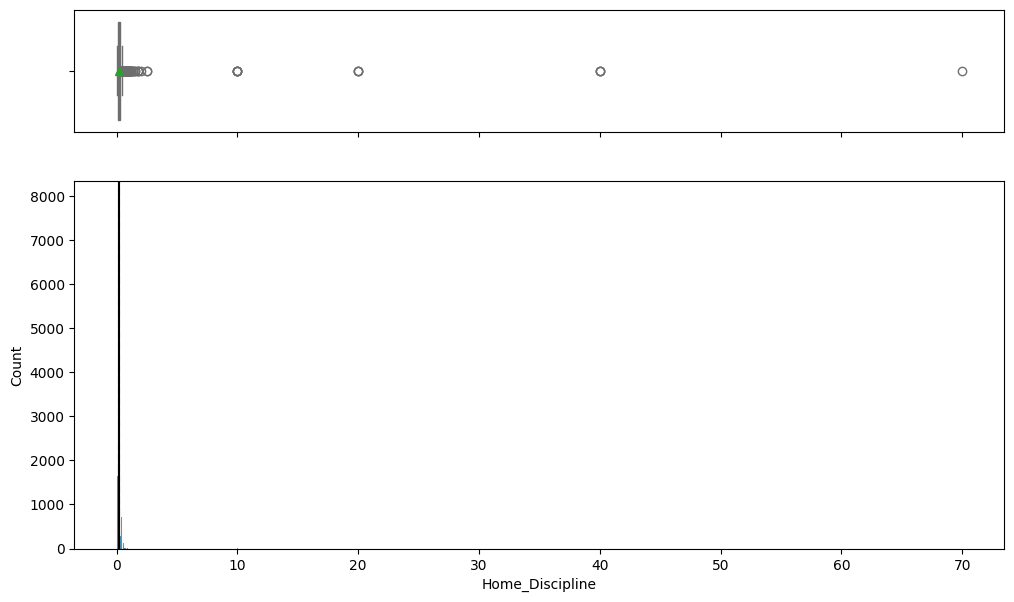

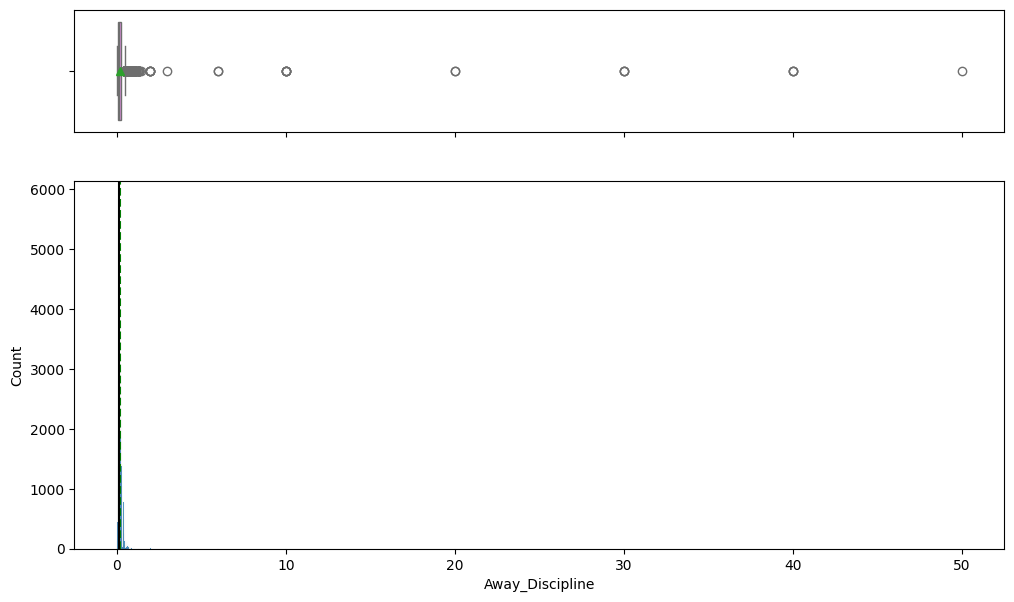

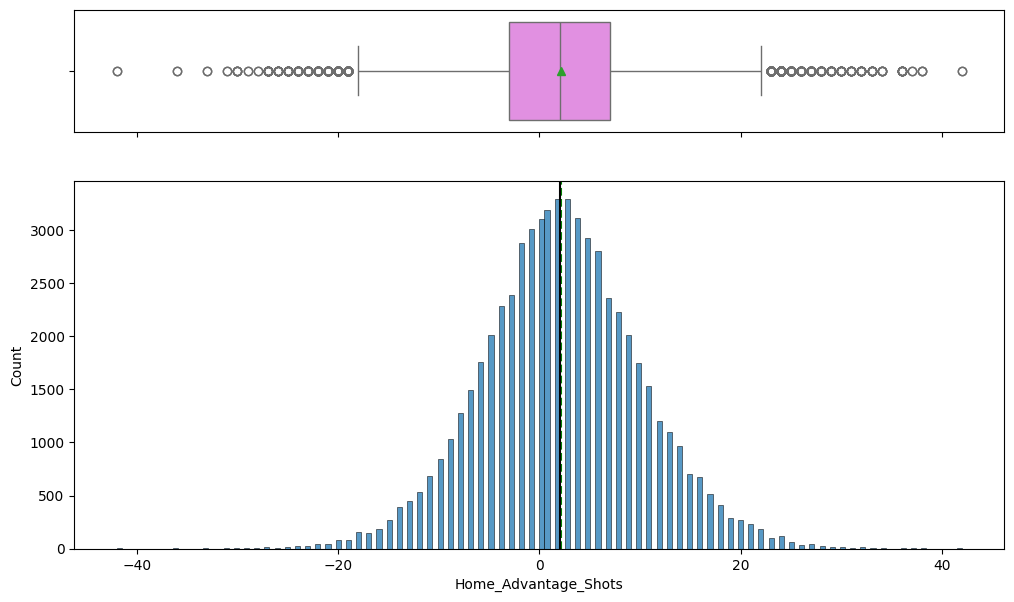

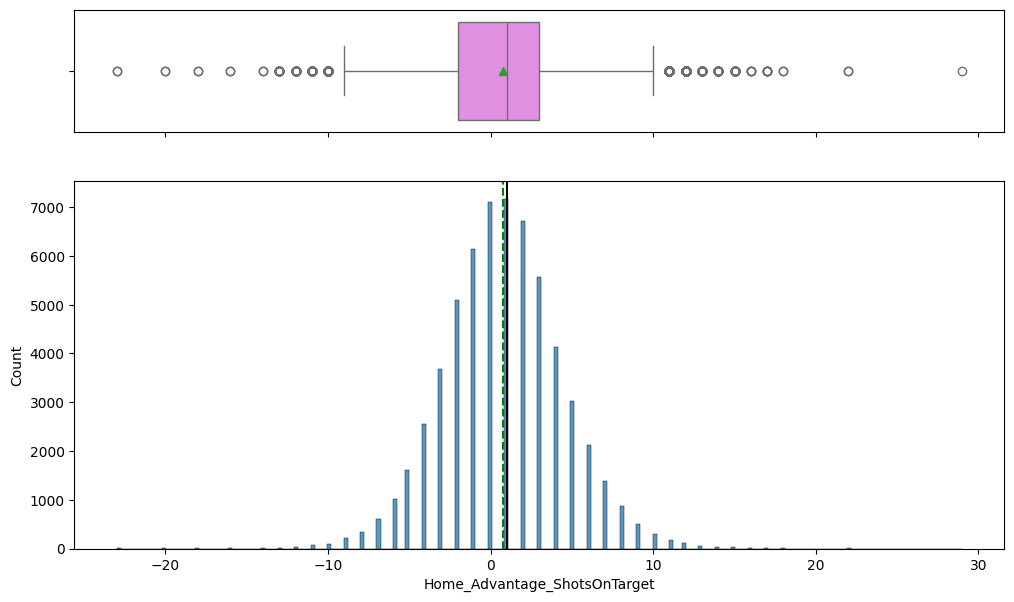

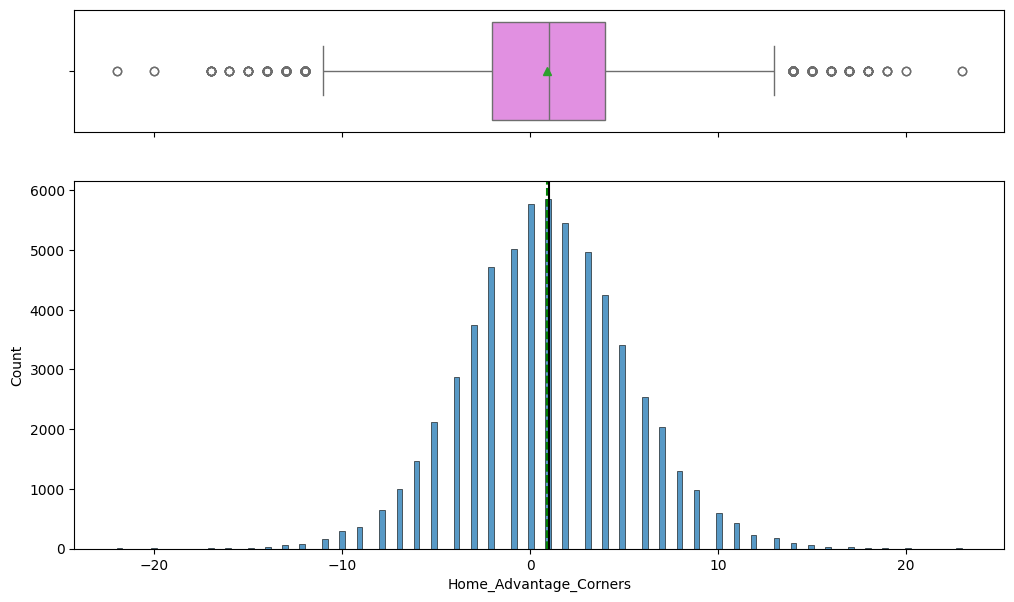

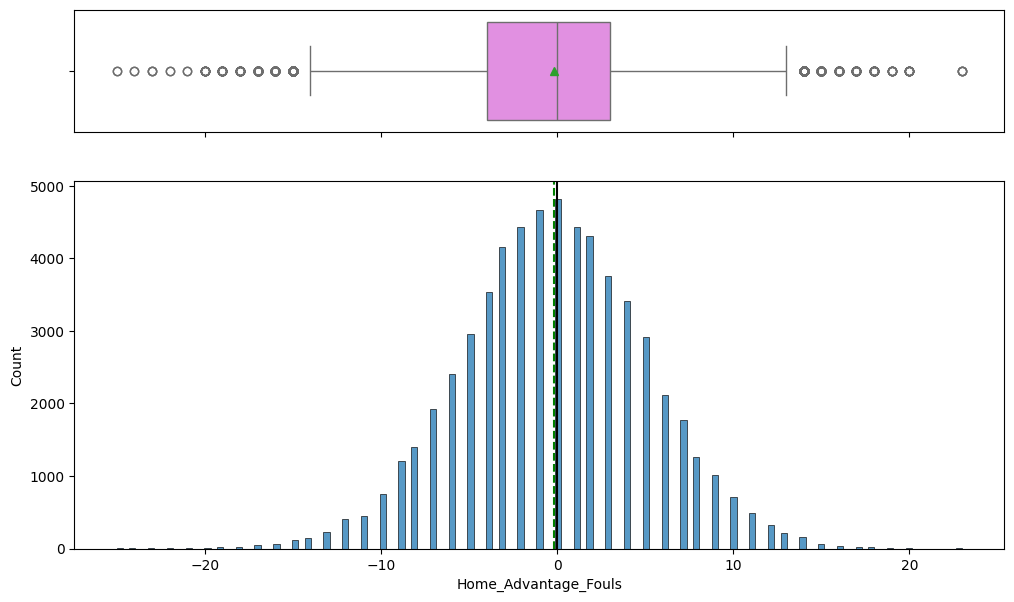

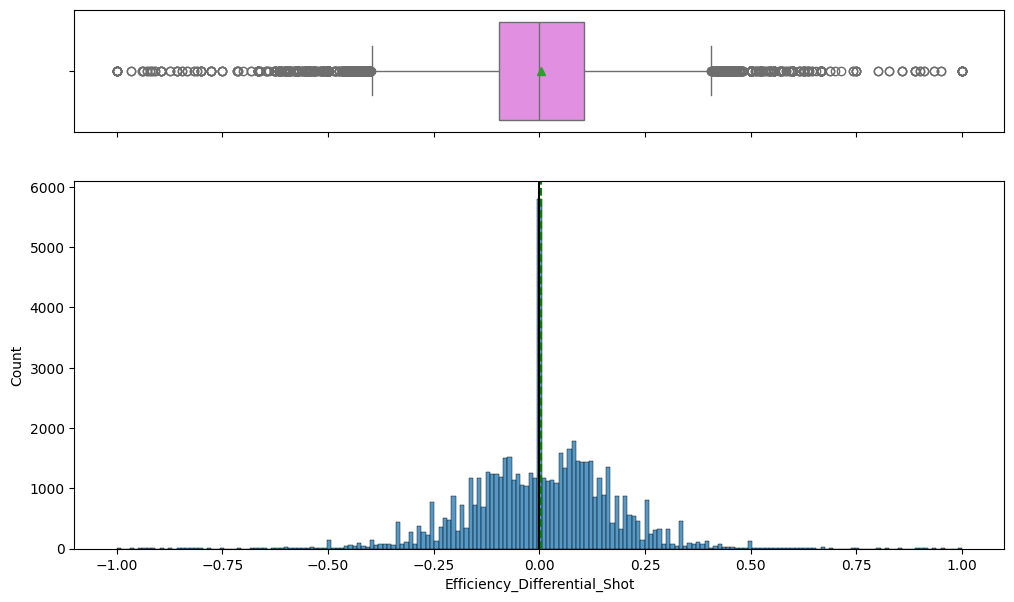

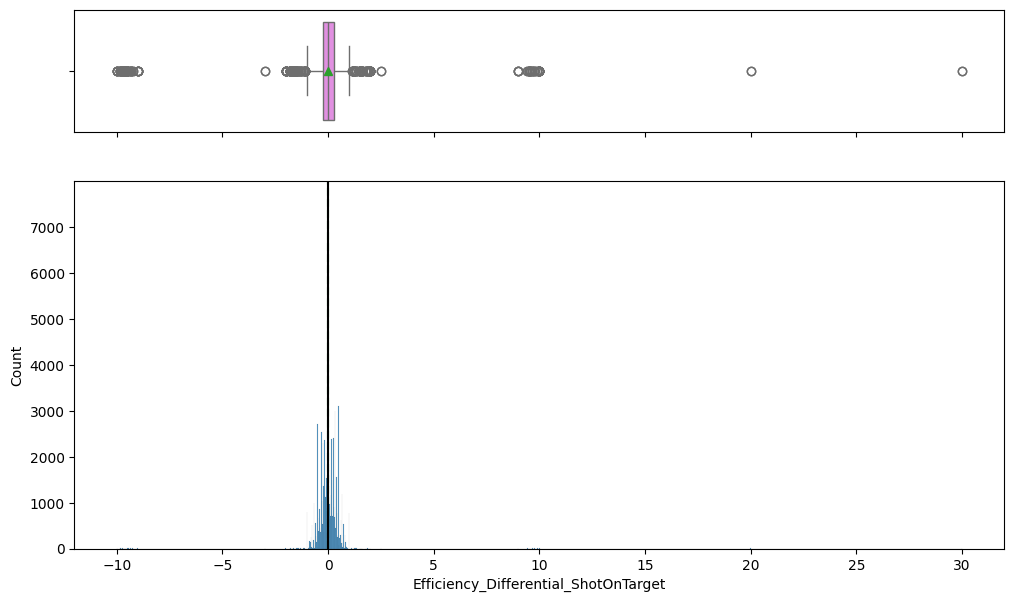

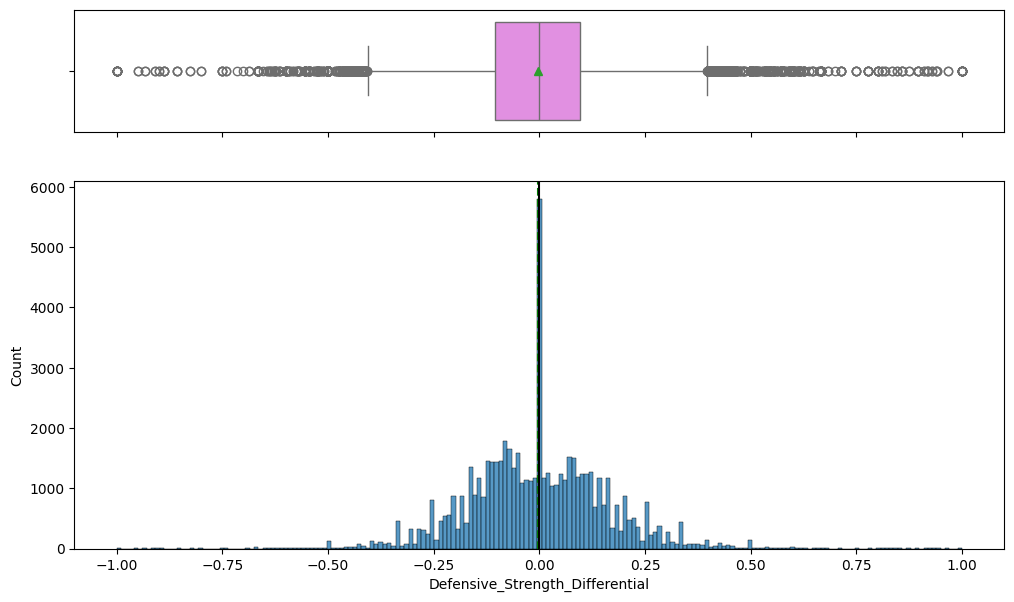

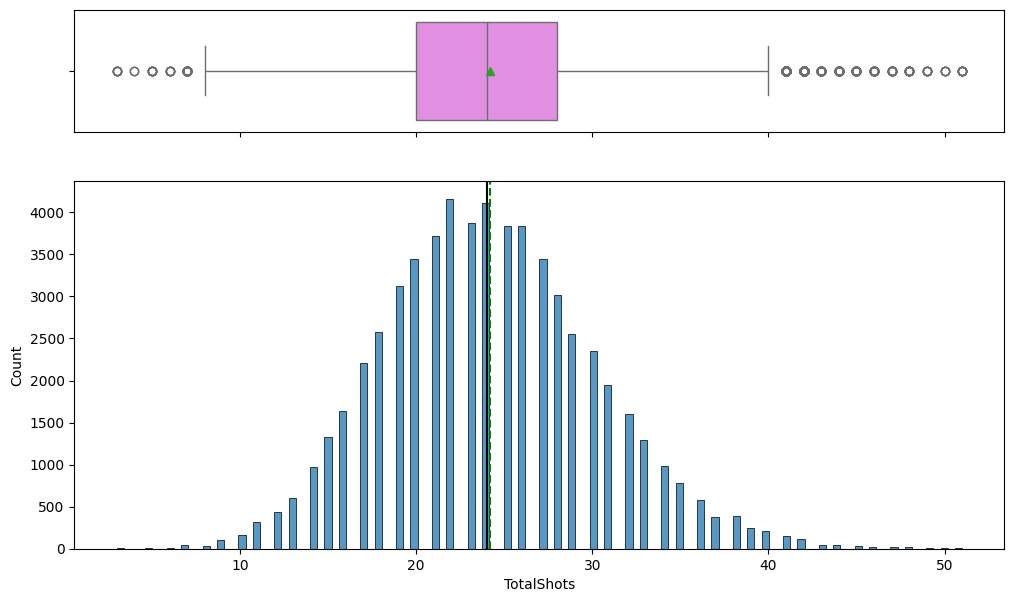

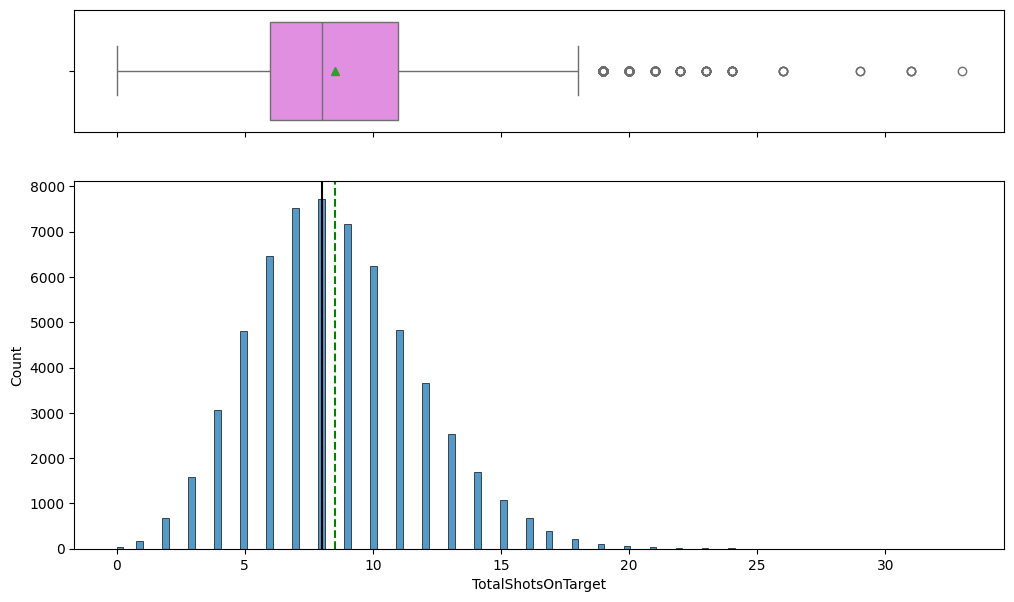

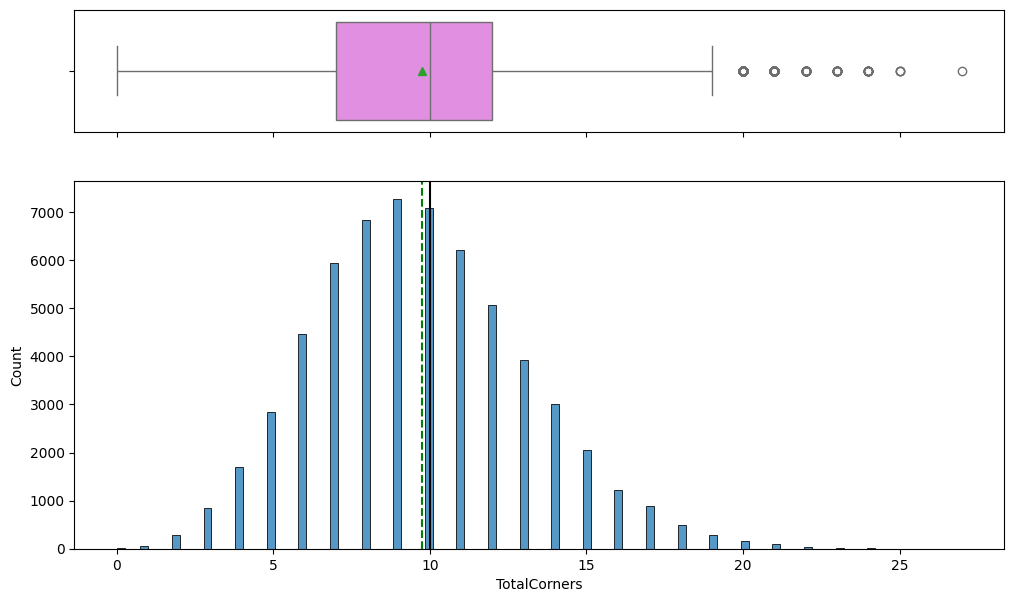

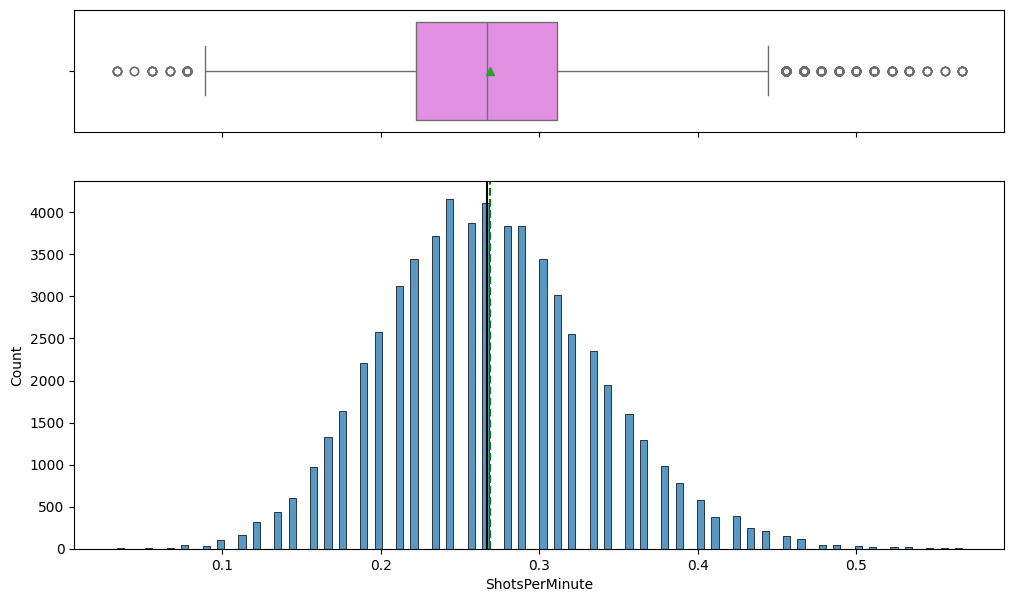

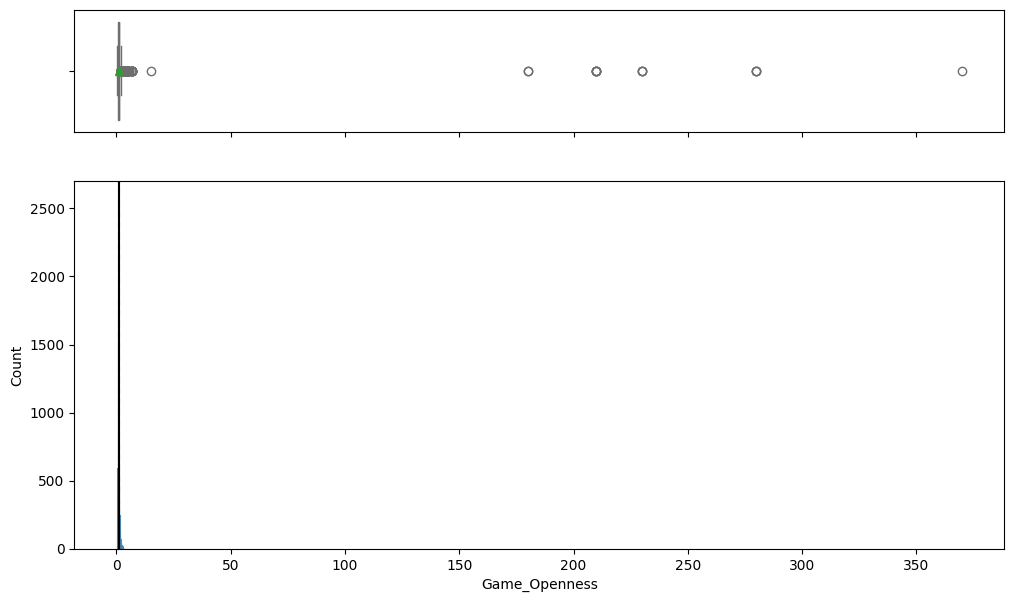

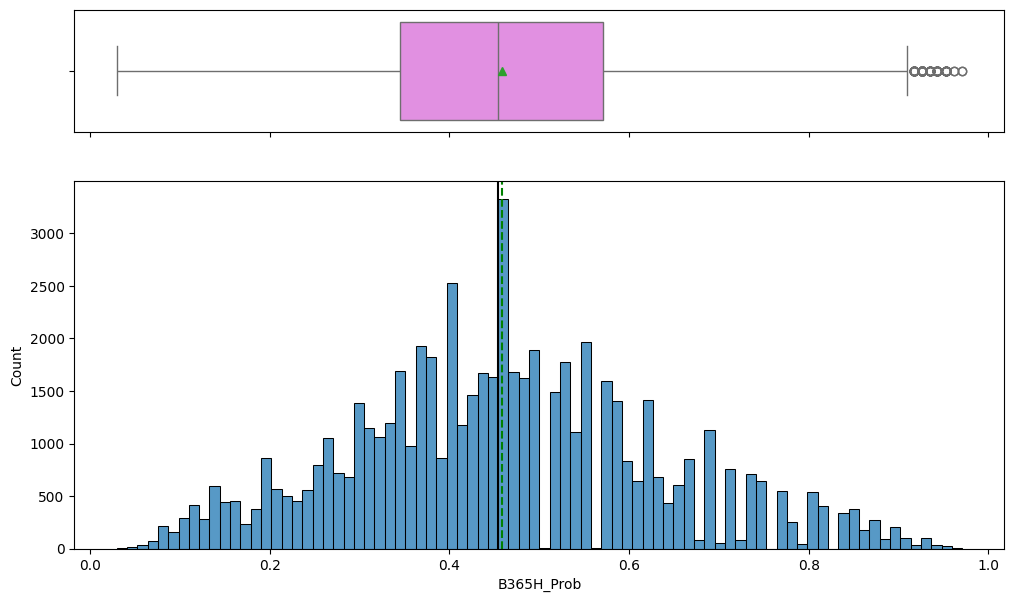

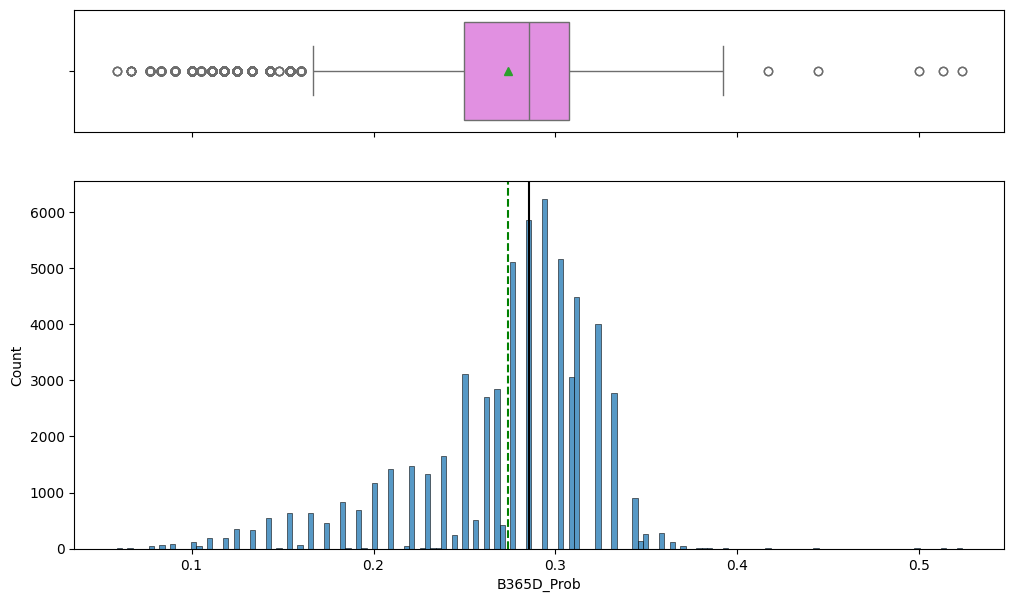

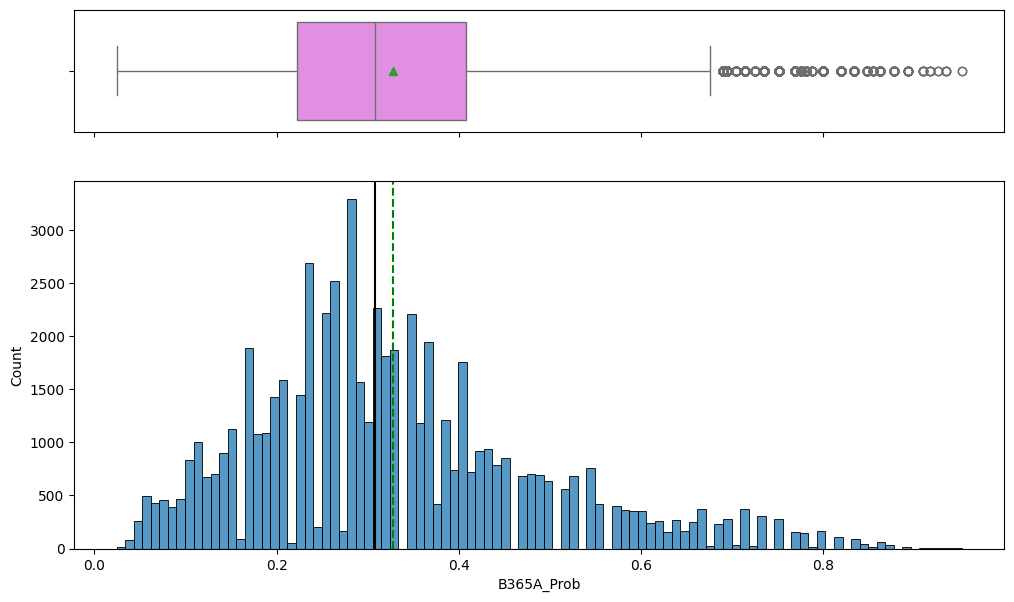

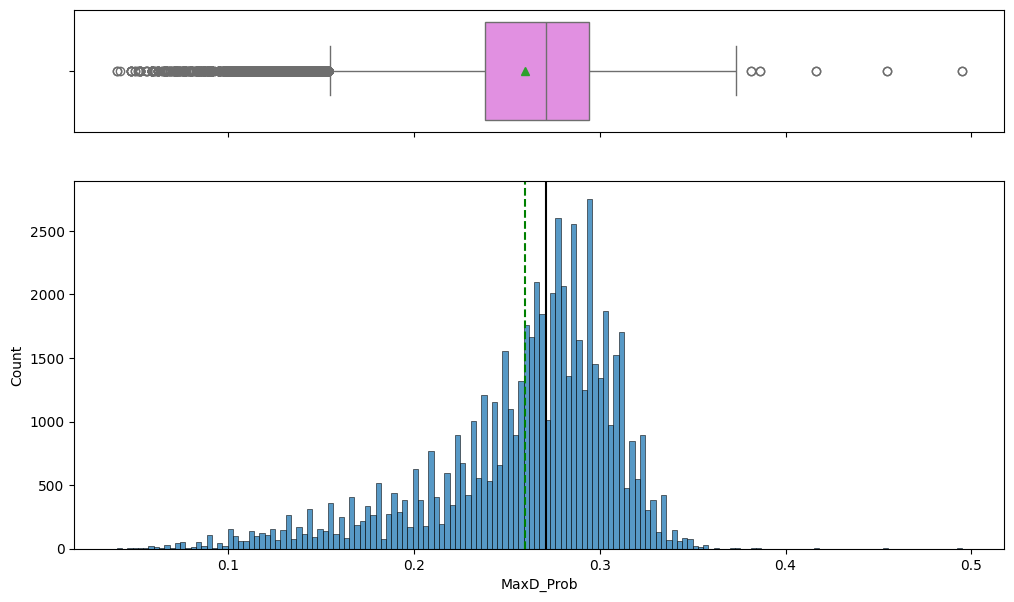

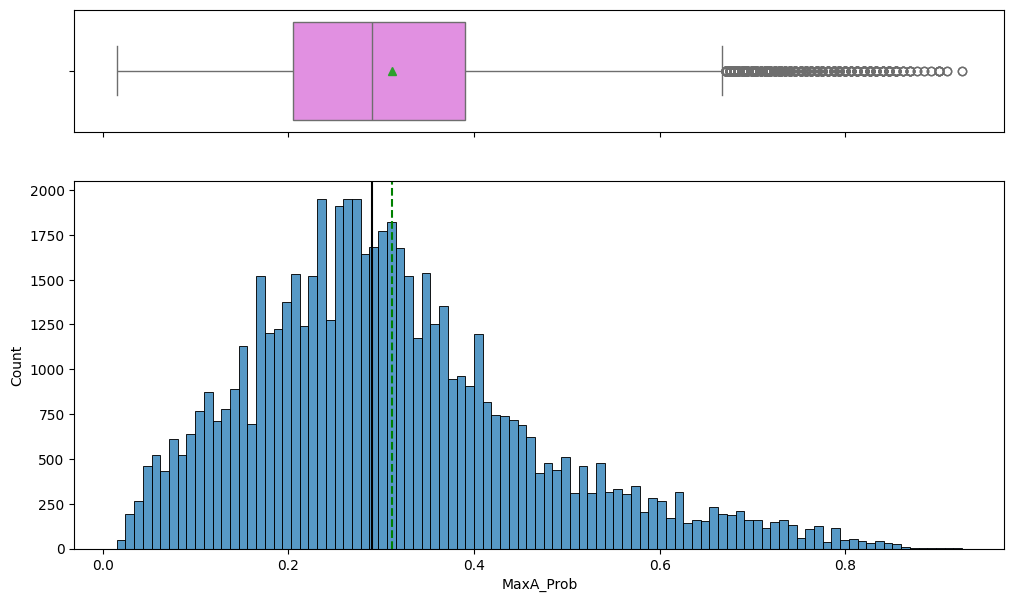

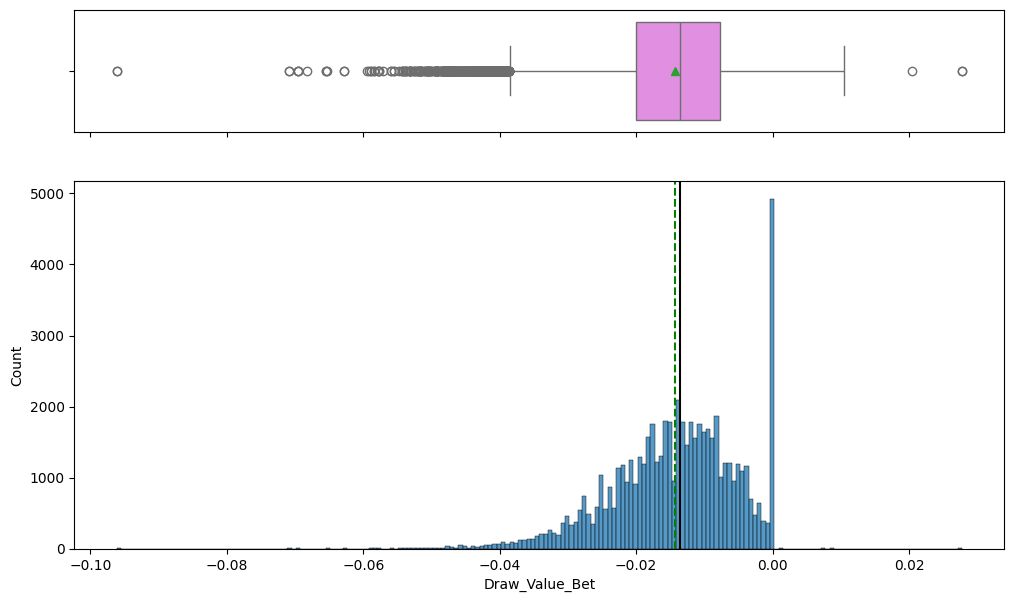

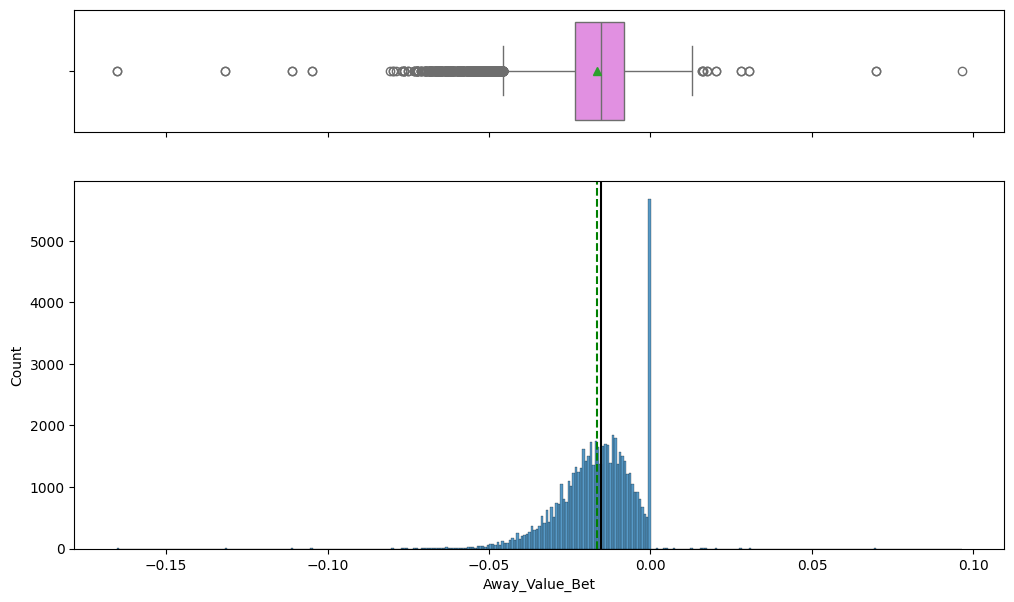

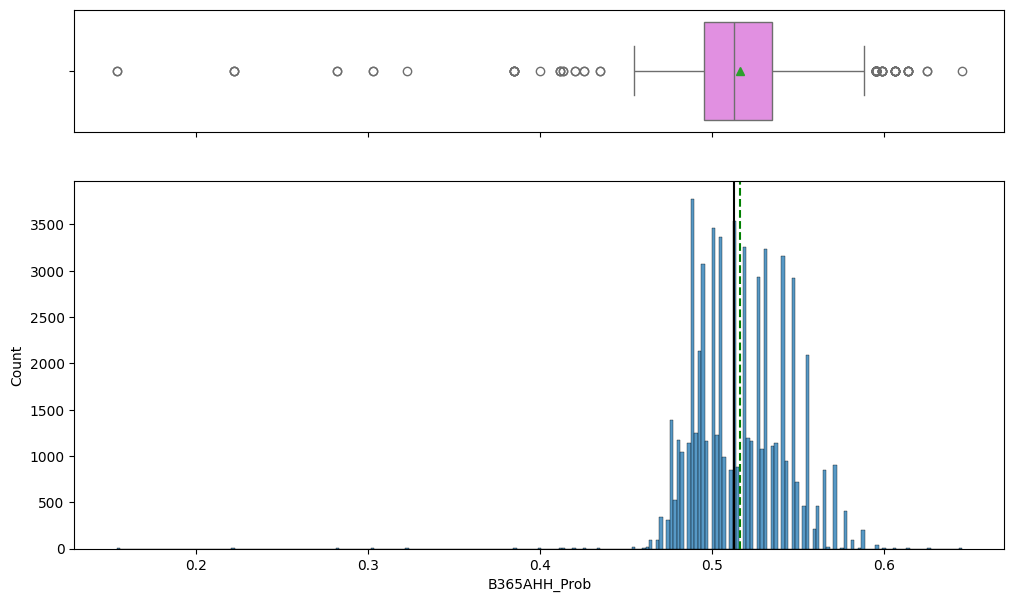

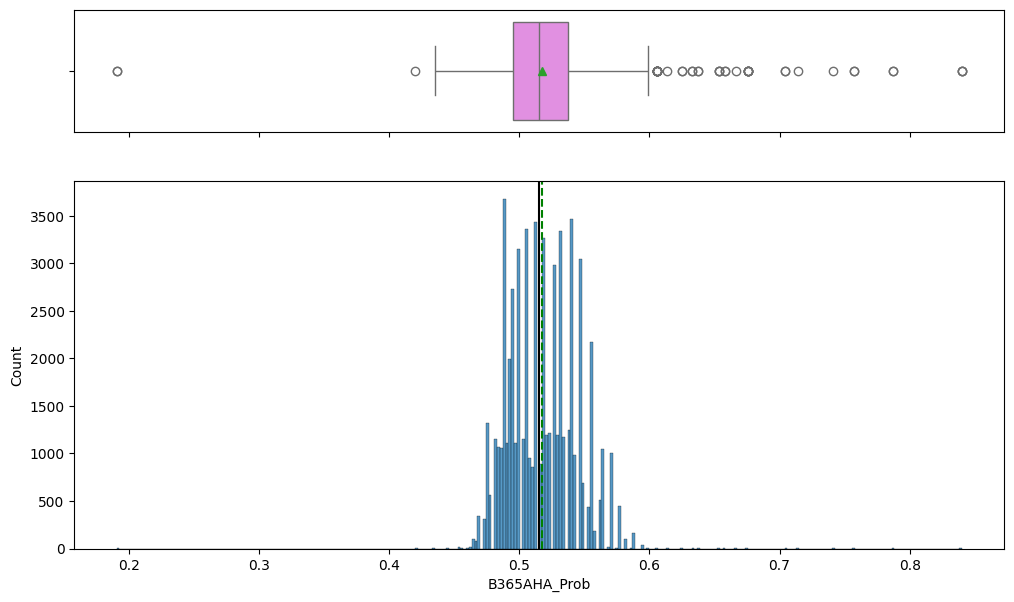

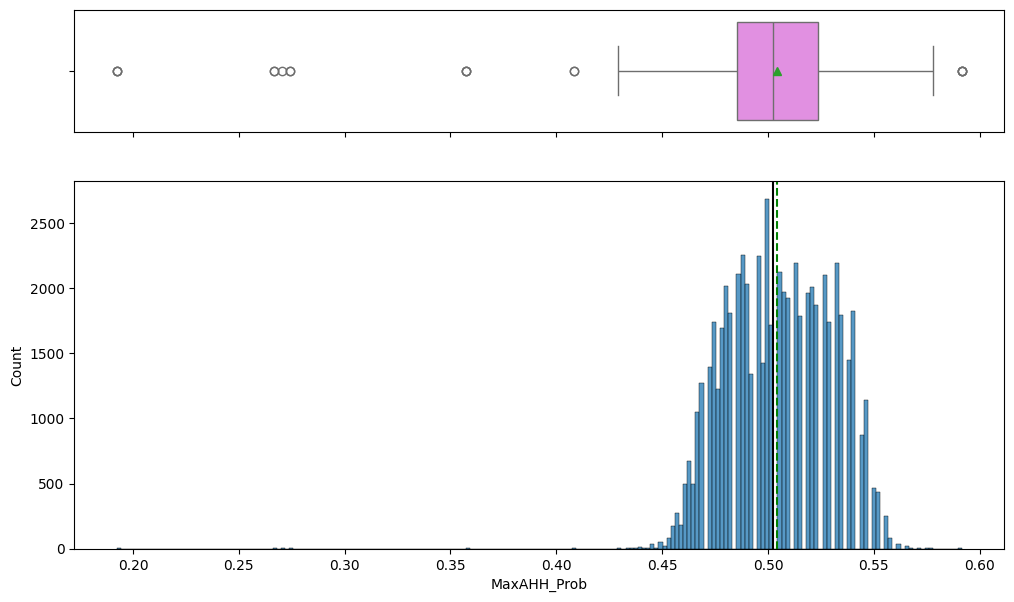

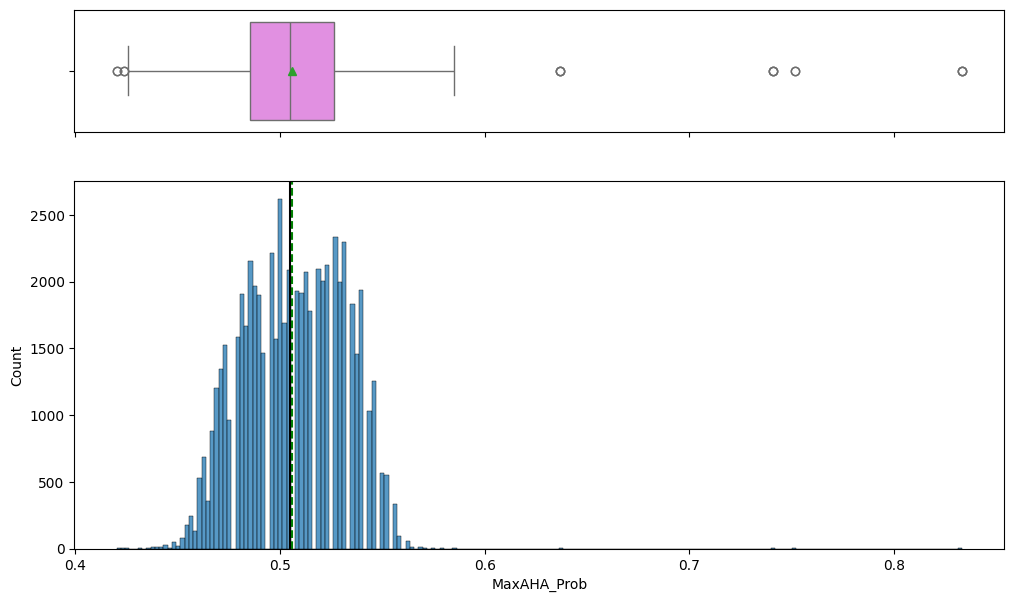

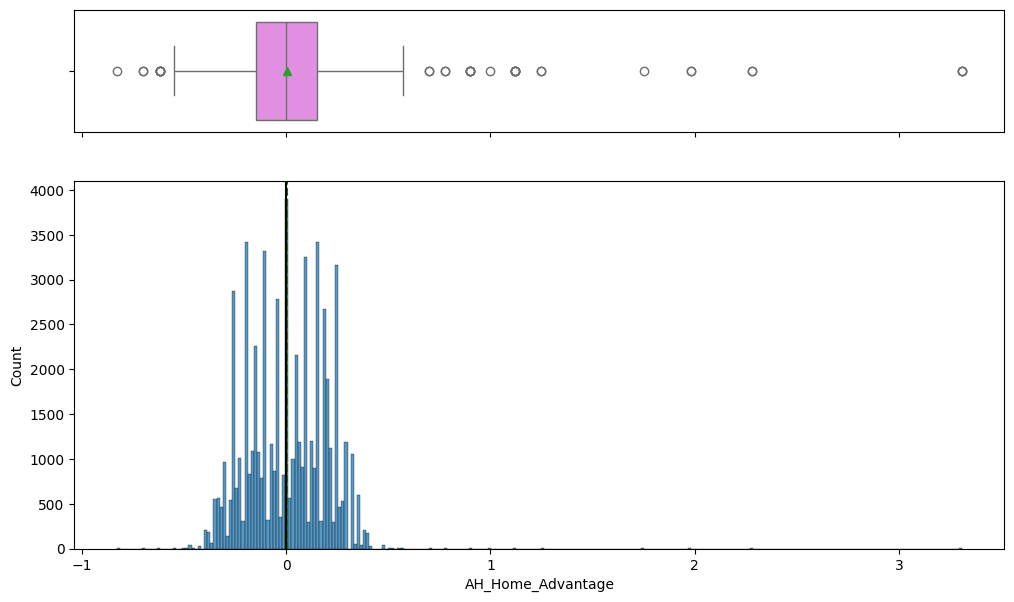

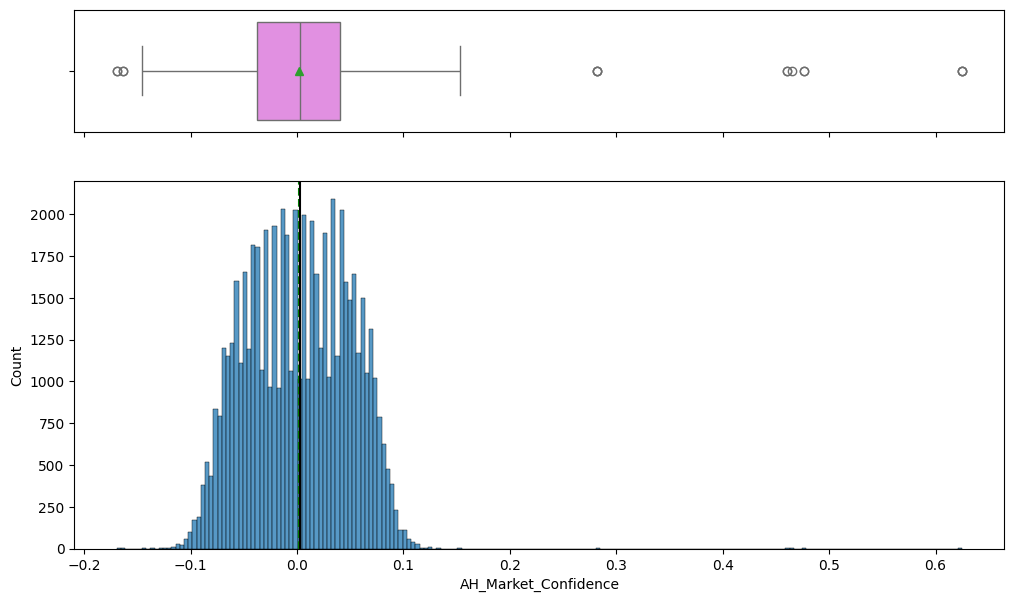

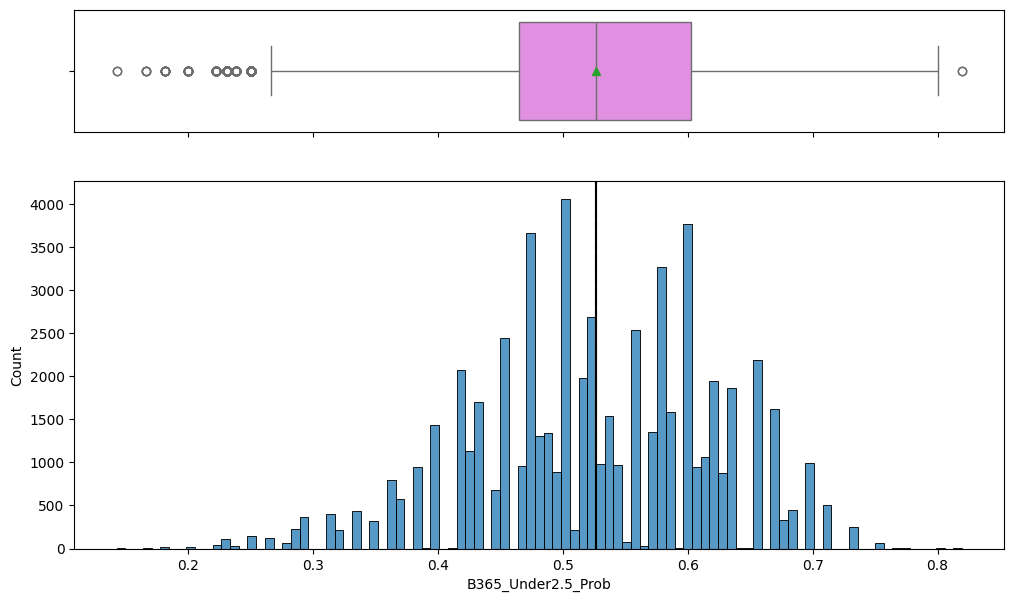

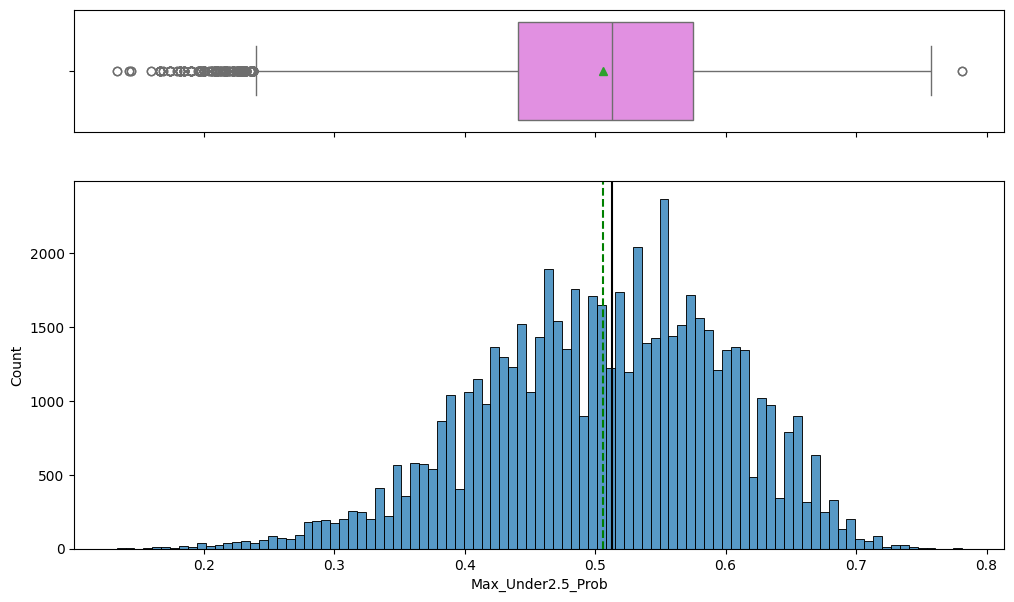

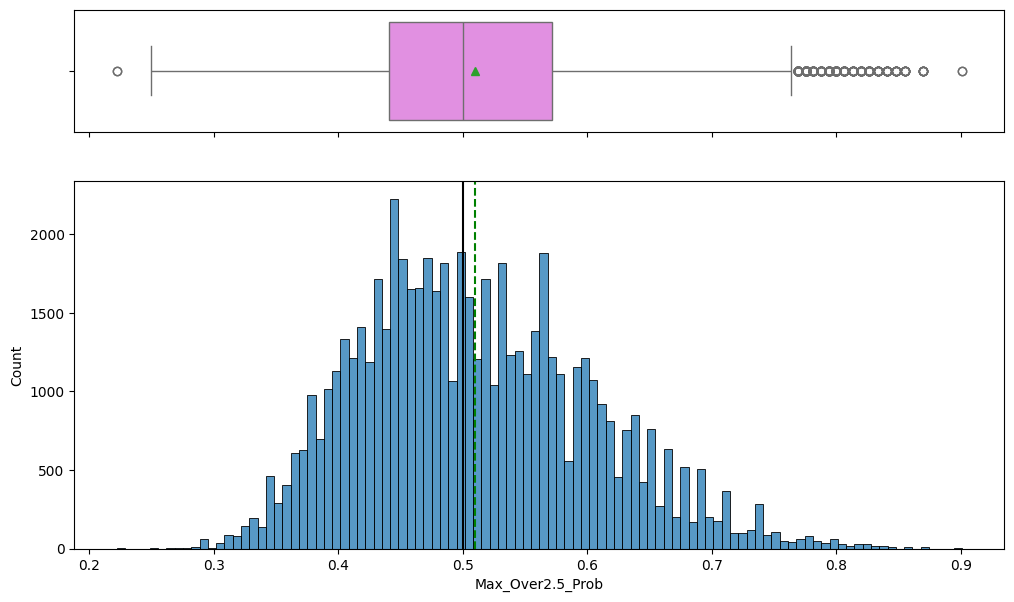

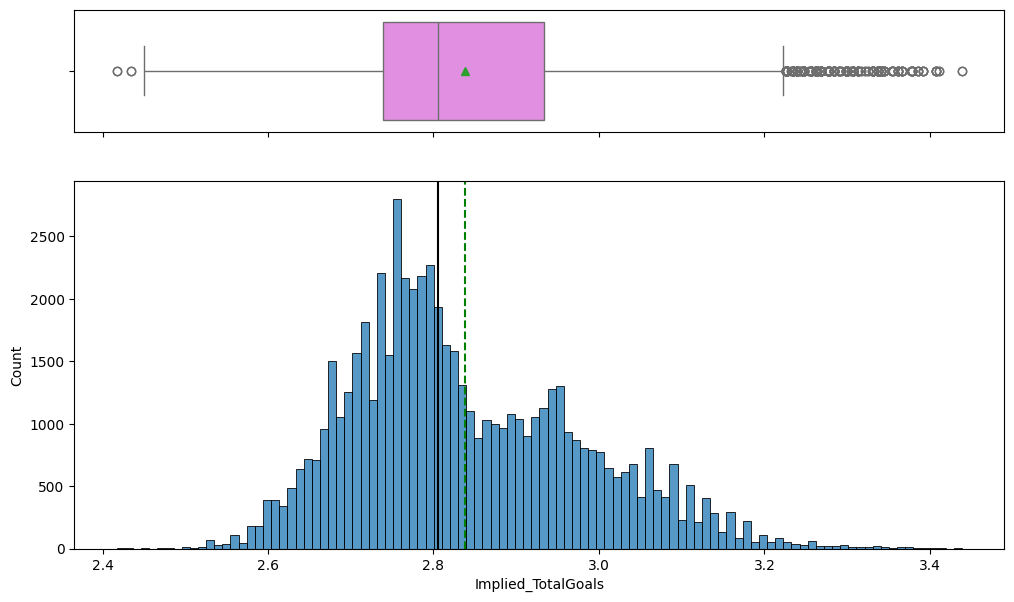

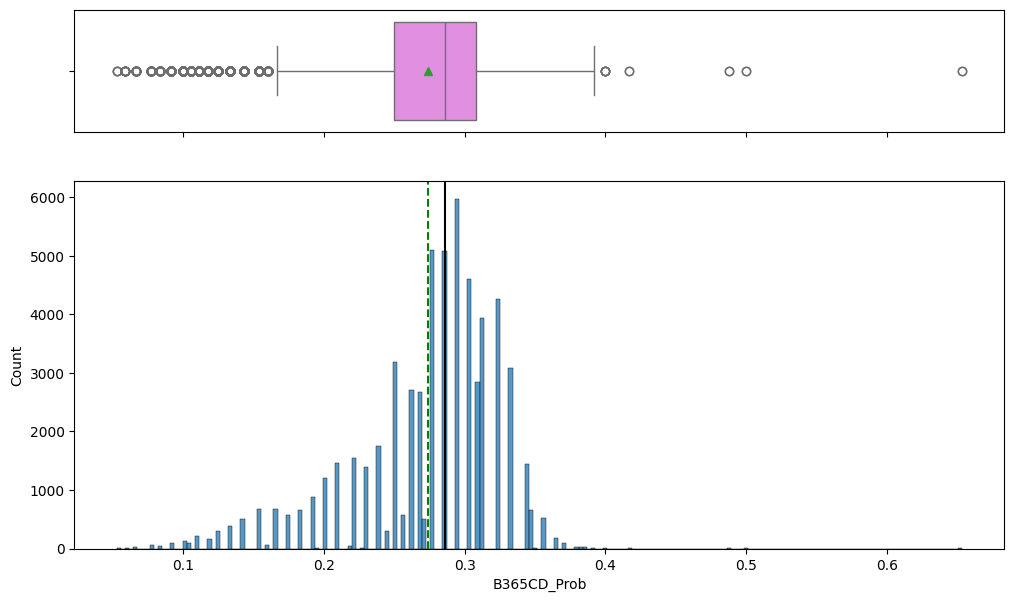

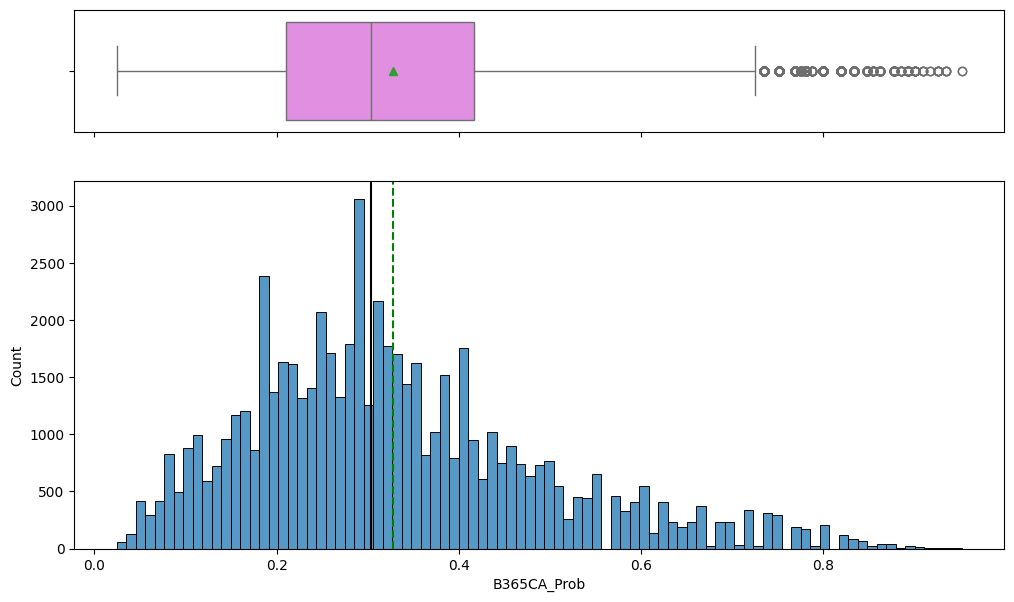

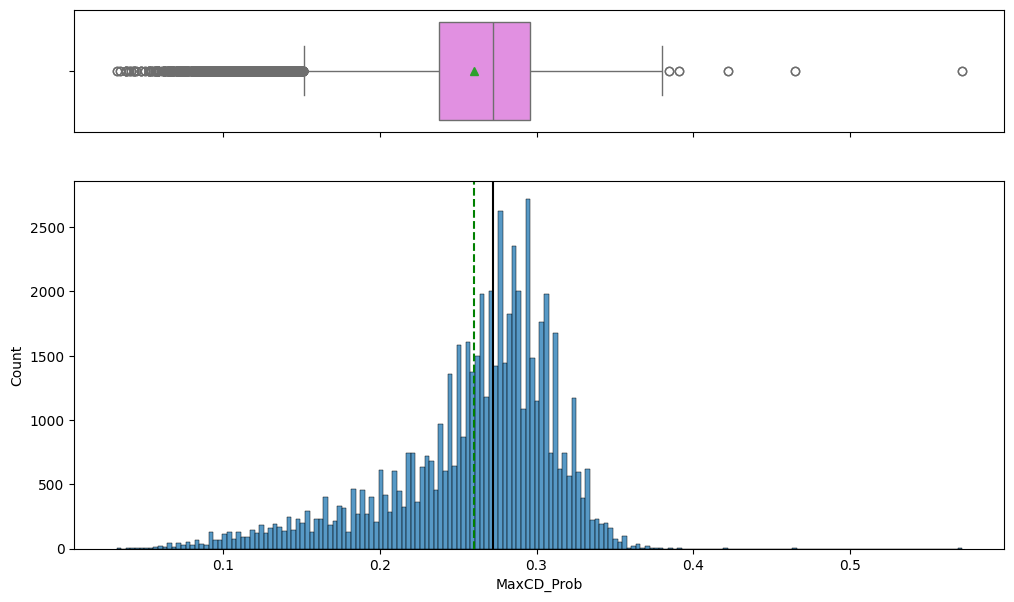

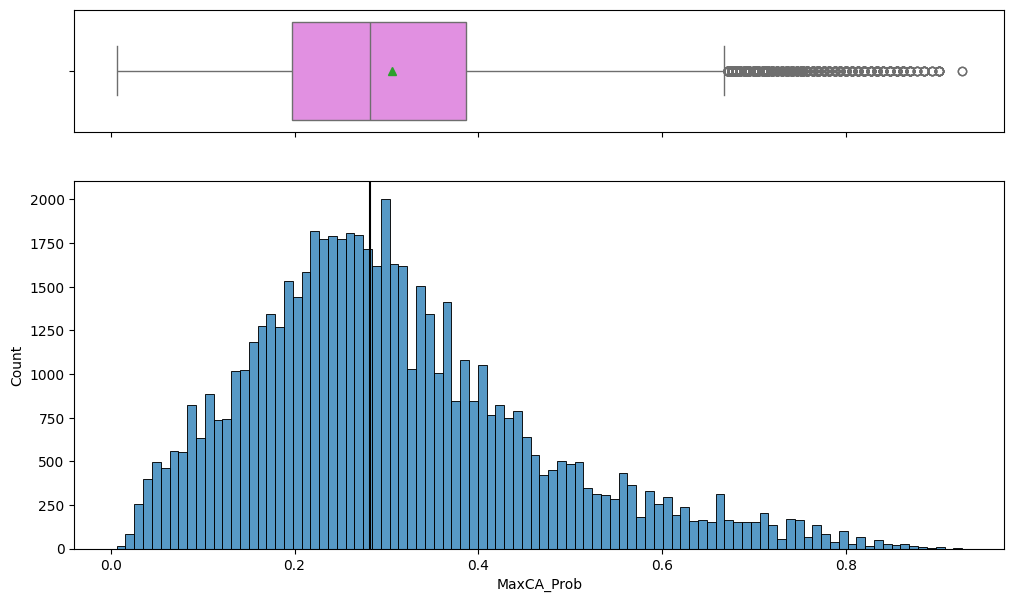

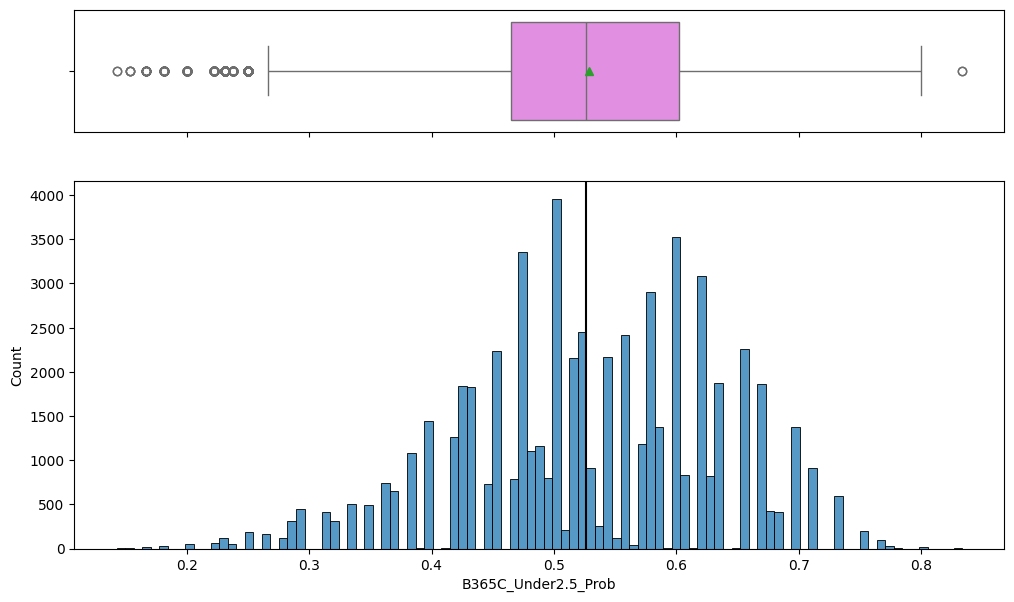

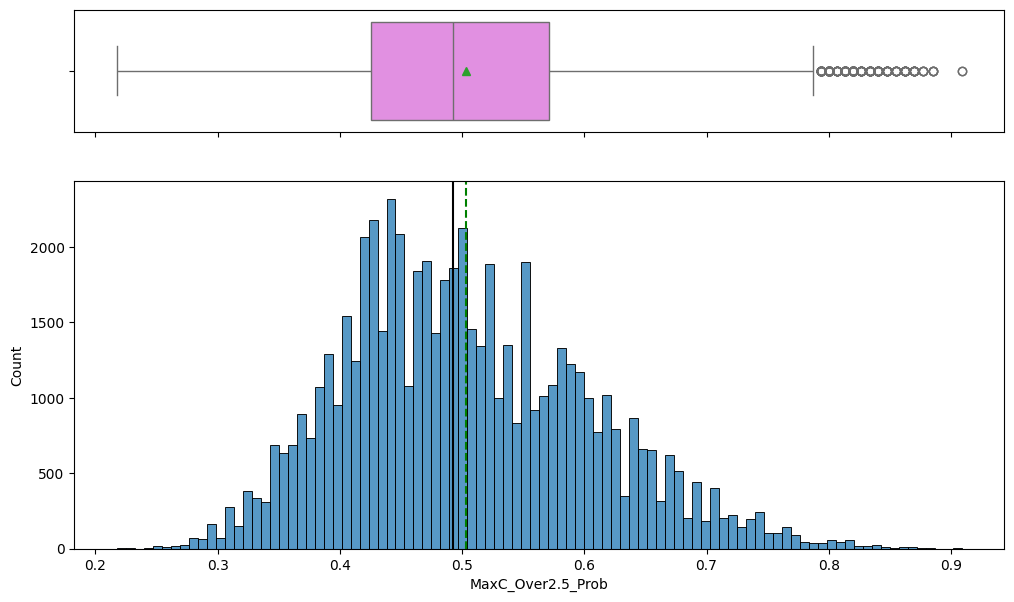

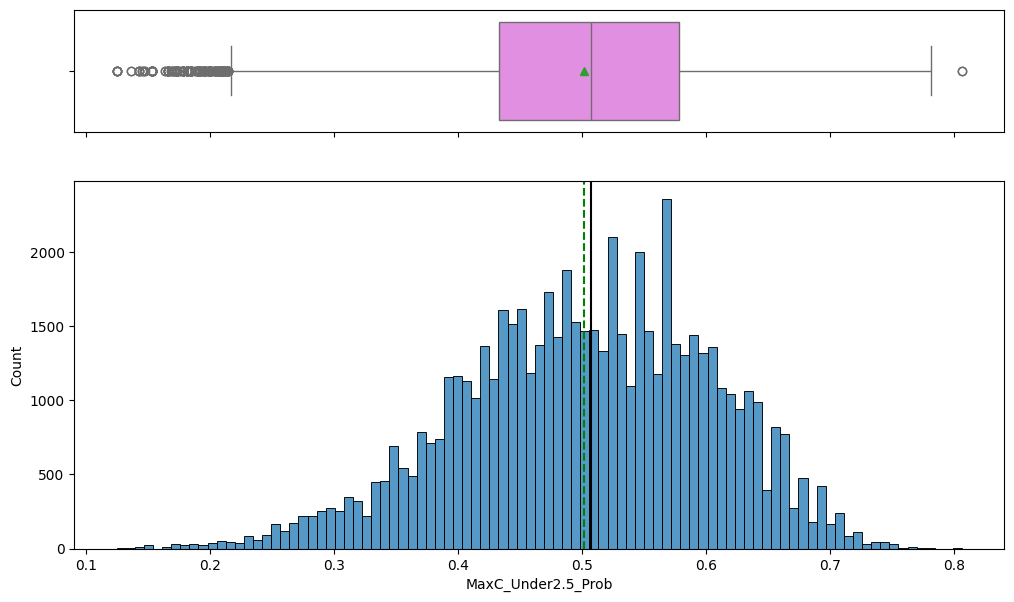

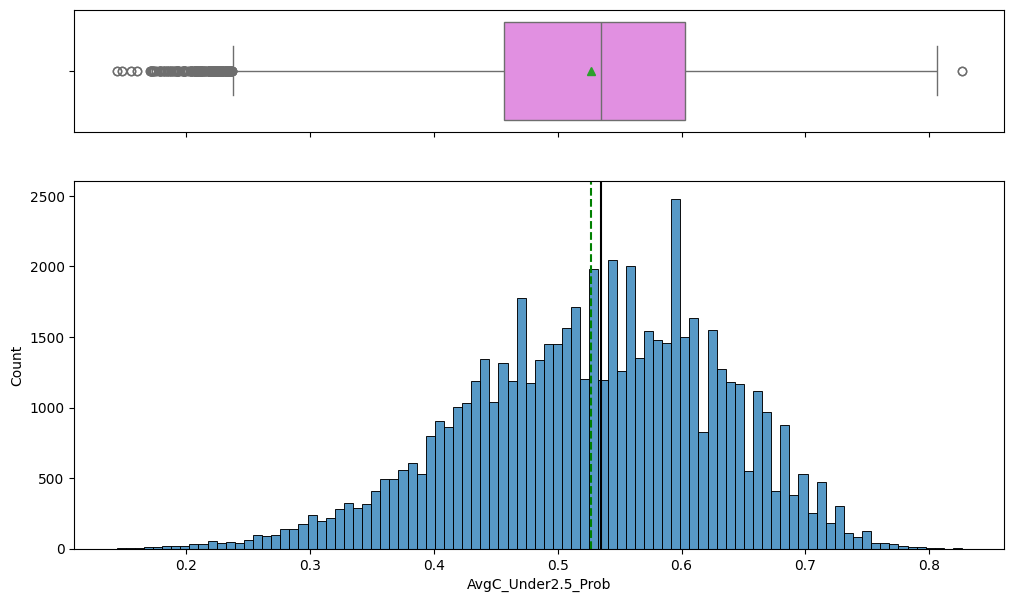

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Loop through the numerical columns and generate the plots
for feature in numerical_columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)


### Categorical Columns

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on HomeTeam

In [ ]:
#labeled_barplot(df, "HomeTeam", perc=True)

### Observations on AwayTeam

In [ ]:
#labeled_barplot(df, "AwayTeam", perc=True)

- Many health facilities in the county are sponsored by the county government(97%) followed by CBO(3.0%)

### Observations on FULL TIME RESULTS

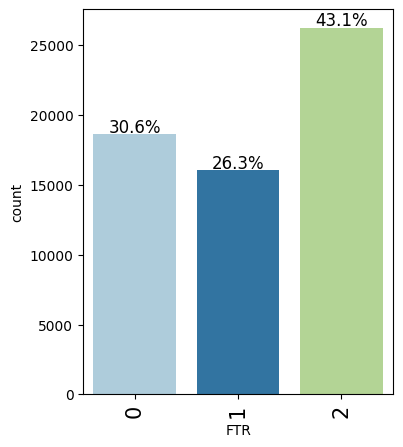

In [ ]:
labeled_barplot(df, "FTR", perc=True)

### Observations on HALF TIME RESULTS

In [ ]:
#labeled_barplot(df, "HTR", perc=True)

- This is a pairplot showing general distribution in numerical variables in our data.

## Bivariate And Multivariate Analysis

In [ ]:
# 1. Calculate correlation with target variable
correlations = df.corr()['FTR'].sort_values(ascending=False)
print("Correlations with target variable:")
print(correlations)

Correlations with target variable:
FTR                                1.000000
Efficiency_Differential_Shot       0.711399
HT_Goal_Diff                       0.570120
Away_DefensiveStrength             0.527615
Home_ShotEfficiency                0.527615
                                     ...   
B365CA_Prob                       -0.397608
MaxCA_Prob                        -0.398183
Home_DefensiveStrength            -0.504567
Away_ShotEfficiency               -0.504567
Defensive_Strength_Differential   -0.711399
Name: FTR, Length: 63, dtype: float64


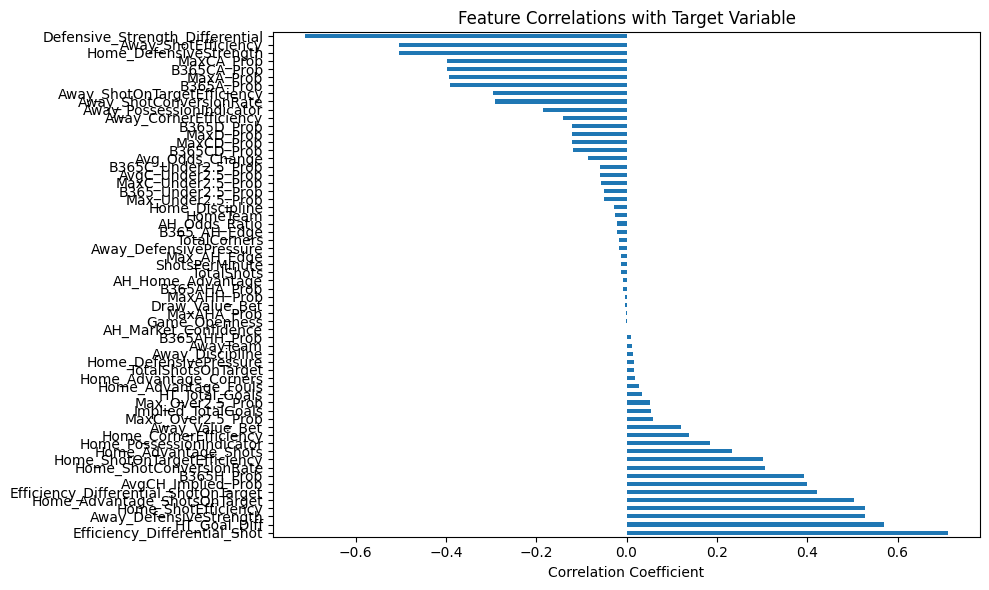

In [ ]:
 #2. Visualize correlations with target
plt.figure(figsize=(10, 6))
correlations.drop('FTR').plot(kind='barh')
plt.title('Feature Correlations with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [ ]:
 #3. Filter features based on correlation threshold
threshold = 0.1
relevant_features = correlations[abs(correlations) > threshold].index.tolist()
relevant_features.remove('FTR')  # Remove target itself
print(f"\nFeatures with |correlation| > {threshold}:")
print(relevant_features)


Features with |correlation| > 0.1:
['Efficiency_Differential_Shot', 'HT_Goal_Diff', 'Away_DefensiveStrength', 'Home_ShotEfficiency', 'Home_Advantage_ShotsOnTarget', 'Efficiency_Differential_ShotOnTarget', 'AvgCH_Implied_Prob', 'B365H_Prob', 'Home_ShotConversionRate', 'Home_ShotOnTargetEfficiency', 'Home_Advantage_Shots', 'Home_PossessionIndicator', 'Home_CornerEfficiency', 'Away_Value_Bet', 'B365CD_Prob', 'MaxCD_Prob', 'MaxD_Prob', 'B365D_Prob', 'Away_CornerEfficiency', 'Away_PossessionIndicator', 'Away_ShotConversionRate', 'Away_ShotOnTargetEfficiency', 'B365A_Prob', 'MaxA_Prob', 'B365CA_Prob', 'MaxCA_Prob', 'Home_DefensiveStrength', 'Away_ShotEfficiency', 'Defensive_Strength_Differential']


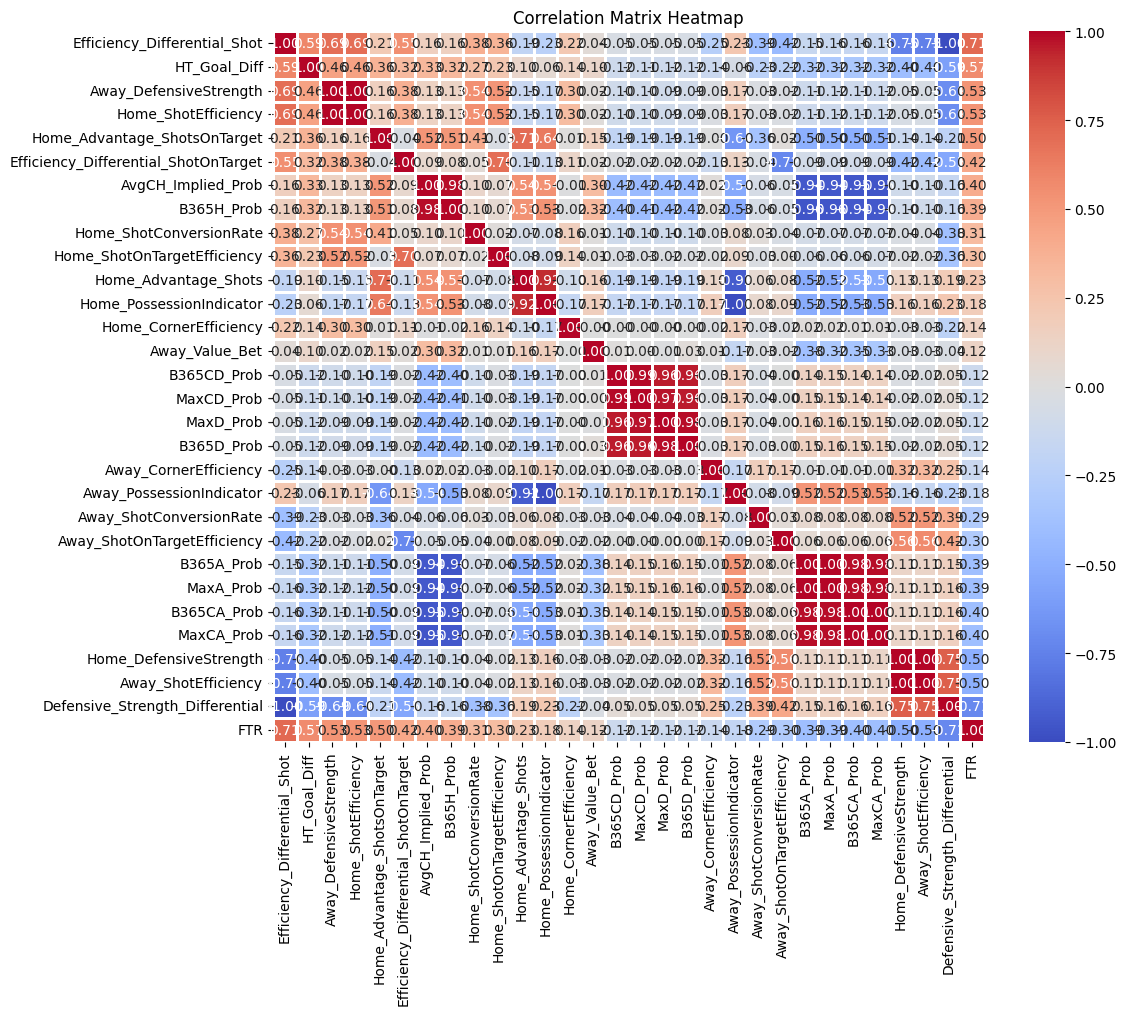

In [ ]:
# 4. Full correlation matrix for multicollinearity check
plt.figure(figsize=(12, 10))
correlation_matrix = df[relevant_features + ['FTR']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# 5. Detect multicollinearity among predictors
def find_high_correlations(df, features, threshold=0.8):
    """Find pairs of features with high correlation"""
    corr_matrix = df[features].corr()
    high_corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })

    return pd.DataFrame(high_corr_pairs)

multicollinear_features = find_high_correlations(df, relevant_features, threshold=0.8)
print("\nHighly correlated feature pairs (multicollinearity):")
print(multicollinear_features)


Highly correlated feature pairs (multicollinearity):
                        feature1                         feature2  correlation
0   Efficiency_Differential_Shot  Defensive_Strength_Differential    -1.000000
1         Away_DefensiveStrength              Home_ShotEfficiency     1.000000
2             AvgCH_Implied_Prob                       B365H_Prob     0.981711
3             AvgCH_Implied_Prob                       B365A_Prob    -0.940141
4             AvgCH_Implied_Prob                        MaxA_Prob    -0.942172
5             AvgCH_Implied_Prob                      B365CA_Prob    -0.953079
6             AvgCH_Implied_Prob                       MaxCA_Prob    -0.953393
7                     B365H_Prob                       B365A_Prob    -0.958337
8                     B365H_Prob                        MaxA_Prob    -0.959443
9                     B365H_Prob                      B365CA_Prob    -0.937847
10                    B365H_Prob                       MaxCA_Prob    -0.94156

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
df.duplicated().sum()

np.int64(28088)

In [ ]:
# Removing duplicates
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

HomeTeam                        0
AwayTeam                        0
FTR                             0
Home_ShotEfficiency             3
Home_ShotOnTargetEfficiency     3
                               ..
MaxCA_Prob                      2
B365C_Under2.5_Prob            10
MaxC_Over2.5_Prob               2
MaxC_Under2.5_Prob              2
AvgC_Under2.5_Prob              2
Length: 63, dtype: int64

In [ ]:
# Display only columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)



Home_ShotEfficiency                      3
Home_ShotOnTargetEfficiency              3
HT_Goal_Diff                             3
HT_Total_Goals                           3
Avg_Odds_Change                          6
AvgCH_Implied_Prob                       2
B365_AH_Edge                             9
Max_AH_Edge                              2
AH_Odds_Ratio                            9
Away_ShotEfficiency                      3
Away_ShotOnTargetEfficiency              3
Home_DefensiveStrength                   3
Away_DefensiveStrength                   3
Home_ShotConversionRate                  3
Away_ShotConversionRate                  3
Home_CornerEfficiency                    3
Away_CornerEfficiency                    3
Home_PossessionIndicator                 3
Away_PossessionIndicator                 3
Home_DefensivePressure                   3
Away_DefensivePressure                   3
Home_Discipline                          3
Away_Discipline                          3
Home_Advant

In [ ]:
#df.isnull().sum().to_csv('Null.csv', index=False)

In [ ]:
# Fill missing values in specified columns using median

# Columns to be treated with median imputation
columns_to_impute_median = [
    'Home_ShotEfficiency', 'Home_ShotOnTargetEfficiency', 'HT_Goal_Diff',
    'HT_Total_Goals', 'Avg_Odds_Change', 'AvgCH_Implied_Prob', 'B365_AH_Edge',
    'Max_AH_Edge', 'AH_Odds_Ratio', 'Away_ShotEfficiency', 'Away_ShotOnTargetEfficiency',
    'Home_DefensiveStrength', 'Away_DefensiveStrength', 'Home_ShotConversionRate',
    'Away_ShotConversionRate', 'Home_CornerEfficiency', 'Away_CornerEfficiency',
    'Home_PossessionIndicator', 'Away_PossessionIndicator', 'Home_DefensivePressure',
    'Away_DefensivePressure', 'Home_Discipline', 'Away_Discipline', 'Home_Advantage_Shots',
    'Home_Advantage_ShotsOnTarget', 'Home_Advantage_Corners', 'Home_Advantage_Fouls',
    'Efficiency_Differential_Shot', 'Efficiency_Differential_ShotOnTarget',
    'Defensive_Strength_Differential', 'TotalShots', 'TotalShotsOnTarget',
    'TotalCorners', 'ShotsPerMinute', 'Game_Openness', 'B365H_Prob', 'B365D_Prob',
    'B365A_Prob', 'MaxD_Prob', 'MaxA_Prob', 'Draw_Value_Bet', 'Away_Value_Bet',
    'B365AHH_Prob', 'B365AHA_Prob', 'MaxAHH_Prob', 'MaxAHA_Prob', 'AH_Home_Advantage',
    'AH_Market_Confidence', 'B365_Under2.5_Prob', 'Max_Under2.5_Prob', 'Max_Over2.5_Prob',
    'Implied_TotalGoals', 'B365CD_Prob', 'B365CA_Prob', 'MaxCD_Prob', 'MaxCA_Prob',
    'B365C_Under2.5_Prob', 'MaxC_Over2.5_Prob', 'MaxC_Under2.5_Prob', 'AvgC_Under2.5_Prob'
]

# Impute median for all specified columns
for column in columns_to_impute_median:
    df[column].fillna(df[column].median(), inplace=True)


In [ ]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Verify missing values after imputation and display only columns without missing values
missing_values = df.isnull().sum()
no_missing_columns = missing_values[missing_values == 0]
print(no_missing_columns)

# Reset display options back to default if needed
pd.reset_option('display.max_rows')



HomeTeam                                0
AwayTeam                                0
FTR                                     0
Home_ShotEfficiency                     0
Home_ShotOnTargetEfficiency             0
HT_Goal_Diff                            0
HT_Total_Goals                          0
Avg_Odds_Change                         0
AvgCH_Implied_Prob                      0
B365_AH_Edge                            0
Max_AH_Edge                             0
AH_Odds_Ratio                           0
Away_ShotEfficiency                     0
Away_ShotOnTargetEfficiency             0
Home_DefensiveStrength                  0
Away_DefensiveStrength                  0
Home_ShotConversionRate                 0
Away_ShotConversionRate                 0
Home_CornerEfficiency                   0
Away_CornerEfficiency                   0
Home_PossessionIndicator                0
Away_PossessionIndicator                0
Home_DefensivePressure                  0
Away_DefensivePressure            

In [ ]:
# we first create a copy of the data to avoid changes to it
df = df.copy()

### Outlier Check

- Let's check for outliers in the data.

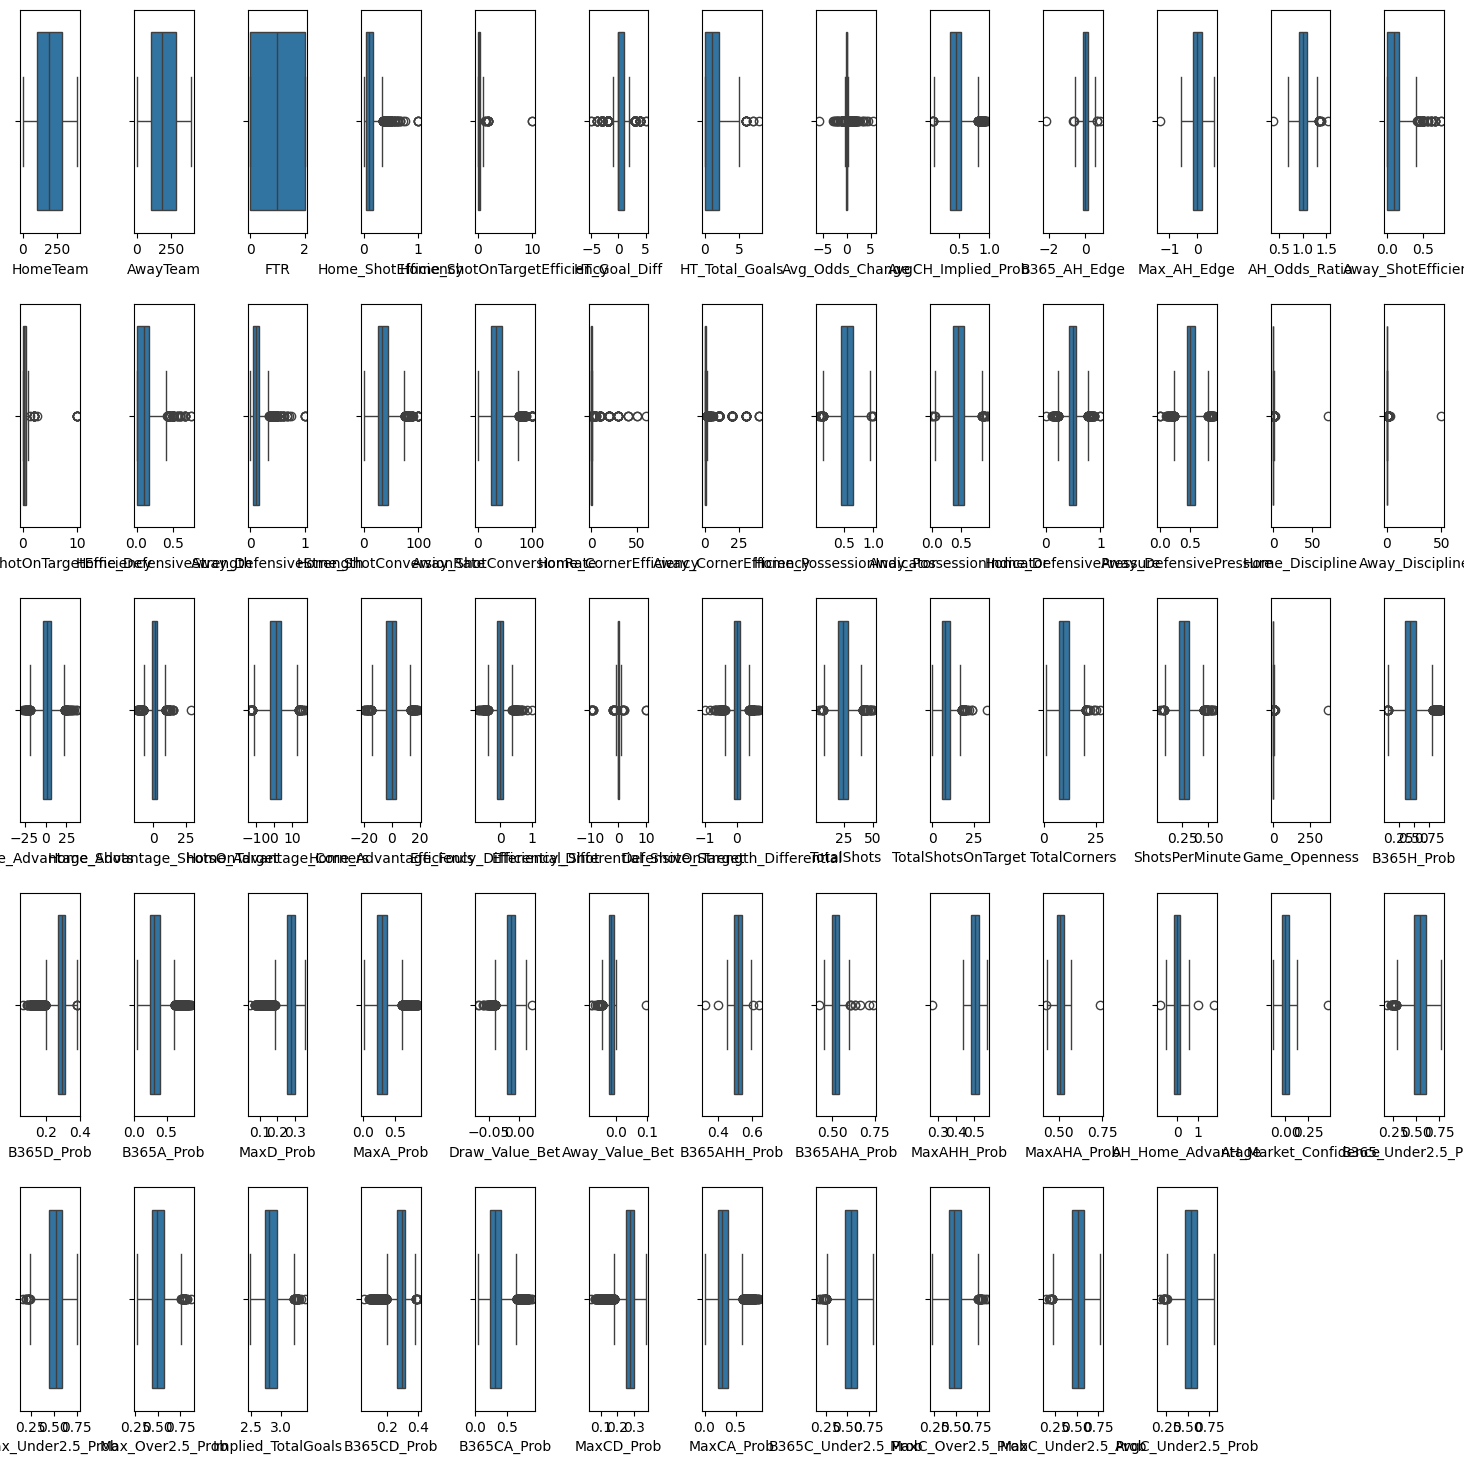

In [ ]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 13, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Treating Outliers

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

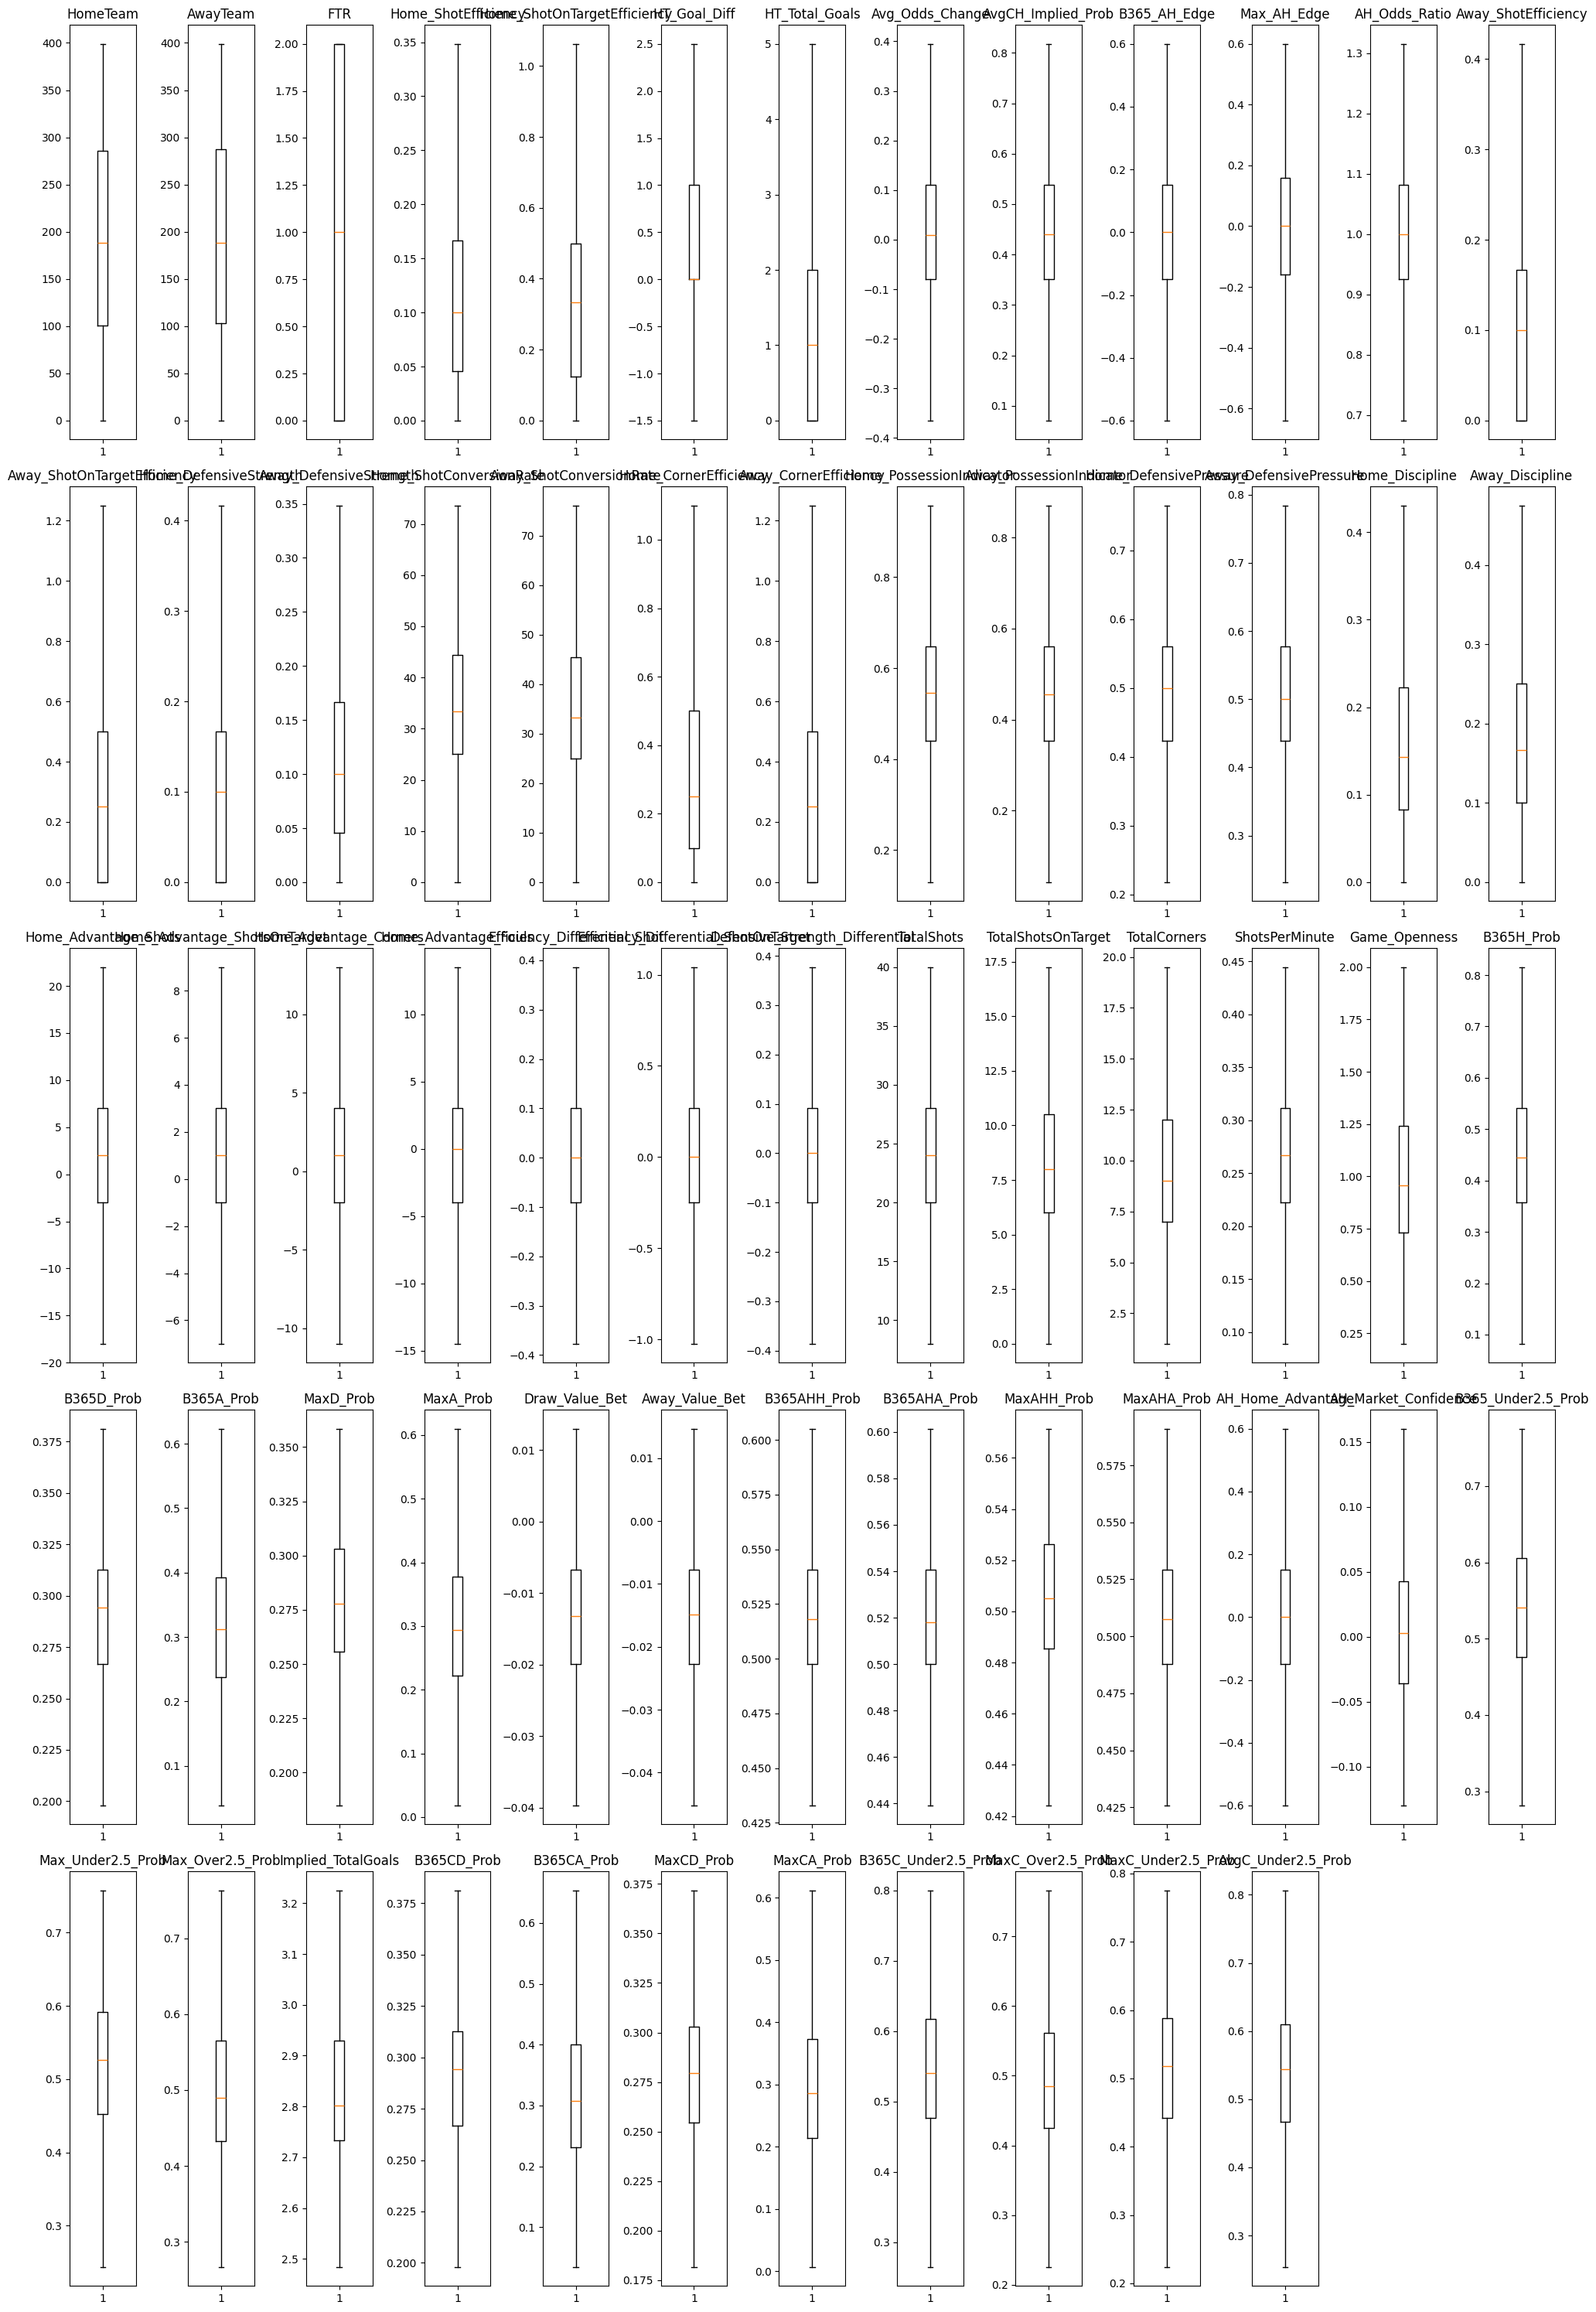

In [ ]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 13, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# Define the mapping dictionary to encode FTR and HTR columns
#mapping = {'H': 1, 'D': 2, 'A': 3}
#df[['FTR']] = df[['FTR']].replace(mapping)
#df[['HTR']] = df[['HTR']].replace(mapping)

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done using the `stratify` parameter in the train_test_split function.

In [ ]:
X = df.drop(['FTR'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['FTR']

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

HomeTeam  AwayTeam  Home_ShotEfficiency  Home_ShotOnTargetEfficiency  \
28237        27       124             0.000000                     0.000000   
28238       213       142             0.125000                     0.500000   
28239       250       207             0.148148                     0.363636   
28240       393       182             0.062500                     0.166667   
28241       256        30             0.117647                     0.333333   

       HT_Goal_Diff  HT_Total_Goals  Avg_Odds_Change  AvgCH_Implied_Prob  \
28237           0.0             0.0             0.00            0.813008   
28238          -1.0             1.0            -0.03            0.775194   
28239           1.0             1.0            -0.02            0.775194   
28240          -1.0             1.0             0.08            0.505051   
28241           0.0             0.0             0.07            0.369004   

       B365_AH_Edge  Max_AH_Edge  ...  Max_Over2.5_Prob  Implied_TotalGoals  \
28237         -0.17        -0.08  ...          0.584795            2.955875   
28238         -0.11        -0.10  ...          0.657895            3.063088   
28239         -0.03        -0.05  ...          0.680272            3.108225   
28240         -0.03        -0.06  ...          0.568182            2.941017   
28241          0.05         0.00  ...          0.520833            2.822917   

       B365CD_Prob  B365CA_Prob  MaxCD_Prob  MaxCA_Prob  B365C_Under2.5_Prob  \
28237     0.197917     0.076923    0.181587    0.066667             0.434783   
28238     0.197917     0.111111    0.181587    0.086957             0.312500   
28239     0.197917     0.111111    0.181587    0.090909             0.312500   
28240     0.270270     0.266667    0.265252    0.254453             0.500000   
28241     0.312500     0.363636    0.303030    0.350877             0.555556   

       MaxC_Over2.5_Prob  MaxC_Under2.5_Prob  AvgC_Under2.5_Prob  
28237           0.591716            0.413223            0.431034  
28238           0.709220            0.307692            0.326797  
28239           0.714286            0.312500            0.322581  
28240           0.534759            0.471698            0.490196  
28241           0.465116            0.540541            0.568182  

[5 rows x 62 columns]

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(5346, 62) (1337, 62)


In [ ]:
y.value_counts(1)

FTR
2    0.430944
0    0.299865
1    0.269190
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(1)

FTR
2    0.430815
0    0.299925
1    0.269260
Name: proportion, dtype: float64

In [ ]:
#FEATURE SELECTION USING TRAINING DATA
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train, y_train, random_state=1)
feature_importance = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

print("Top 40 features by Mutual Information:")
print(feature_importance.head(40))

Top 40 features by Mutual Information:
Efficiency_Differential_Shot            0.598596
Defensive_Strength_Differential         0.597656
Efficiency_Differential_ShotOnTarget    0.499905
Home_ShotEfficiency                     0.254270
Away_DefensiveStrength                  0.250679
Home_DefensiveStrength                  0.245194
Home_ShotOnTargetEfficiency             0.238714
Home_CornerEfficiency                   0.238269
Away_ShotEfficiency                     0.236301
Away_CornerEfficiency                   0.225449
Away_ShotOnTargetEfficiency             0.218884
HT_Goal_Diff                            0.198273
Home_Advantage_ShotsOnTarget            0.131243
Home_ShotConversionRate                 0.068634
B365CA_Prob                             0.066403
AvgCH_Implied_Prob                      0.064798
Away_ShotConversionRate                 0.063413
MaxA_Prob                               0.060656
B365A_Prob                              0.048415
B365H_Prob                    

In [ ]:
# Select top features
top_features = feature_importance.head(13).index
X_TRAIN = X_train[top_features]
X_TEST = X_test[top_features]

print(f"Reduced from {X_train.shape[1]} to {X_TRAIN.shape[1]} features")

Reduced from 62 to 13 features


### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the there is availability of space but in reality, there is no space.

2. Model predicts that there is no availability of space but in reality, there is space.

### Which case is more important?
* Both the cases are important as:

* If it predicts there is space but in reality there is no space the county government can allocate resources for the development of health facilities where there is no space thus leading to waste of resources.

* If it predicts there is no space but in reality there is space, it might cause the desrving areas where the county government is supposed to allocate resources for health facilities construction to miss the allocation.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score, the higher the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, predictors, target):
    # Make predictions
    pred = model.predict(predictors)

    # Compute metrics
    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred, average='weighted')  # Adjusted for multiclass
    precision = precision_score(target, pred, average='weighted')  # Adjusted for multiclass
    f1 = f1_score(target, pred, average='weighted')  # Adjusted for multiclass

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    # Make predictions
    y_pred = model.predict(predictors)

    # Get confusion matrix
    cm = confusion_matrix(target, y_pred)

    # Dynamically reshape the labels based on the confusion matrix size
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape)  # reshape based on the actual size of cm

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
#dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', class_weight='balanced', random_state=1)


In [ ]:
dtree.fit(X_TRAIN, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

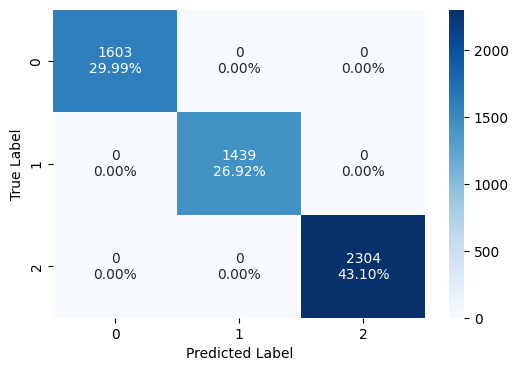

In [ ]:
confusion_matrix_sklearn(dtree, X_TRAIN, y_train)

In [ ]:
dtree_model_train_perf = model_performance_classification_sklearn(dtree, X_TRAIN, y_train)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


**Confusion Matrix -**

* Space was available and the model predicted it correctly that there is space :  True Positive (observed=1,predicted=1)

* There was no space and the model predicted there is space : False Positive (observed=0,predicted=1)

* There was no space and the model predicted that there was no space : True Negative (observed=0,predicted=0)

* Space was available  and the model predicted it incorrectly that there is no space : False Negative (observed=1,predicted=0)

#### Checking model performance on testing set

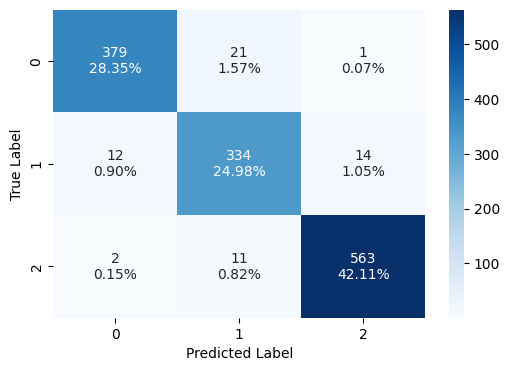

In [ ]:
confusion_matrix_sklearn(dtree, X_TEST, y_test)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_TEST, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.954375  0.954375   0.954593  0.954437


- There is no overfitting on the training data as both acuuracy, recall, precision and F1 for both training and testing data are equal. Therefore decision tree is working well for both training and testing data.

**Before pruning the tree let's check the important features.**

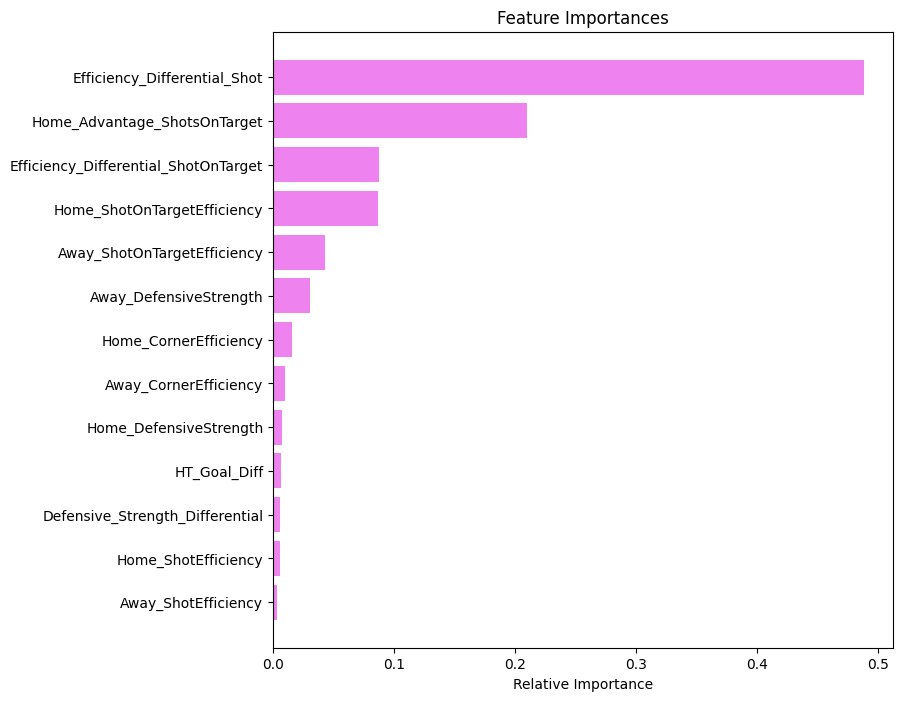

In [ ]:

feature_names = list(X_TRAIN.columns)
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Pruning the tree

**Pre-Pruning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_TRAIN, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_TRAIN, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

#### Checking performance on training set

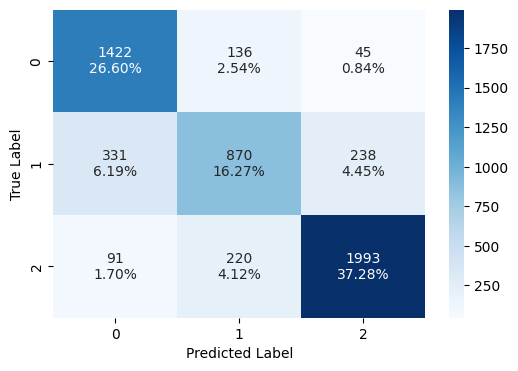

In [ ]:
 #Training Performance
confusion_matrix_sklearn(estimator, X_TRAIN, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_TRAIN, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.801534  0.801534    0.79963  0.798223

#### Checking performance on test set

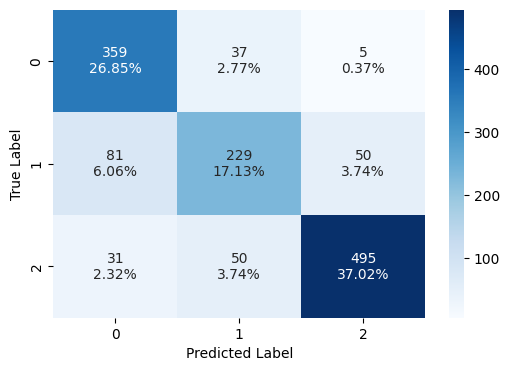

In [ ]:
# Testing Performance
confusion_matrix_sklearn(estimator, X_TEST, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_TEST, y_test
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.801534  0.801534    0.79963  0.798223

- After pruning the accuracy, recall and F1 reduced for the training data but increased for testing data

### Visualizing the Decision Tree

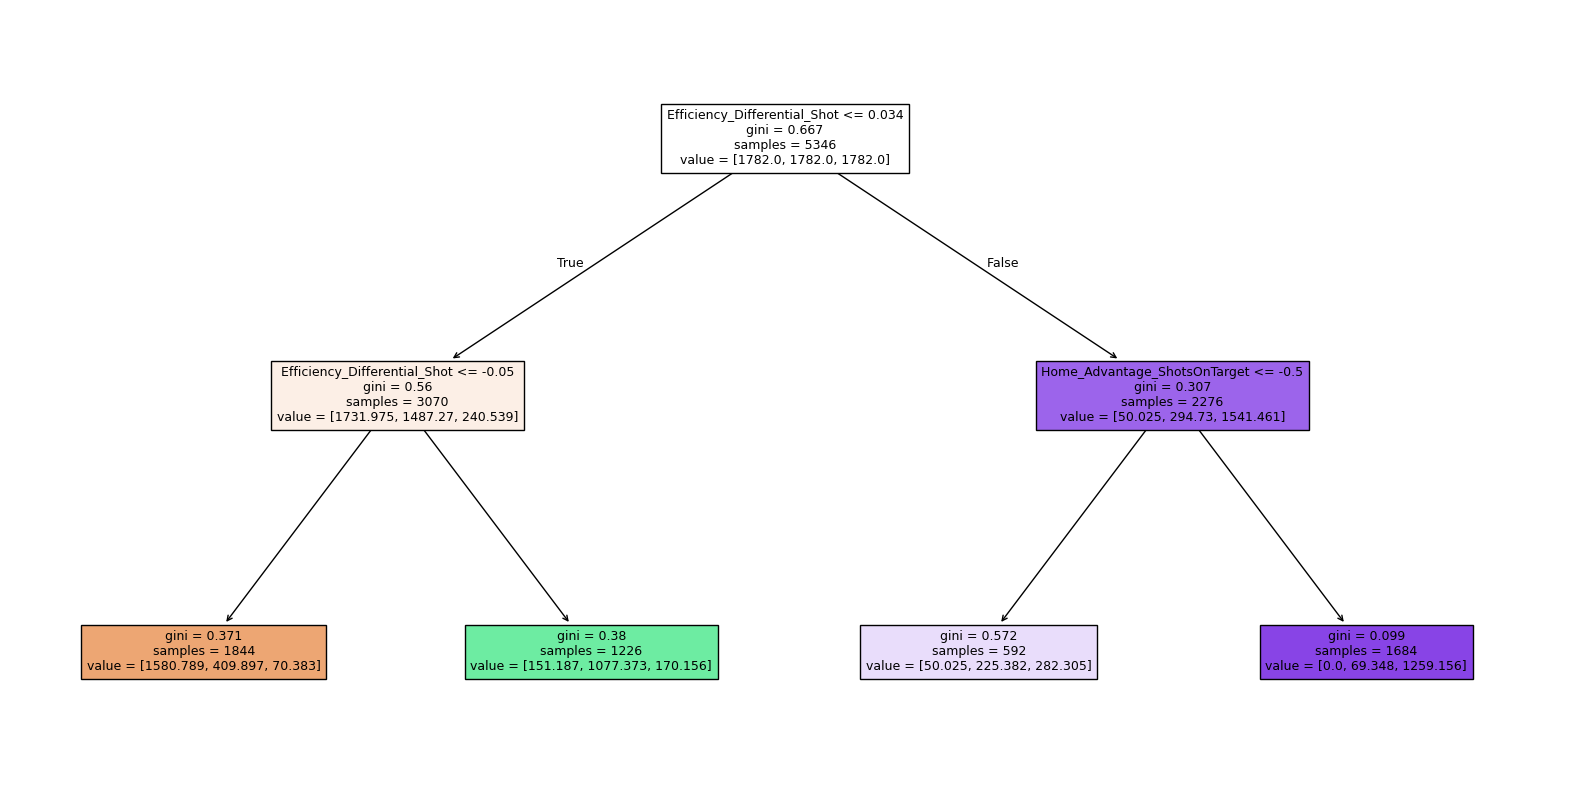

In [ ]:
feature_names = list(X_TRAIN.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- The above is the decision tree that will help us to come with a decision if there is space or not. The root node in this case which will guide in decision making is the paremeter no capacity. If the sample satisfies the condition then it goes to the left i f it exists otherwise it goes to the right.  

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Efficiency_Differential_Shot <= 0.03
|   |--- Efficiency_Differential_Shot <= -0.05
|   |   |--- weights: [1580.79, 409.90, 70.38] class: 0
|   |--- Efficiency_Differential_Shot >  -0.05
|   |   |--- weights: [151.19, 1077.37, 170.16] class: 1
|--- Efficiency_Differential_Shot >  0.03
|   |--- Home_Advantage_ShotsOnTarget <= -0.50
|   |   |--- weights: [50.02, 225.38, 282.30] class: 2
|   |--- Home_Advantage_ShotsOnTarget >  -0.50
|   |   |--- weights: [0.00, 69.35, 1259.16] class: 2



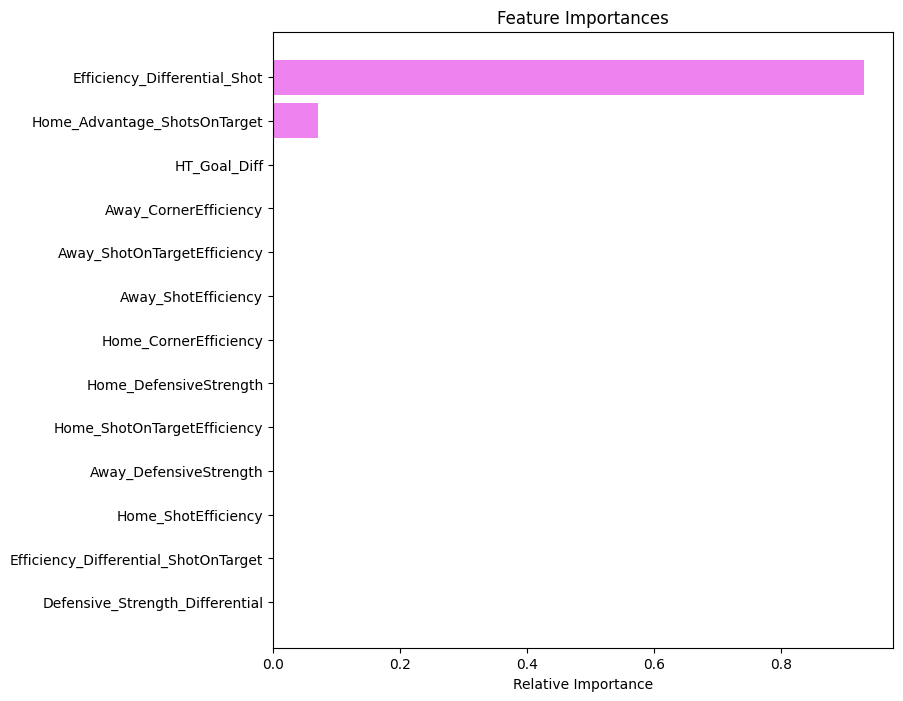

In [ ]:
# importance of features in the tree building


importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


- Important features for the prediction after the tree is pruned are:no capacity, Murang'a south and good status.

### Cost Complexity Pruning
**Let's try pruning the tree and see if the performance improves.**

In [ ]:
d_tree = DecisionTreeClassifier(random_state=0)
path = d_tree.cost_complexity_pruning_path(X_TRAIN, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0      0.000000    0.000000
1      0.000160    0.000321
2      0.000166    0.000653
3      0.000168    0.000990
4      0.000170    0.001330
..          ...         ...
158    0.018366    0.283141
159    0.021508    0.304649
160    0.023884    0.328534
161    0.097799    0.426333
162    0.225562    0.651895

[163 rows x 2 columns]

In [ ]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_TRAIN, y_train)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.22556233599403208


In [ ]:
recall_train = []
for clf in clfs_list:
    pred_train = clf.predict(X_TRAIN)
    values_train = metrics.recall_score(y_train, pred_train, average='macro')  # or 'micro' or 'weighted'
    recall_train.append(values_train)


In [ ]:
#Fitting model for each value of alpha and saving the test recall in a list
recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_TEST)
    values_test=metrics.recall_score(y_test,pred_test,average='macro')
    recall_test.append(values_test)

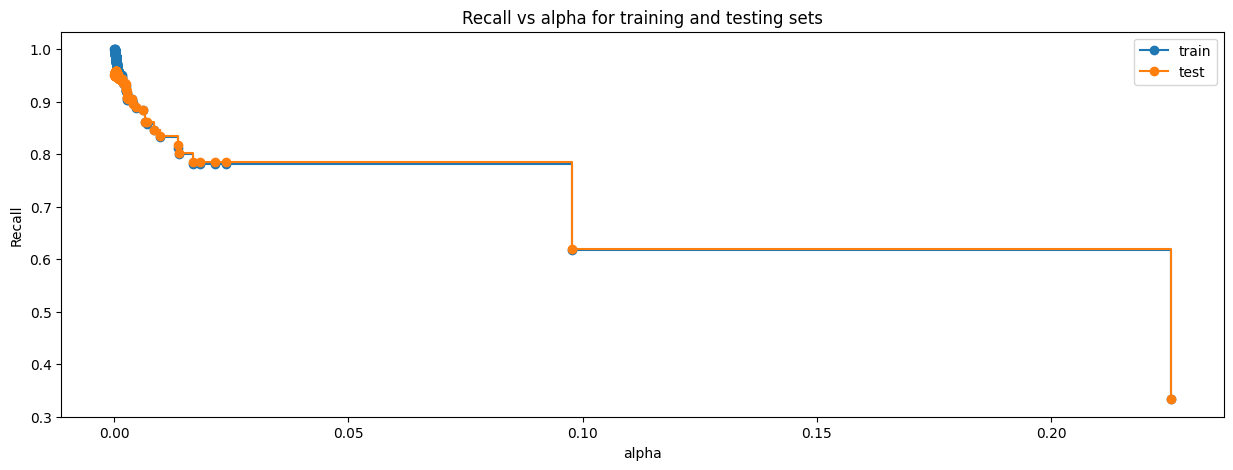

In [ ]:
#Plotting the graph for Recall VS alpha
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

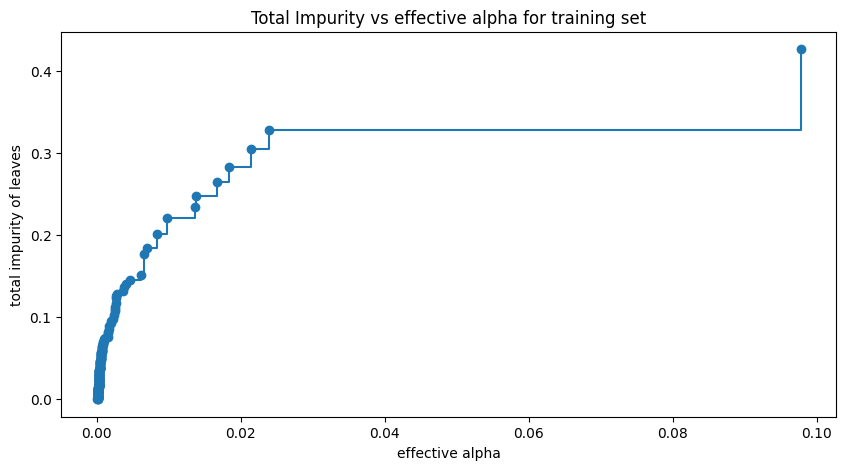

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

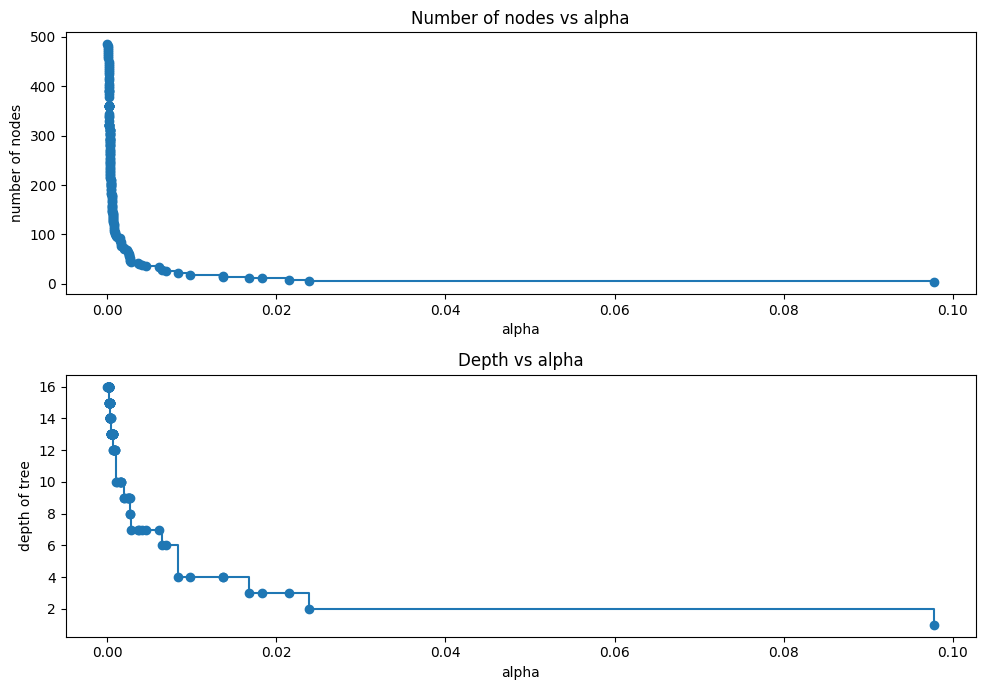

In [ ]:
clfs = clfs_list[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Training performance:
    Accuracy    Recall  Precision       F1
0  0.986532  0.986532    0.98663  0.98656
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.961107  0.961107   0.961815  0.961332


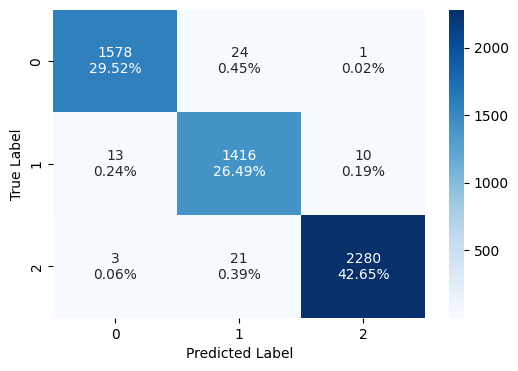

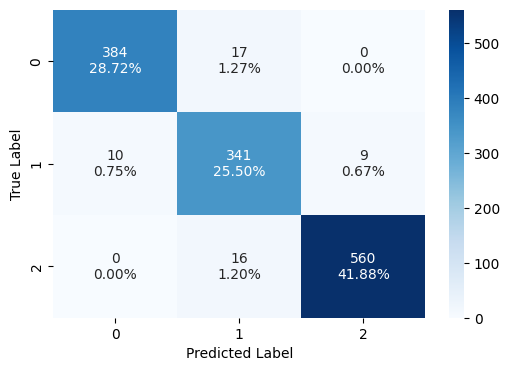

In [ ]:
# Creating the model where we get highest test recall
index_best_pruned_model = np.argmax(recall_test)

pruned_dtree_model = clfs_list[index_best_pruned_model]

# Calculating different metrics
pruned_dtree_model_train_perf = model_performance_classification_sklearn(
    pruned_dtree_model, X_TRAIN, y_train
)
print("Training performance:\n", pruned_dtree_model_train_perf)
pruned_dtree_model_test_perf = model_performance_classification_sklearn(
    pruned_dtree_model, X_TEST, y_test
)
print("Testing performance:\n", pruned_dtree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(pruned_dtree_model, X_TRAIN, y_train)
confusion_matrix_sklearn(pruned_dtree_model, X_TEST, y_test)

- After complexity pruning accuracy and F1 remained the same while recall increased and precision decreased for the training data.

- Recall and F1 increased while accuracy and precision decreased for the training data.

### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_TRAIN)
    values_train = f1_score(y_train, pred_train,average='macro')
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_TEST)
    values_test = f1_score(y_test, pred_test,average='macro')
    f1_test.append(values_test)

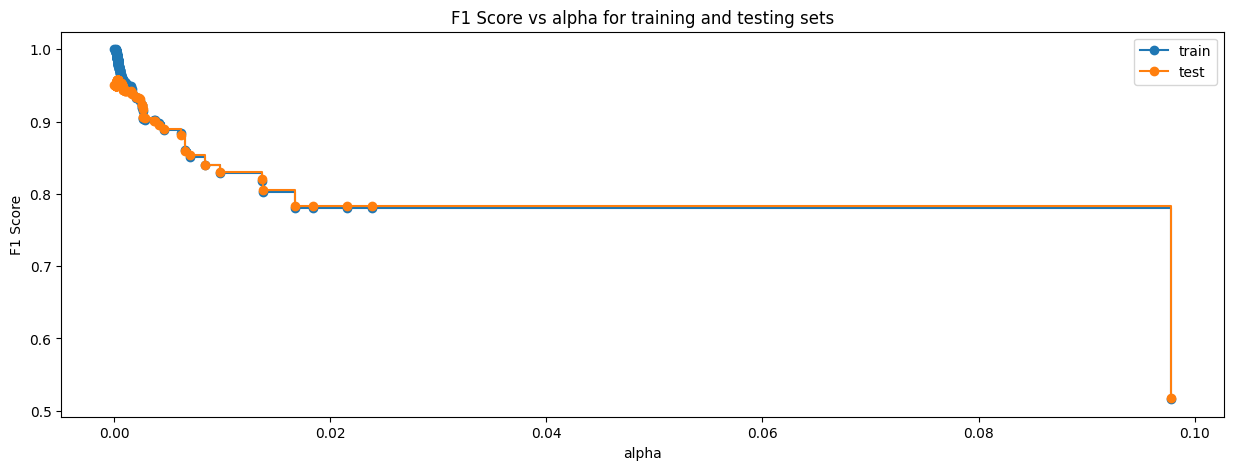

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0003221515567194581),
                       random_state=1)


#### Checking performance on training set

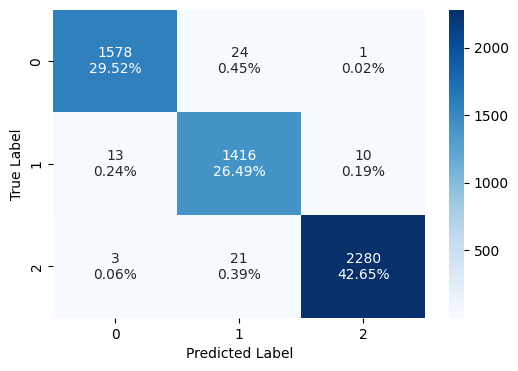

In [ ]:
confusion_matrix_sklearn(best_model, X_TRAIN, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_TRAIN, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision       F1
0  0.986532  0.986532    0.98663  0.98656

#### Checking performance on test set

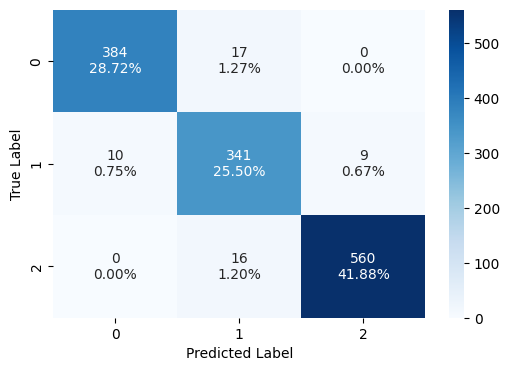

In [ ]:
confusion_matrix_sklearn(best_model, X_TEST, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_TEST, y_test
)
decision_tree_post_perf_test

Accuracy    Recall  Precision        F1
0  0.961107  0.961107   0.961815  0.961332

- No overfitting for F1 and alpha in our training and test sets

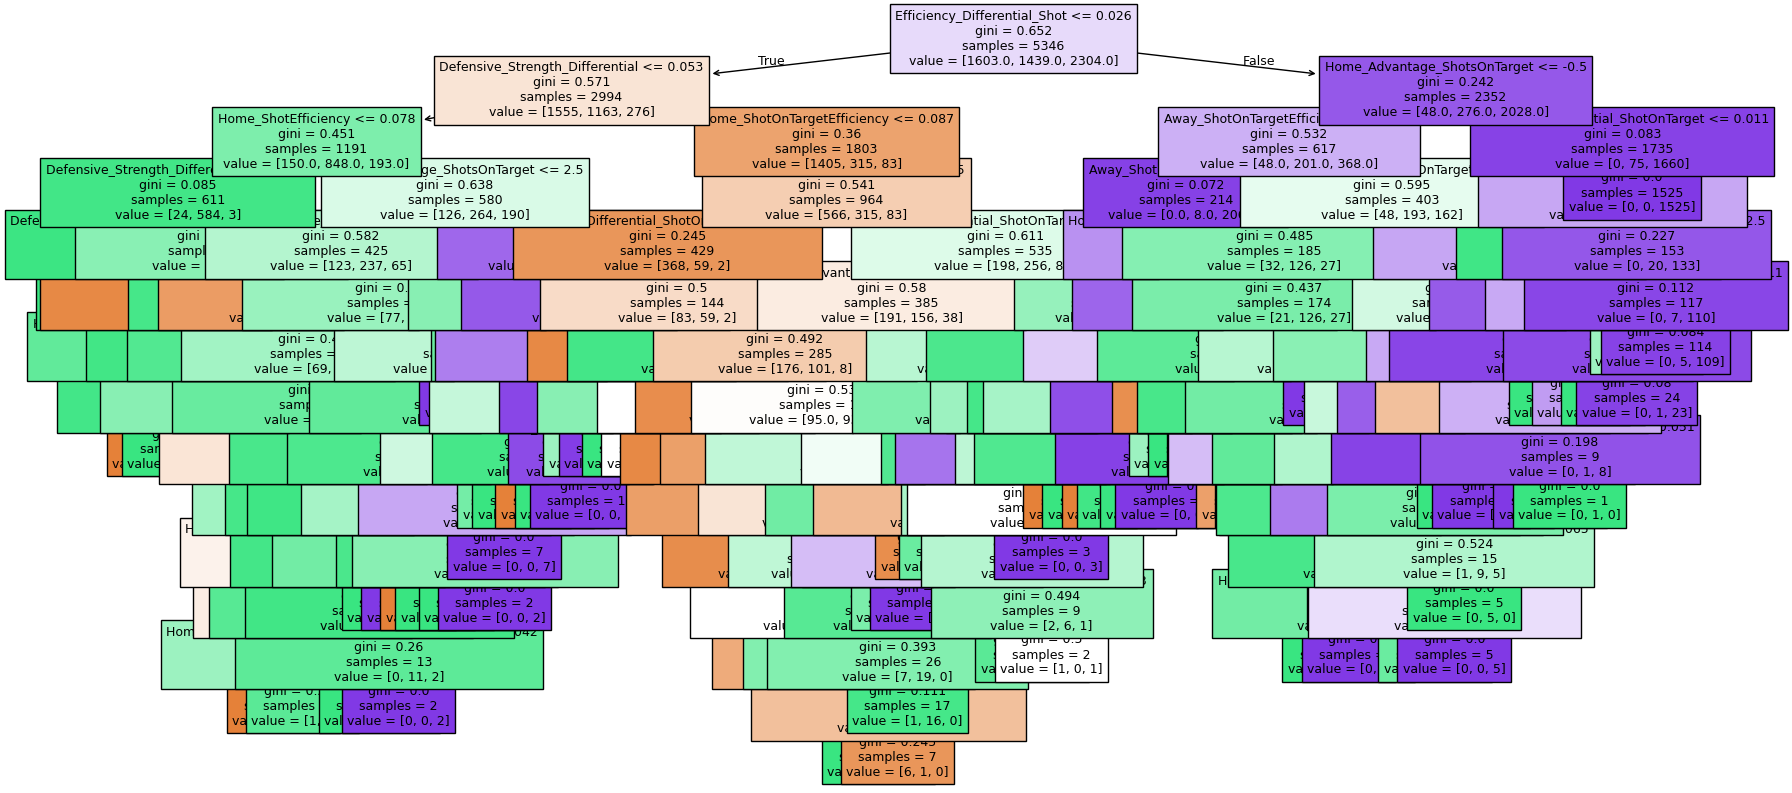

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- Our tree after complexity training.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Efficiency_Differential_Shot <= 0.03
|   |--- Defensive_Strength_Differential <= 0.05
|   |   |--- Home_ShotEfficiency <= 0.08
|   |   |   |--- Defensive_Strength_Differential <= 0.04
|   |   |   |   |--- Defensive_Strength_Differential <= -0.02
|   |   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |   |   |   |--- Defensive_Strength_Differential >  -0.02
|   |   |   |   |   |--- Home_DefensiveStrength <= 0.09
|   |   |   |   |   |   |--- weights: [1.00, 517.00, 1.00] class: 1
|   |   |   |   |   |--- Home_DefensiveStrength >  0.09
|   |   |   |   |   |   |--- Home_Advantage_ShotsOnTarget <= -3.00
|   |   |   |   |   |   |   |--- weights: [3.00, 1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Home_Advantage_ShotsOnTarget >  -3.00
|   |   |   |   |   |   |   |--- Away_DefensiveStrength <= 0.06
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Away_DefensiveStrength >  0.06
|   |   |   |   |   |   |   |   |--- we

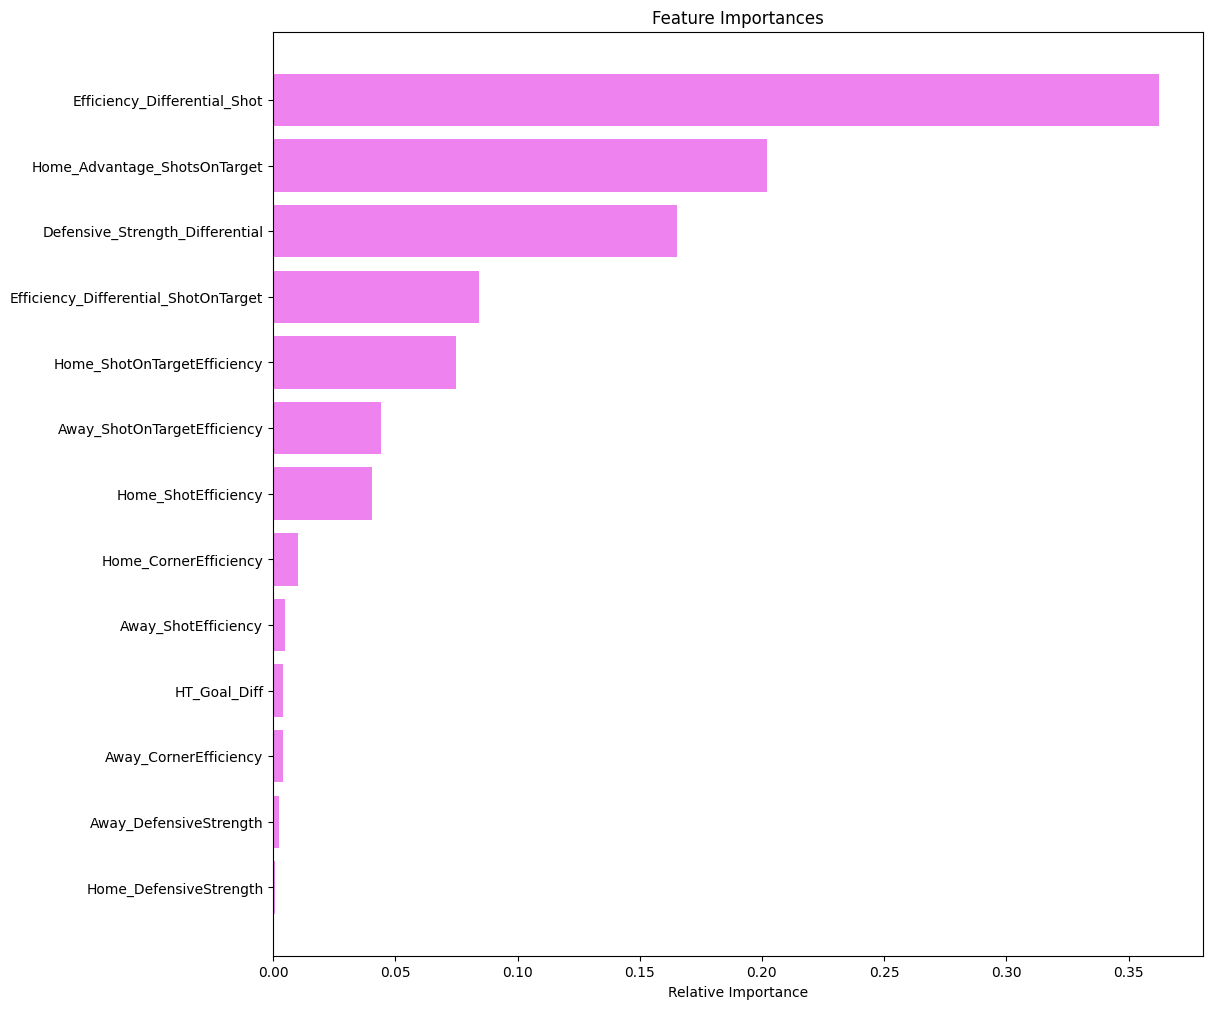

In [ ]:

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


- After complex pruning has got only two important features that would be used for prediction.This features are:good status and no capacity.

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        decision_tree_tune_perf_train.T,
        pruned_dtree_model_train_perf.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Pre-pruned",
    "Decision Tree Pruned",
    "Decision Tree Post-pruned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Decision Tree Pre-pruned  Decision Tree Pruned  \
Accuracy             1.0                  0.801534              0.986532   
Recall               1.0                  0.801534              0.986532   
Precision            1.0                  0.799630              0.986630   
F1                   1.0                  0.798223              0.986560   

           Decision Tree Post-pruned  
Accuracy                    0.986532  
Recall                      0.986532  
Precision                   0.986630  
F1                          0.986560

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        decision_tree_tune_perf_test.T,
        pruned_dtree_model_test_perf.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Pre-pruned",
    "Decision Tree Pruned",
    "Decision Tree Post-pruned",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  Decision Tree Pre-pruned  Decision Tree Pruned  \
Accuracy        0.954375                  0.810022              0.961107   
Recall          0.954375                  0.810022              0.961107   
Precision       0.954593                  0.811467              0.961815   
F1              0.954437                  0.808165              0.961332   

           Decision Tree Post-pruned  
Accuracy                    0.961107  
Recall                      0.961107  
Precision                   0.961815  
F1                          0.961332

### Important features of the final model

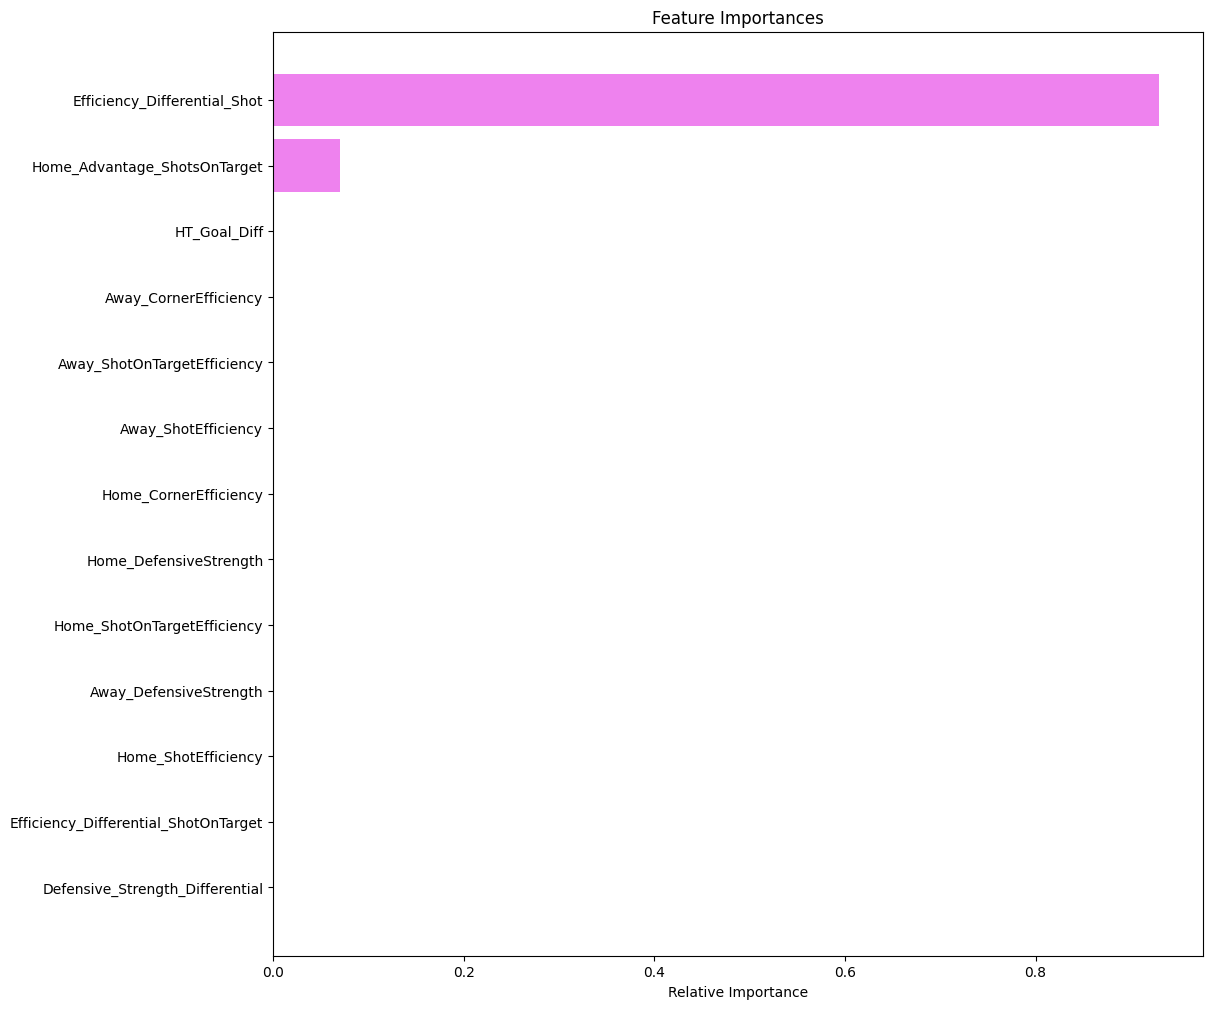

In [ ]:

feature_names = X_TRAIN.columns
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


## Actionable Insights and Recommendations
- We can either select gradient boost classifier, tuned gradient boost classifier, Tuned random forest and bagging classifier.
- Gradient boost classifier will therefore be chosen for deployment.

## Saving Pre-Pruned Decision Tree Model For Deployment

In [ ]:
import joblib
# Save the model to a .pkl file
joblib.dump(estimator, 'model.pkl')

['model.pkl']

In [ ]:
#pip freeze

In [ ]:
#pip show pandas

In [ ]:
#!python --version


In [ ]:
 # Check for duplicate columns
print("Duplicate columns:", X_TRAIN.columns[X_TRAIN.columns.duplicated()])

Duplicate columns: Index([], dtype='object')


In [ ]:
# Look at your actual feature values
print("First few rows of training data:")
print(X_TRAIN.head())
print("Target values:")
print(y_train.head())

First few rows of training data:
       Home_GoalDifference  Away_GoalDifference  Efficiency_Differential_Shot  \
37923                   -3                    3                     -0.230769   
48172                    4                   -4                      0.187500   
45933                    0                    0                      0.019481   
35468                    4                   -4                      0.333333   
36098                    0                    0                      0.000000   

       Defensive_Strength_Differential  Efficiency_Differential_ShotOnTarget  \
37923                         0.230769                             -0.750000   
48172                        -0.187500                             -0.285714   
45933                        -0.019481                              0.083333   
35468                        -0.333333                              1.000000   
36098                         0.000000                              0.000000   


In [ ]:
# Check correlation between features and target
correlations = X_TRAIN.corrwith(y_train)
print("High correlations with target:")
print(correlations[abs(correlations) > 0.9])

High correlations with target:
Series([], dtype: float64)


In [ ]:
print(f"Training set shape: {X_TRAIN.shape}")
print(f"Test set shape: {X_TEST.shape}")
print(f"Training target distribution: {pd.Series(y_train).value_counts()}")
print(f"Test target distribution: {pd.Series(y_test).value_counts()}")

Training set shape: (5346, 14)
Test set shape: (1337, 14)
Training target distribution: FTR
2    2304
0    1603
1    1439
Name: count, dtype: int64
Test target distribution: FTR
2    576
0    401
1    360
Name: count, dtype: int64
